# Capstone Project Part 3: EDA

## Gender Feature Imputation Part 2:

As shown in the second part of my project, I used gender-guesser library to create a gender column using the presenters' first names. Gender-guesser library returned 6 different results as: 'male', 'female', 'mostly male', 'mostly female', 'unknown' and 'andy'. I used the suggestion from the library for mostly male and mostly female categories and added them as male and female. Unknown indicates an equal probability of the given name being male or female, whereas andy is returned for the names that wasn't found in the database. At the end of this process, the gender guesser wasn't able to classify 296 variables 34 of which was not found in the database. Therefore, I used genderize.io api in the hope of creating genders for these uncategorized rows.

In [303]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from pprint import pprint
import matplotlib.pyplot as plt
from pandas_summary import DataFrameSummary
import seaborn as sns
import numpy as np
from collections import Counter
import operator


plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib.pyplot as pltfrom 

<b>Note:</b> I have commented out the older version of the dataset as a new version has been saved further down in the document.

In [45]:
# df = pd.read_csv('part_2.csv')
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

In [46]:
df.shape

(2403, 162)

In [47]:
df.head()

comments                                        description  duration  \
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1       265  With the same humor and humanity he exuded in ...       977   
2       124  New York Times columnist David Pogue takes aim...      1286   
3       200  In an emotionally charged talk, MacArthur-winn...      1116   
4       593  You've never seen data presented like this. Wi...      1190   

     event   film_date  languages   main_speaker  \
0  TED2006  1140825600         60   Ken Robinson   
1  TED2006  1140825600         43        Al Gore   
2  TED2006  1140739200         26    David Pogue   
3  TED2006  1140912000         35  Majora Carter   
4  TED2006  1140566400         48   Hans Rosling   

                                            name  published_date  \
0      Ken Robinson: Do schools kill creativity?      1151367060   
1           Al Gore: Averting the climate crisis      1151367060   
2                  David Pogue: Simplicity sells      1151367060   
3             Majora Carter: Greening the ghetto      1151367060   
4  Hans Rosling: The best stats you've ever seen      1151440680   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
2  [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...   
3  [{'id': 3, 'name': 'Courageous', 'count': 760}...   
4  [{'id': 9, 'name': 'Ingenious', 'count': 3202}...   

                     speaker_occupation  \
0                       Author/educator   
1                      Climate advocate   
2                  Technology columnist   
3    Activist for environmental justice   
4  Global health expert; data visionary   

                                                tags  \
0  ['children', 'creativity', 'culture', 'dance',...   
1  ['alternative energy', 'cars', 'climate change...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['Africa', 'Asia', 'Google', 'demo', 'economic...   

                             title  \
0      Do schools kill creativity?   
1      Averting the climate crisis   
2                 Simplicity sells   
3              Greening the ghetto   
4  The best stats you've ever seen   

                                                 url     views  music  \
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110      0   
1  https://www.ted.com/talks/al_gore_on_averting_...   3200520      0   
2  https://www.ted.com/talks/david_pogue_says_sim...   1636292      0   
3  https://www.ted.com/talks/majora_carter_s_tale...   1697550      0   
4  https://www.ted.com/talks/hans_rosling_shows_t...  12005869      0   

   conversation                                         transcript  \
0             0  Good morning. How are you?()It's been great, h...   
1             0  Thank you so much, Chris. And it's truly a gre...   
2             0  ()Hello voice mail, my old friend.()I've calle...   
3             0  If you're here today  and I'm very happy th...   
4             0  About 10 years ago, I took on the task to teac...   

   persuasive  inspiring  unconvincing  applause  laughter  norm_persuasive  \
0       10704      24924           300         4        39       226.649482   
1         268        413           258         3        21        83.736393   
2         230        230           104        12        38       140.561709   
3         460       1070            36         7        10       270.978764   
4        2542       2893            67         3        10       211.729780   

   norm_inspiring  norm_unconvincing    WC  Analytic  Clout  Authentic   Tone  \
0      527.747728           6.352284  3119     38.67  90.77      30.78  56.66   
1      129.041531          80.611901   723     76.53  75.55      70.35  51.66   
2      140.561709          63.558338  3253     37.41  73.98      49.15  55.32   
3  

In [5]:
#below function connects to genderize.io and searches for the genders of the names 
# that weren't categorized by the gender guesser
def name_to_gender():
    URL = 'https://api.genderize.io/?name={}'
    for row in df[df['gender'].isin(['andy', 'unknown'])].fname:
        request_result = requests.get(URL.format(row)).json()
        if request_result.get('gender') is None:
            df.loc[df.fname==row, 'gender'] = 'unknown' 
        else:
            df.loc[df.fname==row, 'gender'] = request_result.get('gender')

In [305]:
# Trial with my name
URL = 'https://api.genderize.io/?name={}'
request_result = requests.get(URL.format('Ozge')).json()
request_result

{'count': 19, 'gender': 'female', 'name': 'Ozge', 'probability': 1}

In [7]:
name_to_gender()

In [8]:
df.gender.value_counts()

male       1525
female      754
unknown     127
Name: gender, dtype: int64

## Gender Feature Imputation Part 3:

Genderize.io API was able reduce the unknown gender category to 127. For this 127 rows, I will be manually adding the genders with the dictionary that I created by looking up the first names of the speakers online.

In [9]:
df[df.gender == 'unknown'].fname.head()

3      Majora
46      Rives
61       E.O.
88      Rives
112     Rives
Name: fname, dtype: object

In [10]:
name_dict = {'Majora': 'female',
             'Rives': 'male',
             'E.O.': 'male',
             'Euvin': 'male',
             'Zeresenay': 'female',
             'Gever': 'male',
             'Brewster' : 'male',
             'Mihaly': 'male',
             'Dayananda': 'male',
             'Jamais': 'male',
             'JosÌ©': 'male',
             'P.W.': 'male',
             'Gever':'male',
             'Eames': 'male',
             'Olafur': 'male',
             'Chimamanda': 'female',
             'Fields': 'female',
             'Devdutt': 'male',
             'Thulasiraj': 'male',
             'Shaffi':'male',
             'Vilayanur': 'male',
             'Kartick': 'male',
             'Lalitesh': 'male',
             'Sendhil': 'male',
             'Shukla': 'female',
             'Alwar': 'male',
             'Mechai': 'male',
             'Auret': 'male',
             'BrenÌ©': 'female',
             'Suheir': 'female',
             'Wadah': 'male',
             'Eythor': 'male',
             'Chade-Meng':'male',
             'Maajid': 'male',
             'Yasheng': 'male',
             'Jarreth':'male',
             'Bunker': 'male',
             'Guy-Philippe': 'male',
             'BÌ©atrice': 'female',
             'PÌ©ter': 'male',
             'Srdja': 'male',
             'Sonaar': 'male',
             'Sheikha': 'female',
             'Leymah': 'female',
             'Beeban': 'female',
             'Lemn': 'male',
             'Markham': 'male',
             'Hadyn': 'male',
             'Boghuma': 'female',
             'Wingham': 'male',
             'Zahra': 'female',
             'Young-ha': 'male',
             'Kakenya': 'female',
             'Hyeonseo':'female',
            'SebastiÌ£o':'male',
            'ShaoLan':'female',
            'Beardyman':'male',
            'Jinsop': 'male',
            'Chrystia':'female',
            'Onora': 'female',
            'Trita':'male',
            'GrÌ©goire':'male',
            'Dambisa':'female',
            'DiÌ©bÌ©do':'male',
            'Siddharthan': 'male',
            'Mellody':'female',
            'Kitra':'female',
            'Talithia': 'female',
            'Uldus':'female',
            'Vern':'female',
            'Mundano':'female',
            'Sangu': 'male',
            'Fei-Fei':'female',
            'Theaster': 'male',
            'Barat': 'male',
            'Meklit':'female',
            'PatrÌ_cia':'female',
            'AntÌ_nio':'male',
            'Aomawa':'female',
            'Achenyo':'female',
            'AndrÌ©s':'male',
            'Dambisa':'female',
            'Mileha':'female',
            'AngÌ©lica': 'female',
            'R.':'male',
            'CÌ©dric':'male',
            'Sajay':'male',
            'Keolu':'male',
            'Prosanta':'male',
            'Kio':'female',
            'Chinaka':'female',
            'Sisonke':'female',
            'Deeyah':'female',
            'Nagin':'female',
            'Emtithal':'female',
            'SebastiÌÁn':'male',
            'Chimamanda':'female',
            'Sangu':'male',
            'Sitawa':'female',
            'Anab': 'female',
            'SinÌ©ad': 'female',
            'FranÌ¤oise': 'female',
            'Manoush':'female',
            'Wanuri':'female',
            'Tomaís':'male',
            'OluTimehin':'female',
            'Sethembile':'female',
            'Oluífeíí£mi':'male',
            'Luvvie':'female',
            'G.T.':'male',
            'InÌ©s': 'female',
            'Nnedi':'female',
            'RocÌ_o':'female',
            'Prumsodun':'male'}

In [11]:
# below for loop 
for i in name_dict.keys():
    df.loc[df.fname==i, 'gender'] = name_dict.get(i)

In [12]:
df.gender.value_counts()

male       1593
female      810
unknown       3
Name: gender, dtype: int64

Remaining 'unknown' category is for music bands, thus I'll be dropping these rows not to use in my analyses.

In [13]:
df = df[df.gender != 'unknown']

In [14]:
df.shape

(2403, 189)

In [ ]:
# saving the dataset with genders in case I revert the columns back to the beginning by re-running the above cells.
# api allows only 1000 requests per day, so I don't want to lose the rows and wait for 24 hours to get them back :) 
none df.to_csv('part_3_with_genders.csv')

In [126]:
df = pd.read_csv('part_3_with_genders.csv')

At the end of this process, the final number of rows decreased to 2403 which is not bad given that I was able to create gender rows for almost all of the columns. However, one of the limitations of this approach to creating the gender feature is the name-gender database of the libraries used as some may be inconsistent with real genders of the speakers. Thus, the results of my analyses will be limited to the results generated by these libraries.

## Columns that wouldn't be used in the analyses

Some columns have the linguistic counts for the first half and the quarters of the videos that was used for the creators of the dataset, but will not be used in my analyses. Thus, I'll drop them before I continue with the further feature generation and EDA section.

In [127]:
df = df[['comments', 'description', 'duration',
       'event', 'film_date', 'languages', 'main_speaker', 'name','published_date','ratings','speaker_occupation','tags',
 'title','url','views','music','conversation','transcript','persuasive','inspiring','unconvincing','applause','laughter',
 'norm_persuasive','norm_inspiring','norm_unconvincing', 'WC','Analytic','Clout','Authentic','Tone','WPS','Sixltr','Dic',
 'function','pronoun','ppron','i','we','you','shehe','they','ipron','article','prep','auxverb','adverb','conj','negate',
 'verb','adj','compare','interrog','number','quant','affect','posemo','negemo','anx','anger','sad','social','family',
 'friend','female','male','cogproc','insight','cause','discrep','tentat','certain','differ','percept','see','hear',
 'feel','bio','body','health','sexual','ingest','drives','affiliation','achieve','power','reward','risk','focuspast',
 'focuspresent','focusfuture','relativ','motion','space','time','work','leisure','home','money','relig','death','informal',
 'swear','netspeak','assent','nonflu','filler','AllPunc','Period','Comma','Colon','SemiC','QMark','Exclam','Dash','Quote',
 'Apostro','Parenth','OtherP','Moral','HarmVirtue','HarmVice','FairnessVirtue','FairnessVice','IngroupVirtue','IngroupVice',
 'AuthorityVirtue','AuthorityVice','PurityVirtue','PurityVice','MoralityGeneral', 'published_year','Harm','Fairness',
 'Purity','Ingroup','Authority','fname','gender']]

After removing the unnecessary columns, the number of columns was reduced to 139.

In [128]:
df.shape

(2403, 139)

## Speaker Occupations

The dataset initially had hundreds of very specific values for the occupations of the speakers. I had to come up with more general groups not to reduce the performance of my models.

First of all, I grouped all the less specific occupations with group_occupations function below. It basically groups all the rows that includes the given word in the jt list. For example, 'Research Scientist' and 'Data Scientist' are both grouped as 'Scientist'.

Next, I had to manually group specific job titles as they were very specific to be picked up by the function above. For example, 'Dinosaur Digger' or 'Wrongologist' were updated as 'Paleontologist' and 'Writer' (found out that the speaker was talking about their book on wrongology). To the best of my knowledge, I created the dictionary in replace_occupations functions to add these specific titles to more broad categories. However, despite these efforts 299 of the rows were labeled as 'other' as looking them up one by one was going to consume even more (e.g. one of the presenters' occupation field was 'idea guy'). 

The final occupation column consists of 71 unique titles including the other category which is the largest in this dataset. Based on the initial results of my models, I may consider to remove this category from the analyses, but will be keeping it for now.

In [129]:
df.speaker_occupation.value_counts().head(20)

Writer                  44
Designer                34
Artist                  33
Journalist              33
Entrepreneur            31
Architect               28
Psychologist            26
Photographer            25
Inventor                25
Filmmaker               21
Economist               20
Neuroscientist          19
Educator                19
Author                  18
Philosopher             15
Roboticist              15
Biologist               14
Physicist               12
Marine biologist        10
Behavioral economist     9
Name: speaker_occupation, dtype: int64

In [262]:
#grouping most common job titles

def group_occupations(row):
    jt_list = ['Engineer', 'Scientist', 'Activist', 'Musician', 'Physician', 'Researcher', 'Educator', 'Artist',
           'Biologist', 'Entrepreneur', 'Philosopher', 'Psychologist', 'Neuroscientist', 'Economist', 'Roboticist'
          ' anthropologist', 'Curator', 'Writer', 'Author', 'Photographer', 'Editor', 'Futurist', 'Sociologist', 
               'Physicist', 'Mathematician', 'Poet', 'Doctor', 'Journalist', 'Designer', 'Roboticist', 'Lawyer', 
               'Technologist', 'Expert', 'Scholar', 'Blogger', 'Comedian', 'Historian', 'Professor', 'Chef', 
               'Strategist', 'Consultant', 'Filmmaker', 'Teacher', 'Chemist', 'Producer', 'Philanthropist', 'CEO', 
               'Theorist', 'Ecologist', 'Storyteller', 'Geneticist', 'Investor', 'Innovator', 'Inventor', 'Athlete', 
               'Specialist', 'Founder', 'Politician', 'Manager', 'Archaeologist', 'Therapist', 'Reformer']
    for job in jt_list:
        if job.lower() in row.lower():
            row = job
        elif 'advocate' in row.lower():
            row = 'Activist'
        else:
            row = row
    return row

In [263]:
# creating the updated occupations column and adding the new categotries
df['updated_occupations'] = df.speaker_occupation.map(group_occupations)

In [264]:
def replace_occupations(row):  
    occupation_dict = {'Novelist':'Author',
                    'Climate advocate':'Activist',
                    'Surgeon':'Doctor',
                    'Photojournalist': 'Journalist',
                    'Reporter':'Journalist',
                    'Physician':'Doctor',
                    'Cartoonist': 'Artist',
                    'Technology columnist':'Writer',
                    'Sculptor':'Artist',
                    'Bioengineer':'Engineer',
                    'Biochemist': 'Chemist',
                    'Anthropologist': 'Anthropologist',
                    'Athlete and actor':'Athlete',
                    'Education innovator':'Educator',
                  'Diplomat': 'Government Official',
                  'Musician, activist': 'Musician',
                  'British Prime Minister': 'Government Official',
                  'Dinosaur digger': 'Paleontologist',
                    'Physician':'Doctor',
                    'Novelist':'Author',
                  'Teacher':'Educator',
                  'Techno-illusionist':'Artist',
                  'Tech visionary':'Technologist',
                  'Digital visionary':'Technologist',
                  'Technology columnist':'Writer',
                  'Software architect':'Engineer',
                  'Polymath':'Expert',
                  'Voice for refugees': 'Activist',
                  'Illustrator': 'Designer',
                  'User experience master':'Expert',
                  'Technology forecaster':'Technologist',
                   'Composer, conductor': 'Musician',
                   'Communications technology innovator':'Technologist',
                   'Physical Computing Guru':'Scientist',
                   'Photo Retoucher':'Artist',
                   'First aid instructor':'Educator',
                   'Guitarist':'Musician',
                   'Dancer and choreographer': 'Artist',
                   'Urban documentarian':'Photographer',
                   'Ocean rower':'Athlete',
                   'Firefly specialist':'Expert',
                   'Novelist, essayist':'Author',
                   'Pro snowboarder':'Athlete',
                   'Preacher':'Spiritual leader',
                   'Cardiologist':'Doctor',
                   'Anthropologist, ethnobotanist': 'Anthropologist',
                   'Dinosaur digger': 'Paleontologist',
                   'Architect and urbanist':'Architect',
                   'Film executive':'Filmmaker',
                   'Mayor of Rio de Janeiro': 'Government Official',
                    'Kenyan MP':'Politician',
                   'Virtual reality pioneer':'Technologist',
                   'Software pioneer':'Engineer',
                   'Human rights attorney':'Lawyer',
                   'Violinist':'Musician',
                   'Soprano':'Musician',
                   'Stuntman':'Actor',
                   'Peacemaker': 'Activist',
                   'Tech anthropologist': 'Anthropologist',
                   'Architect + ecotourism specialist':'Architect',
                   'Neurological anthropologist': 'Anthropologist',
                   'Literary critic': 'Writer',
                   'Landscape architect':'Architect',
                   'Anti-hunger leader':'Activist',
                   'Peace builder':'Activist',
                   'Prime Minister of Bhutan':'Government Official',
                   'Design critic':'Writer',
                   'Monk':'Spiritual leader',
                   'Forensic anthropologist':'Anthropologist',
                   'Pediatrician': 'Doctor',
                   'Director of photography, National Geographic': 'Journalist',
                   'Protector of whales':'Activist',
                   'Computational architect': 'Engineer',
                   'Facial surgeon':'Doctor',
                   'Director of photography, Pixar':'Filmmaker',
                   'Former U.S. Secretary of State':'Politician',
                   'Pediatric cardiologist':'Doctor',
                   'Neurosurgeon':'Doctor',
                   'Psychiatrist, psychoanalyst and Zen priest': 'Doctor',
                   "Women's health pioneer": 'Doctor',
                   'Foreign Minister of Norway':'Government Official',
                   'Bishop of Rome':'Spiritual leader',
                   'Pastor':'Spiritual leader',
                   'Arts administrator':'Curator',
                   'Arts diagnostician': 'Artist',
                       'Art diagnostician': 'Artist',
                   'Jazz vibraphonist': 'Musician',
                   'World champion freediver':'Athlete',
                   'Endurance runner':'Athlete',
                   'Dune architect':'Architect',
                   'Kinetic sculptor':'Artist',
                   'Juggler':'Artist',
                   'COO, Unilever':'Manager',
                   'Executive chair, Ford Motor Co.':'Manager',
                   'Trash anthropologist':'Anthropologist',
                   'Film executive':'Filmmaker',
                   'Architecture critic':'Writer',
                   'Mathemagician':'Mathematician',
                      'Priest':'Spiritual leader',
                      'Director of research, Samsung Research America':'Researcher',
                      'Mayor of Tulsa, Oklahoma':'Government Official',
                      'Academic':'Scientist',
                      'President, World Bank Group':'Manager',
                      'President-elect of Afghanistan':'Politician',
                      'Maestro':'Musician',
                       'Plastics recycler':'Activist',
                      'Cyborg Anthropologist':'Anthropologist',
                      'Health reporter': 'Journalist',
                      'First Lady of the United States':'Politician',
                      'Former Prime Minister of Greece':'Politician',
                      'Rabbi':'Spiritual leader',
                      'Painter':'Artist',
                      'Dancer and Choreographer':'Artist',
                      'Clawhammer banjo player':'Musician',
                      'Mayor of Albuquerque':'Government Official',
                      'Video sculptor':'Artist',
                      'Composer':'Musician',
                      'Op-ed columnist ':'Writer',
                       'Spiritual Leader':'Spiritual leader',
                      'Ocean explorer and environmentalist':'Activist',
                      'Religious leader': 'Spiritual leader',
                      'Endocrinologist':'Doctor',
                      'Functional neurosurgeon':'Doctor',
                      'Mayor': 'Government Official',
                      'Physiotherapist':'Doctor',
                      'Campaign leader, Global Witness':'Activist',
                      'Anti-trafficking crusader': 'Activist',
                      'Sculptor ':'Artist',
                      'Actor, playwright, social critic':'Actor',
                      'Energy software maker': 'Engineer',
                      'Dermatologist':'Doctor',
                      'Close-up card magician':'Magician',
                      'Satellite archaeologist + TED Prize winner':'Archaeologist',
                      'Micro-sculptor':'Artist',
                      'Cartoonist':'Artist',
                      "General manager of Microsoft's Virtual Earth":'Manager',
                      'Urban architect': 'Architect',
                      'Former governor of Michigan':'Politician',
                      'Human Resources Manager, UPS': 'Manager',
                      'Director, The Institute for Global Happiness': 'Manager',
                      'Computer programmer':'Engineer',
                      'Principal Investigator and Director of the Open Agriculture Initiative': 'Researcher',
                      'Education pioneer':'Educator',
                      'Media maven': 'Media exec',
                      'Technology forecaster': 'Technologist',
                      'President of Mauritius':'Government Official',
                      'Media executive': 'Media exec',
                      'High school principal':'Educator',
                      'Sports science reporter':'Journalist',
                      'New York City Health Commissioner': 'Government Official',
                      'Pediatric anesthesiologist':'Doctor',
                      'Pianist':'Musician',
                      'Former US Secretary of State':'Politician',
                      'Film director': 'Filmmaker',
                      'Conductor': 'Musician',
                      'TV host':'Media exec',
                      'Media mogul, TV host':'Media exec',
                      'Computer graphics pioneer':'Scientist',
                      'Coldwater swimmer':'Athlete',
                      'Maker, critical thinker':'Maker',
                      'Autonomous systems pioneer': 'Professor',
                      'Primatologist; environmentalist': 'Primatologist',
                      'Regenerative neurologist':'Doctor',
                      'Green auto pioneer':'Entrepreneur',
                      'Visual Effects Guru':'Filmmaker',
                      'Shepherd of electrons': 'Physicist',
                      'Rewilding campaigner':'Writer',
                      'Biomedical animator':'Artist',
                      'Bioethicist':'Ethicist',
                      'Director of The British Museum':'Curator',
                      'AI pioneer':'Entrepreneur',
                      'User anthropologist':'Anthropologist',
                      'COO, Mozilla Foundation':'Manager',
                      'COO, Facebook': 'Manager',
                      'Political pundit':'Expert',
                      'Policy advisor':'Expert',
                      'Environmental policy influencer':'Activist',
                      'Counselor, coach and baker':'Therapist',
                      'Experimental micromechanics pioneer':'Professor',
                      'Education visionary':'Professor',
                      'Nonprofit venture capitalist': 'Venture capitalist',
                      'Wrongologist':'Author',
                      'Op-ed columnist': 'Writes'}

    for k in occupation_dict:
        if row.strip() == k:
            row = occupation_dict[k]
        else:
            row = row
    return row

In [265]:
# further updating the column nby adding the new categories with replace_occupations function
df.updated_occupations = df.updated_occupations.map(replace_occupations)

In [267]:
# Grouping the least frequent job titles
df.updated_occupations = df.updated_occupations.map(lambda x: 'Other' if df.updated_occupations.value_counts()[x]<4 else x)

In [268]:
df.updated_occupations.value_counts().head()

Other        299
Activist     191
Scientist    130
Artist       115
Designer      96
Name: updated_occupations, dtype: int64

In [310]:
len(df.updated_occupations.unique())

71

## Topic Tags

I've added all the tags for all the videos in a list and looked at the frequencies of unique topics. The final list has 423 items with items sharing similar themes. Therefore, I tried PCA to reduce these dimensions and come up with a smaller number of categories for the videos.

In [138]:
# Add all the topics in a list
all_tags = []
for row in df.iterrows():

# row[1][11] returns the values of the tags column
    split_tag = (row[1][11]).strip('[,]').replace("'", '').replace('"', '').split(',')
    all_tags.extend(item.strip().lower() for item in split_tag)

# creating a list with the unique tags
unique_tags = [x[0] for x in sorted(Counter(all_tags).items(), key=operator.itemgetter(1), reverse=True)]

print('Number of Unique Tags: ', len(unique_tags))
print('First 20 Unique Tags: ', unique_tags[:20])

Number of Unique Tags:  423
First 20 Unique Tags:  ['technology', 'science', 'global issues', 'culture', 'tedx', 'design', 'business', 'society', 'entertainment', 'health', 'innovation', 'social change', 'art', 'future', 'communication', 'biology', 'humanity', 'creativity', 'economics', 'environment']


In [139]:
import tqdm

In [140]:
# function to create the columns with the unique tags to be used in the PCA
def utag_col_creator(df):
    for item in tqdm.tqdm(unique_tags): 
        item_=item.replace(' ', '_').replace('-', '_')
        df['tag_'+item_] = np.zeros(len(df), int)
        for j,m in df.iterrows():
            if item in m[11].lower().strip('[,]').replace("'", '').replace('"', ''):
                df.loc[j, ['tag_'+item_]] = 1
            else:
                df.loc[j, ['tag_'+item_]]= 0

In [141]:
utag_col_creator(df)

100%|██████████| 423/423 [09:15<00:00,  1.31s/it]


In [142]:
df.head()

comments                                        description  duration  \
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1       265  With the same humor and humanity he exuded in ...       977   
2       124  New York Times columnist David Pogue takes aim...      1286   
3       200  In an emotionally charged talk, MacArthur-winn...      1116   
4       593  You've never seen data presented like this. Wi...      1190   

     event   film_date  languages   main_speaker  \
0  TED2006  1140825600         60   Ken Robinson   
1  TED2006  1140825600         43        Al Gore   
2  TED2006  1140739200         26    David Pogue   
3  TED2006  1140912000         35  Majora Carter   
4  TED2006  1140566400         48   Hans Rosling   

                                            name  published_date  \
0      Ken Robinson: Do schools kill creativity?      1151367060   
1           Al Gore: Averting the climate crisis      1151367060   
2                  David Pogue: Simplicity sells      1151367060   
3             Majora Carter: Greening the ghetto      1151367060   
4  Hans Rosling: The best stats you've ever seen      1151440680   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
2  [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...   
3  [{'id': 3, 'name': 'Courageous', 'count': 760}...   
4  [{'id': 9, 'name': 'Ingenious', 'count': 3202}...   

                     speaker_occupation  \
0                       Author/educator   
1                      Climate advocate   
2                  Technology columnist   
3    Activist for environmental justice   
4  Global health expert; data visionary   

                                                tags  \
0  ['children', 'creativity', 'culture', 'dance',...   
1  ['alternative energy', 'cars', 'climate change...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['Africa', 'Asia', 'Google', 'demo', 'economic...   

                             title  \
0      Do schools kill creativity?   
1      Averting the climate crisis   
2                 Simplicity sells   
3              Greening the ghetto   
4  The best stats you've ever seen   

                                                 url     views  music  \
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110      0   
1  https://www.ted.com/talks/al_gore_on_averting_...   3200520      0   
2  https://www.ted.com/talks/david_pogue_says_sim...   1636292      0   
3  https://www.ted.com/talks/majora_carter_s_tale...   1697550      0   
4  https://www.ted.com/talks/hans_rosling_shows_t...  12005869      0   

   conversation                                         transcript  \
0             0  Good morning. How are you?()It's been great, h...   
1             0  Thank you so much, Chris. And it's truly a gre...   
2             0  ()Hello voice mail, my old friend.()I've calle...   
3             0  If you're here today  and I'm very happy th...   
4             0  About 10 years ago, I took on the task to teac...   

   persuasive  inspiring  unconvincing  applause  laughter  norm_persuasive  \
0       10704      24924           300         4        39       226.649482   
1         268        413           258         3        21        83.736393   
2         230        230           104        12        38       140.561709   
3         460       1070            36         7        10       270.978764   
4        2542       2893            67         3        10       211.729780   

   norm_inspiring  norm_unconvincing    WC  Analytic  Clout  Authentic   Tone  \
0      527.747728           6.352284  3119     38.67  90.77      30.78  56.66   
1      129.041531          80.611901   723     76.53  75.55      70.35  51.66   
2      140.561709          63.558338  3253     37.41  73.98      49.15  55.32   
3  

In [311]:
# Assigning the newly created columns that will be used for PCA to another dataframe
df_tag = df[list(df.columns)[-423:]]

In [144]:
df_tag.shape

(2403, 423)

Looking at the correlations of these columns, we can see that these tags are not very highly correlated with each other.

In [145]:
df_tag.corr().head()

tag_technology  tag_science  tag_global_issues  \
tag_technology           1.000000     0.170804          -0.099014   
tag_science              0.170804     1.000000          -0.122891   
tag_global_issues       -0.099014    -0.122891           1.000000   
tag_culture             -0.129790    -0.132735           0.107475   
tag_tedx                -0.061746    -0.026330          -0.021360   

                   tag_culture  tag_tedx  tag_design  tag_business  \
tag_technology       -0.129790 -0.061746    0.215183      0.025861   
tag_science          -0.132735 -0.026330   -0.048647     -0.122169   
tag_global_issues     0.107475 -0.021360   -0.128021      0.074806   
tag_culture           1.000000 -0.021411   -0.059810      0.043334   
tag_tedx             -0.021411  1.000000   -0.069265     -0.024745   

                   tag_society  tag_entertainment  tag_health  tag_innovation  \
tag_technology       -0.049177          -0.005566   -0.028985        0.200811   
tag_science          -0.088700          -0.123716    0.213354        0.161479   
tag_global_issues     0.012668          -0.066354   -0.023345       -0.038326   
tag_culture          -0.011291           0.067407   -0.082517       -0.095476   
tag_tedx              0.060352          -0.063856    0.053118       -0.001250   

                   tag_social_change   tag_art  tag_future  tag_communication  \
tag_technology             -0.084718 -0.064948    0.190225           0.010834   
tag_science                -0.099721 -0.027951    0.129767          -0.062728   
tag_global_issues           0.055028 -0.096296    0.026868          -0.013312   
tag_culture                 0.019674 -0.051041   -0.071424          -0.044477   
tag_tedx                    0.022140 -0.057885   -0.021109           0.032265   

                   tag_biology  tag_humanity  tag_creativity  tag_economics  \
tag_technology        0.027815     -0.037714       -0.001018      -0.055030   
tag_science           0.416821     -0.003908       -0.075991      -0.056016   
tag_global_issues    -0.102414      0.006070       -0.118766       0.148364   
tag_culture          -0.109514     -0.041207       -0.008843       0.043280   
tag_tedx              0.000646      0.031949       -0.020895      -0.019545   

                   tag_environment  tag_collaboration  tag_medicine  \
tag_technology           -0.020062           0.090383      0.046205   
tag_science               0.145474           0.001140      0.227394   
tag_global_issues         0.041639           0.033290     -0.046022   
tag_culture              -0.024537          -0.016372     -0.106191   
tag_tedx                  0.024223          -0.002326     -0.002326   

                   tag_education  tag_activism  tag_brain  tag_community  \
tag_technology         -0.001521     -0.090929   0.014931      -0.100663   
tag_science            -0.023916     -0.050988   0.255101      -0.077494   
tag_global_issues      -0.015410      0.066645  -0.083915       0.004256   
tag_culture             0.002032      0.002932   0.000003      -0.037330   
tag_tedx                0.021175      0.026557  -0.026166       0.041985   

                   tag_ted_fellows  tag_history  tag_children  tag_invention  \
tag_technology           -0.028284     0.005462     -0.052371       0.208889   
tag_science               0.015069     0.050513     -0.048328       0.063734   
tag_global_issues        -0.053185    -0.008875     -0.043685      -0.041416   
tag_culture              -0.072519     0.044637     -0.028432      -0.052342   
tag_tedx                 -0.106711     0.018548      0.052522      -0.044761   

                   tag_health_care  tag_politics  tag_nature  tag_cities  \
tag_technology            0.035190     -0.074954    0.015617    0.002727   
tag_science               0.124326     -0.112964    0.222725   -0.099582   
tag_global_issues        -0.020043      0.250524   -0.046789   -0.006506   
tag_culture              -0.076085      0.029921   -0.052864    0

## PCA to Reduce the Number of Unique Tags

In [146]:
from sklearn.decomposition import PCA

The results of the PCA can be seen below. I have tried running the analyses with different number of components such as 10, 15, 25, 50 and I think 15 is the optimal number in terms of having a group meaningful tag groups. In terms of the explained variance, there doesn't seem to be much change after the 6th component in all models.

In [147]:
pca = PCA(n_components=15)
pca.fit(df_tag)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [148]:
tag_com_dict = {'PC_'+str(i+1) : pca.components_[i] for i in range(len(pca.components_))}
X_pca = pd.DataFrame(tag_com_dict, index=df_tag.columns)
X_pca.head()

PC_1     PC_10     PC_11     PC_12     PC_13     PC_14  \
tag_technology     0.378470 -0.344993 -0.254306 -0.064344  0.079096 -0.237546   
tag_science        0.519409  0.045568 -0.054226  0.031819  0.405125 -0.000608   
tag_global_issues -0.230813 -0.094466  0.402601  0.075032  0.036950 -0.051691   
tag_culture       -0.212256 -0.382223 -0.291018  0.037001  0.123294  0.046775   
tag_tedx          -0.031662 -0.415485  0.539122  0.188646  0.142958 -0.083559   

                      PC_15      PC_2      PC_3      PC_4      PC_5      PC_6  \
tag_technology     0.095720 -0.060766 -0.373544  0.411736  0.051492 -0.287218   
tag_science        0.050381  0.090284  0.256197 -0.085932  0.190947  0.044956   
tag_global_issues  0.280936 -0.009797  0.151994  0.181122  0.469326 -0.240984   
tag_culture       -0.019930  0.029504 -0.066558 -0.222913  0.243557 -0.283120   
tag_tedx           0.028310 -0.042891  0.143364  0.008603 -0.104730  0.088620   

                       PC_7      PC_8      PC_9  
tag_technology     0.005351 -0.262152  0.003594  
tag_science       -0.238178  0.002133 -0.084234  
tag_global_issues  0.111280  0.040542 -0.384449  
tag_culture       -0.227942  0.585379  0.225926  
tag_tedx          -0.093248 -0.207976  0.579002

In [149]:
print("Number of principal components:\t\t", pca.n_components_)
print("Explained variance:\t\t\t", np.round(pca.explained_variance_, 3))
print("Explained variance ratio:\t\t", np.round(pca.explained_variance_ratio_, 3))
print("Cumulative explained variance ratio:\t", np.round(np.cumsum(pca.explained_variance_ratio_), 3))

Number of principal components:		 15
Explained variance:			 [0.382 0.343 0.282 0.252 0.211 0.193 0.175 0.16  0.151 0.146 0.137 0.108
 0.1   0.097 0.094]
Explained variance ratio:		 [0.049 0.044 0.036 0.032 0.027 0.025 0.022 0.021 0.019 0.019 0.018 0.014
 0.013 0.012 0.012]
Cumulative explained variance ratio:	 [0.049 0.093 0.13  0.162 0.189 0.214 0.236 0.257 0.276 0.295 0.313 0.327
 0.34  0.352 0.364]


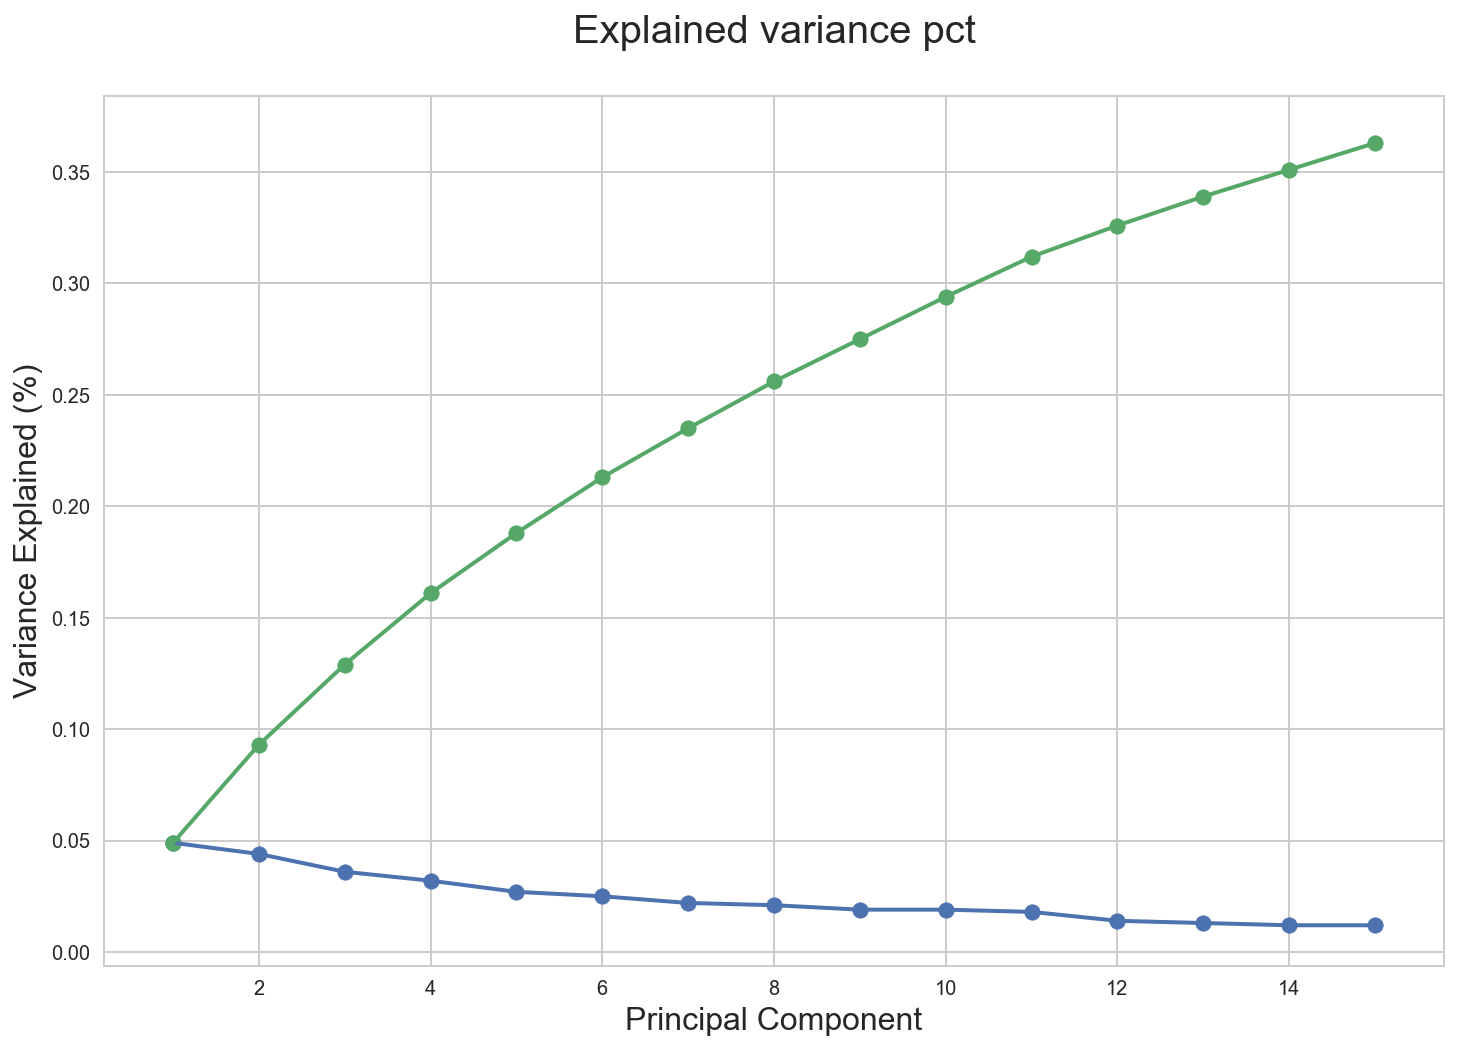

In [150]:
sns.set(style="whitegrid", color_codes=True, font_scale=1)
fig, ax = plt.subplots(figsize=(12, 8))
x_values = list(range(1, pca.n_components_+1))
ax.plot(x_values, np.round(pca.explained_variance_ratio_, 3), lw=2)
ax.scatter(x_values, np.round(pca.explained_variance_ratio_, 3), s=60)
ax.plot(x_values, np.cumsum(np.round(pca.explained_variance_ratio_, 3)), lw=2)
ax.scatter(x_values, np.cumsum(np.round(pca.explained_variance_ratio_, 3)), s=60)
ax.set_title('Explained variance pct\n', fontsize=20)
ax.set_xlabel('Principal Component', fontsize=16)
ax.set_ylabel('Variance Explained (%)', fontsize=16)
plt.show()

In [151]:
# highest component weight for each tag
df_comp = X_pca.idxmax(axis=1).to_frame()

In [312]:
# creating a tag-component dataframe
df_comp['tags'] = df_comp.index
df_comp.columns = ['components', 'tags']

In [153]:
df_comp.reset_index(drop=True, inplace=True)

In [154]:
df_comp.head()

components               tags
0       PC_4     tag_technology
1       PC_1        tag_science
2       PC_5  tag_global_issues
3       PC_8        tag_culture
4       PC_9           tag_tedx

In [155]:
df_comp.components.unique()

array(['PC_4', 'PC_1', 'PC_5', 'PC_8', 'PC_9', 'PC_10', 'PC_2', 'PC_7',
       'PC_14', 'PC_12', 'PC_3', 'PC_15', 'PC_6', 'PC_11', 'PC_13'],
      dtype=object)

In [156]:
for item in df_comp.components.unique():
    a = df_comp.loc[(df_comp['components']==item)].tags.get_values()
    print(item+ ' tags:')
    print(a)
    print('----------------------------------------------------')

PC_4 tags:
['tag_technology' 'tag_society' 'tag_social_change' 'tag_future'
 'tag_communication' 'tag_collaboration' 'tag_community' 'tag_data'
 'tag_government' 'tag_internet' 'tag_potential' 'tag_big_problems'
 'tag_global_development' 'tag_social_media' 'tag_policy' 'tag_law'
 'tag_web' 'tag_security' 'tag_pollution' 'tag_algorithm' 'tag_investment'
 'tag_fear' 'tag_united_states' 'tag_cars' 'tag_drones' 'tag_map'
 'tag_news' 'tag_privacy' 'tag_manufacturing' 'tag_virtual_reality'
 'tag_solar_energy' 'tag_hack' 'tag_immigration' 'tag_refugees'
 'tag_ebola' 'tag_nuclear_energy' 'tag_driverless_cars' 'tag_mobility'
 'tag_debate' 'tag_resources' 'tag_nuclear_weapons' 'tag_development'
 'tag_cooperation']
----------------------------------------------------
PC_1 tags:
['tag_science' 'tag_biology' 'tag_engineering' 'tag_biotech' 'tag_physics'
 'tag_evolution' 'tag_genetics' 'tag_robots' 'tag_dna' 'tag_astronomy'
 'tag_chemistry' 'tag_biomechanics' 'tag_microbiology' 'tag_bacteria'
 'tag_

### Final Components

As the above components weren't completely helpful in terms of differentiating the different general themes, I had to manually group them using the above components as a starting point. The new component dictionary that I created  consists of 22 new categories which will be used for multi label classification.

In [157]:
component_dict = {
#     tags related to technology
    'technology_th' : ['tag_technology', 'tag_communication', 'tag_collaboration','tag_internet', 'tag_potential', 'tag_big_problems',
 'tag_social_media', 'tag_web', 'tag_security', 'tag_algorithm', 'tag_cars', 'tag_drones', 'tag_privacy', 'tag_manufacturing',
 'tag_virtual_reality','tag_hack', 'tag_telecom','tag_mobility', 'tag_development', 'tag_cooperation', 'tag_ai', 'tag_augmented_reality',
'tag_innovation', 'tag_invention', 'tag_computers', 'tag_software', 'tag_microsoft', 'tag_programming', 'tag_data', 
 'tag_visualizations', 'tag_google', 'tag_blockchain', 'tag_cloud', 'tag_driverless_cars', 'tag_electricity', 'tag_cyborg', 'tag_open_source',
'tag_crispr', 'tag_statistics', 'tag_aircraft', 'tag_extraterrestrial_life'], 

#     tags related to the matters effecting society
 'society_th': ['tag_society', 'tag_social_change', 'tag_future', 'tag_community', 'tag_global_development', 'tag_protests', 'tag_debate', 'tag_corruption',
                'tag_consumerism', 'tag_population', 'tag_adventure', 'tag_crowdsourcing', 'tag_inequality', 'tag_sexual_violence',
 'tag_poverty', 'tag_race', 'tag_gender_equality', 'tag_morality','tag_consciousness', 'tag_slavery', 'tag_trafficking','tag_bullying','tag_sociology',
'tag_friendship', 'tag_activism', 'tag_philanthropy', 'tag_speech'] ,
    
# tags related to politics and policy
                  
'policy_politics_th': ['tag_government','tag_policy', 'tag_law', 'tag_map', 'tag_refugees', 'tag_immigration', 
                       'tag_justice_system', 'tag_politics', 'tag_democracy', 'tag_foreign_policy', 
                    'tag_state_building', 'tag_criminal_justice'],

#     tags related to the security matters

'security_th': ['tag_nuclear_weapons', 'tag_war', 'tag_surveillance', 'tag_forensics', 'tag_violence', 'tag_narcotics', 'tag_submarine', 'tag_military',
                      'tag_prison', 'tag_crime', 'tag_terrorism', 'tag_nonviolence', 'tag_guns'] ,

# tags related to science
                  
'science_and_research_th': ['tag_science', 'tag_biology', 'tag_engineering', 'tag_neuroscience', 'tag_cognitive_science', 'tag_history',
 'tag_biotech', 'tag_physics', 'tag_evolution', 'tag_genetics', 'tag_robots','tag_dna', 'tag_astronomy', 'tag_chemistry', 'tag_biomechanics', 'tag_astrobiology',
 'tag_molecular_biology', 'tag_microbiology', 'tag_bacteria', 'tag_planets', 'tag_bioethics', 'tag_physiology', 'tag_nasa', 'tag_biomimicry', 'tag_math', 
               'tag_universe', 'tag_ancient_world', 'tag_nanoscale', 'tag_machine_learning', 'tag_complexity',  'tag_telescopes', 'tag_prosthetics', 'tag_flight', 'tag_space',
               'tag_moon', 'tag_anthropology', 'tag_cosmos', 'tag_human_body', 'tag_synthetic_biology', 'tag_dark_matter', 'tag_human_origins', 'tag_big_bang',
'tag_paleontology', 'tag_dinosaurs', 'tag_discovery', 'tag_mars', 'tag_medical_imaging',  'tag_string_theory', 'tag_rocket_science',
 'tag_exoskeleton', 'tag_wunderkind', 'tag_asteroid', 'tag_biosphere', 'tag_deextinction', 'tag_geology',
 'tag_marine_biology', 'tag_philosophy', 'tag_prediction', 'tag_time'],

# tags related to nature and environment

 'nature_environment_th': ['tag_global_issues', 'tag_climate_change', 'tag_energy','tag_alternative_energy', 'tag_insects' ,'tag_solar_system',
 'tag_china', 'tag_botany', 'tag_anthropocene', 'tag_bees' ,'tag_wind_energy', 'tag_agriculture', 'tag_plastic', 'tag_glacier',
 'tag_primates', 'tag_ants', 'tag_mining', 'tag_pollution', 'tag_farming', 'tag_sustainability', 'tag_green', 'tag_environment', 'tag_solar_energy',
                           'tag_nature', 'tag_animals', 'tag_nuclear_energy',
 'tag_exploration', 'tag_oceans', 'tag_biodiversity', 'tag_ecology', 'tag_water', 'tag_plants',  'tag_natural_resources', 'tag_rivers', 'tag_weather', 
                           'tag_monkeys',  'tag_natural_disaster', 'tag_trees', 'tag_materials',
 'tag_conservation', 'tag_birds', 'tag_fish', 'tag_disaster_relief', 'tag_apes', 'tag_resources', 'tag_mission_blue', 'tag_oil']  ,

# tags related to living spaces & cities
'living_spaces_cult_th' : ['tag_culture', 'tag_cities', 'tag_architecture', 'tag_food',  'tag_transportation', 'tag_urban_planning', 'tag_garden', 
 'tag_world_cultures', 'tag_public_spaces', 'tag_urban', 'tag_infrastructure'] ,

# tags related religions and spirituality
'religions_spirituality_th': ['tag_islam', 'tag_buddhism', 'tag_atheism', 'tag_god', 'tag_christianity', 'tag_mindfulness', 'tag_meditation', 'tag_faith', 'tag_religion', 
                           'tag_peace', 'tag_evil', 'tag_charter_for_compassion'] ,
    
# tags for ted memberships, ted categorisation and awards
'tedmem_awardwin_th': ['tag_ted_fellows', 'tag_tedx', 'tag_ted_residency', 'tag_ted_brain_trust', 'tag_nobel_prize', 'tag_ted_prize'],

#     tags related to emotions and psychology
'emotions_psychology_th': ['tag_happiness', 'tag_fear', 'tag_motivation', 'tag_depression', 'tag_suicide', 
                           'tag_evolutionary_psychology',  'tag_compassion', 'tag_empathy', 'tag_psychology' ,'tag_vulnerability'],

#     tags related to business terms
'business_th': ['tag_business', 'tag_economics', 'tag_advertising', 'tag_work', 'tag_investment', 'tag_entrepreneur', 'tag_leadership',
                'tag_goal_setting', 'tag_work_life_balance','tag_success', 'tag_money', 'tag_behavioral_economics', 'tag_marketing',
 'tag_productivity', 'tag_finance', 'tag_capitalism', 'tag_trust','tag_shopping', 'tag_microfinance', 'tag_brand', 'tag_markets', 'tag_choice'],

# tags related to entertainment

'entertainment_th':['tag_entertainment', 'tag_humor', 'tag_comedy', 'tag_illusion', 'tag_magic', 'tag_meme', 'tag_funny', 'tag_origami', 'tag_gaming', 'tag_toy', 'tag_play'],

# tags related to media
    
'media_th': ['tag_television', 'tag_spoken_word', 'tag_online_video', 'tag_media', 
             'tag_interview', 'tag_journalism', 'tag_news', 'tag_ted_en_espaì±ol', 'tag_wikipedia', 'tag_speech'],

#     tags related to music

'music_th':['tag_conducting', 'tag_violin', 'tag_jazz', 'tag_singer', 'tag_piano', 'tag_live_music', 'tag_guitar', 'tag_cello', 'tag_composing', 'tag_vocals',
'tag_sound'],
    
# tags related to health and medicine

'health_and_medicine_th':['tag_health', 'tag_medicine', 'tag_health_care', 'tag_disease', 'tag_illness', 'tag_public_health', 'tag_cancer', 'tag_pharmaceuticals',
 'tag_heart_health', 'tag_surgery', 'tag_sanitation', 'tag_vaccines', 'tag_autism_spectrum_disorder', 'tag_pain',
'tag_alzheimers', 'tag_hiv', 'tag_medical_research', 'tag_mental_health', 'tag_blindness', 'tag_virus', 'tag_obesity', 'tag_testing',
'tag_microbes', 'tag_addiction', 'tag_epidemiology', 'tag_ebola', 'tag_life', 'tag_ptsd', 'tag_pandemic', 'tag_aids', 'tag_death', 'tag_hearing', 'tag_sight', 'tag_brain',
                          'tag_mind', 'tag_disability', 'tag_tedmed'],
# tags related to arts and design
    
'art_and_design_th': ['tag_art', 'tag_storytelling','tag_music', 'tag_film', 'tag_beauty','tag_typography', 'tag_design', 'tag_performance','tag_science_and_art', 'tag_product_design',
'tag_interface_design', 'tag_archaeology', 'tag_simplicity', 'tag_photography', 'tag_movies', 'tag_dance', 'tag_performance_art',
 'tag_animation', 'tag_macarthur_grant', 'tag_museums', 'tag_theater', 'tag_painting', 'tag_industrial_design', 'tag_demo', 'tag_3d_printing', 'tag_street_art', 'tag_fashion'],

# tags related to genders

'gender_matters_th' : ['tag_gender', 'tag_transgender', 'tag_lgbt', 'tag_sex', 'tag_gay', 'tag_men', 
                       'tag_women_in_business', 'tag_feminism', 'tag_women', 'tag_gender_spectrum'],
    
# tags related to education & learning and youth
    
'educ_learn_youth_th' : ['tag_ted_ed', 'tag_tedyouth', 'tag_education', 'tag_teaching', 'tag_curiosity', 'tag_code', 'tag_student', 'tag_presentation', 'tag_youth'],
    
# tags related to sports
    
'sports' : ['tag_skateboarding', 'tag_extreme_sports', 'tag_sports'],
    
# tags related to literature

'literature_th': ['tag_writing', 'tag_poetry', 'tag_literature', 'tag_ted_books', 'tag_books', 'tag_novel',  'tag_language', 'tag_library', 
'tag_grammar'] ,
    
# human

'human_th' : ['tag_love', 'tag_relationships', 'tag_travel', 'tag_children', 'tag_personal_growth', 'tag_family',
              'tag_parenting', 'tag_humanity', 'tag_identity', 'tag_self', 'tag_aging', 'tag_personality', 'tag_sleep',
              'tag_senses', 'tag_introvert', 'tag_memory', 'tag_failure', 'tag_pregnancy', 'tag_body_language', 'tag_smell',
              'tag_decision_making', 'tag_creativity','tag_intelligence'],

# continents & cities & countries

'continents_cities_countries_th' : ['tag_syria', 'tag_new_york', 'tag_iraq', 'tag_brazil', 'tag_egypt', 'tag_africa', 'tag_united_states',
                                    'tag_europe', 'tag_middle_east', 'tag_south_america', 'tag_asia', 'tag_tednyc', 'tag_iran']
}


In [159]:
# removing the 'tag_' string from the values of the dictionary
cm_dict = {key:[value.replace('tag_', '') for value in component_dict[key]] for key in component_dict.keys()}

In [169]:
# removing the 'tag_' columns created for the PCA
df = df[list(df.columns)[:139]]

In [170]:
# creating new label columns
def tag_to_comp(df):
    for key, value in cm_dict.items():
        df[key]=np.zeros(len(df), int)
        for j,m in df.iterrows():  
            for item in list(m[11].lower().strip('[,]').replace("'", '').replace('"', '').split(',')):     
                if item.strip().replace(' ', '_').replace('-', '_') in value:
                    df.loc[j, key]=1
                    break

In [171]:
# dfx = df.iloc[:2,:]
tag_to_comp(df)

The final Data Frame consists of 2403 rows and 161 columns

In [175]:
df.shape

(2403, 161)

In [173]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [176]:
df.head()

comments                                        description  duration  \
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1       265  With the same humor and humanity he exuded in ...       977   
2       124  New York Times columnist David Pogue takes aim...      1286   
3       200  In an emotionally charged talk, MacArthur-winn...      1116   
4       593  You've never seen data presented like this. Wi...      1190   

     event   film_date  languages   main_speaker  \
0  TED2006  1140825600         60   Ken Robinson   
1  TED2006  1140825600         43        Al Gore   
2  TED2006  1140739200         26    David Pogue   
3  TED2006  1140912000         35  Majora Carter   
4  TED2006  1140566400         48   Hans Rosling   

                                            name  published_date  \
0      Ken Robinson: Do schools kill creativity?      1151367060   
1           Al Gore: Averting the climate crisis      1151367060   
2                  David Pogue: Simplicity sells      1151367060   
3             Majora Carter: Greening the ghetto      1151367060   
4  Hans Rosling: The best stats you've ever seen      1151440680   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
2  [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...   
3  [{'id': 3, 'name': 'Courageous', 'count': 760}...   
4  [{'id': 9, 'name': 'Ingenious', 'count': 3202}...   

                     speaker_occupation  \
0                       Author/educator   
1                      Climate advocate   
2                  Technology columnist   
3    Activist for environmental justice   
4  Global health expert; data visionary   

                                                tags  \
0  ['children', 'creativity', 'culture', 'dance',...   
1  ['alternative energy', 'cars', 'climate change...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['Africa', 'Asia', 'Google', 'demo', 'economic...   

                             title  \
0      Do schools kill creativity?   
1      Averting the climate crisis   
2                 Simplicity sells   
3              Greening the ghetto   
4  The best stats you've ever seen   

                                                 url     views  music  \
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110      0   
1  https://www.ted.com/talks/al_gore_on_averting_...   3200520      0   
2  https://www.ted.com/talks/david_pogue_says_sim...   1636292      0   
3  https://www.ted.com/talks/majora_carter_s_tale...   1697550      0   
4  https://www.ted.com/talks/hans_rosling_shows_t...  12005869      0   

   conversation                                         transcript  \
0             0  Good morning. How are you?()It's been great, h...   
1             0  Thank you so much, Chris. And it's truly a gre...   
2             0  ()Hello voice mail, my old friend.()I've calle...   
3             0  If you're here today  and I'm very happy th...   
4             0  About 10 years ago, I took on the task to teac...   

   persuasive  inspiring  unconvincing  applause  laughter  norm_persuasive  \
0       10704      24924           300         4        39       226.649482   
1         268        413           258         3        21        83.736393   
2         230        230           104        12        38       140.561709   
3         460       1070            36         7        10       270.978764   
4        2542       2893            67         3        10       211.729780   

   norm_inspiring  norm_unconvincing    WC  Analytic  Clout  Authentic   Tone  \
0      527.747728           6.352284  3119     38.67  90.77      30.78  56.66   
1      129.041531          80.611901   723     76.53  75.55      70.35  51.66   
2      140.561709          63.558338  3253     37.41  73.98      49.15  55.32   
3  

## Summary Statistics

In [301]:
dfs = DataFrameSummary(df)
dfs.summary()

comments description duration        event    film_date  \
count            2403         NaN     2403          NaN         2403   
mean          190.883         NaN  817.814          NaN  1.32988e+09   
std           287.738         NaN  317.134          NaN  1.16837e+08   
min                 2         NaN      135          NaN  4.44528e+08   
25%                60         NaN      587          NaN  1.26576e+09   
50%               116         NaN      849          NaN  1.34058e+09   
75%               220         NaN     1040          NaN  1.42646e+09   
max              6404         NaN     2678          NaN  1.51062e+09   
counts           2403        2403     2403         2403         2403   
uniques           551        2403     1033          323          682   
missing             0           0        0            0            0   
missing_perc       0%          0%       0%           0%           0%   
types         numeric      unique  numeric  categorical      numeric   

             languages main_speaker    name published_date ratings  \
count             2403          NaN     NaN           2403     NaN   
mean           27.8069          NaN     NaN    1.34976e+09     NaN   
std            8.69787          NaN     NaN    9.74959e+07     NaN   
min                  1          NaN     NaN    1.15137e+09     NaN   
25%                 23          NaN     NaN    1.27154e+09     NaN   
50%                 28          NaN     NaN     1.3491e+09     NaN   
75%                 33          NaN     NaN    1.43218e+09     NaN   
max                 72          NaN     NaN    1.51275e+09     NaN   
counts            2403         2403    2403           2403    2403   
uniques             65         2037    2403           2347    2403   
missing              0            0       0              0       0   
missing_perc        0%           0%      0%             0%      0%   
types          numeric  categorical  unique        numeric  unique   

             speaker_occupation         tags   title     url        views  \
count                       NaN          NaN     NaN     NaN         2403   
mean                        NaN          NaN     NaN     NaN  1.72997e+06   
std                         NaN          NaN     NaN     NaN  2.53947e+06   
min                         NaN          NaN     NaN     NaN       155895   
25%                         NaN          NaN     NaN     NaN       790356   
50%                         NaN          NaN     NaN     NaN  1.13949e+06   
75%                         NaN          NaN     NaN     NaN  1.70649e+06   
max                         NaN          NaN     NaN     NaN  4.72271e+07   
counts                     2403         2403    2403    2403         2403   
uniques                    1405         2392    2403    2403         2403   
missing                       0            0       0       0            0   
missing_perc                 0%           0%      0%      0%           0%   
types               categorical  categorical  unique  unique      numeric   

                 music conversation transcript persuasive inspiring  \
count             2403         2403        NaN       2403      2403   
mean                 0            0        NaN    227.266   533.794   
std                  0            0        NaN    475.225   1304.97   
min                  0            0        NaN          0         5   
25%                  0            0        NaN         42       114   
50%                  0            0        NaN        101       235   
75%                  0            0        NaN      233.5       502   
max                  0            0        NaN      10704     24924   
counts            2403         2403       2403       2403      2403   
uniques              1            1       2403        632       949   
missing              0            0          0          0         0   
missing_perc        0%           0%         0%         0%        0%   
types         constan

## Distribution Plots

### Gender, Occupation & Published Year

I have looked at the distribution of Genders and the Occupations as well as the distribution of gender within occupation and published year features.

The number of male speakers seems to be as twice as the number of female speakers in this dataset. Looking at the distribution of genders based on the publishing year of the videos, we can see that until 2017, number of male speakers were significantly higher than the females. Only in 2017, number of females seems to be slightly greater than the number of males.

The third bar graph below displays the distribution of the speaker occupations. 'Other' category has the highest number of speakers as they have very specific titles that doesn't have commonality with the other categories. Following this is the speakers that are Activists, Scientists and Artists.

The last graph, showing the distribution if the occupations by gender provides more interesting insight about the data.In almost all categories, the number of males is higher than the females except a few categories such as Activist, Researcher and Researcher.

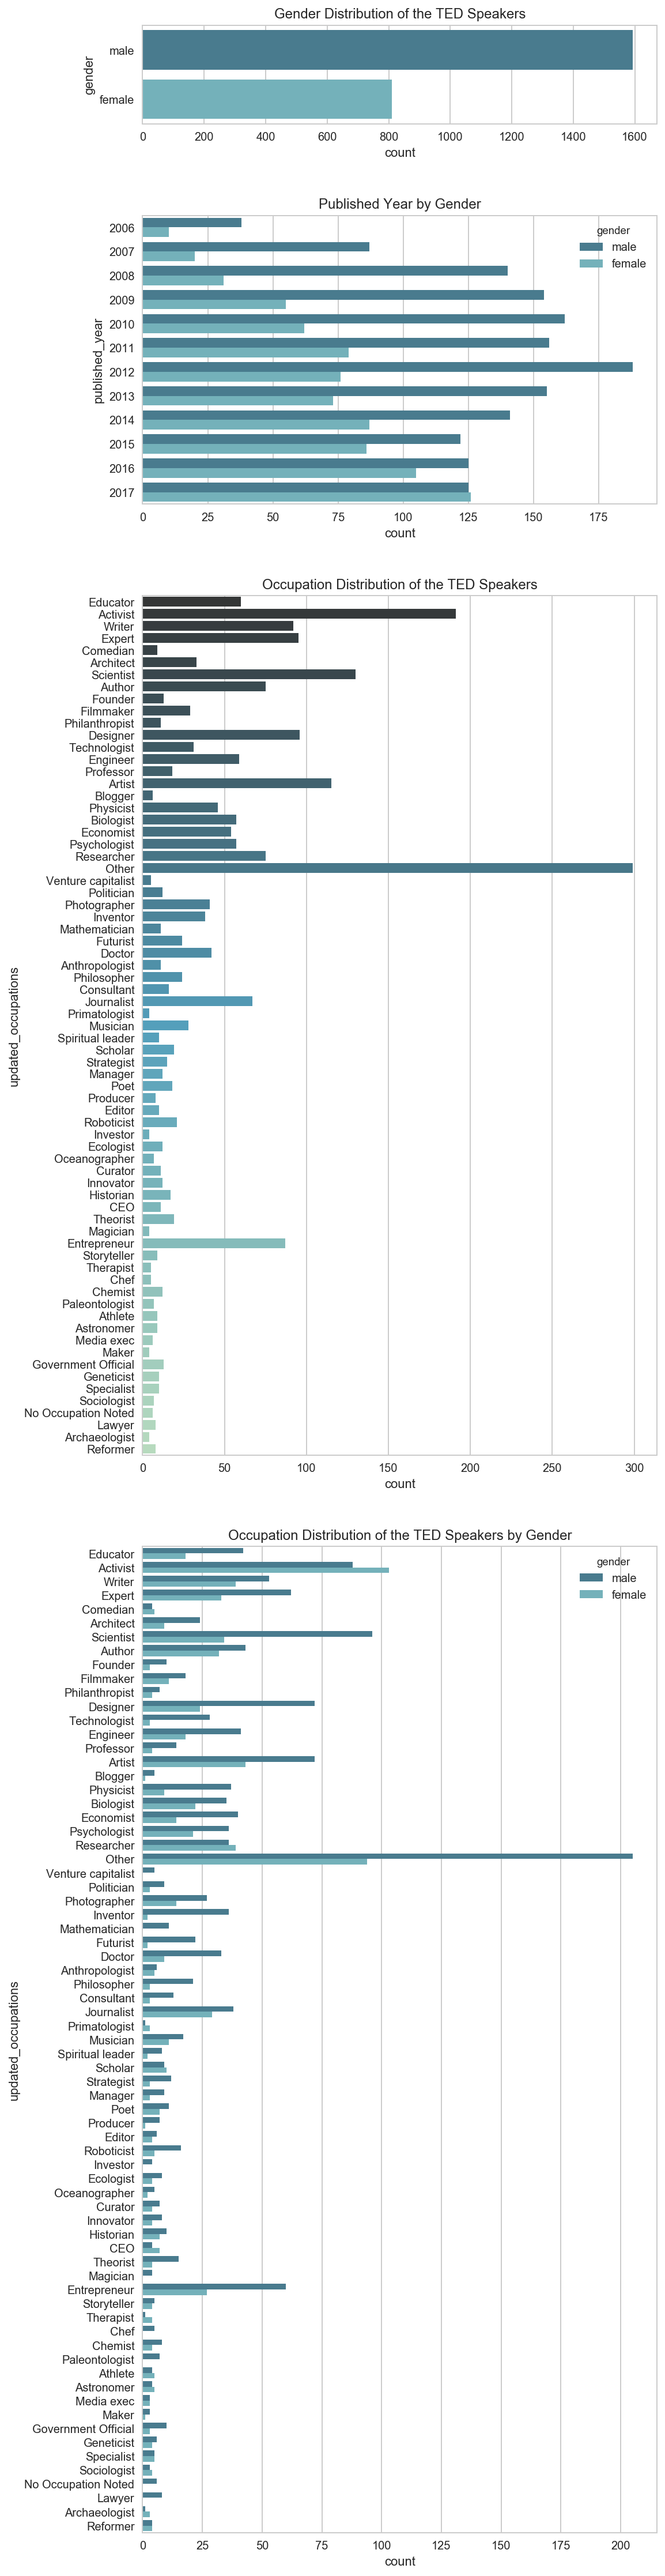

In [152]:
sns.set(style="whitegrid", color_codes=True, font_scale=1)
fig, ax = plt.subplots(figsize=(8,40))
grid = plt.GridSpec(40, 1, wspace=0.8, hspace=0.8)
#     ax1 = ax[0]
#     ax2 = ax[1]
#     ax3 = ax[2]
ax1 = plt.subplot(grid[:2, 0])
ax2 = plt.subplot(grid[3:8, 0])
ax3 = plt.subplot(grid[9:23, 0])
ax4 = plt.subplot(grid[24:, 0])
sns.countplot(y = 'gender', data=df, palette='GnBu_d', ax=ax1, orient='h');
ax1.set_title('Gender Distribution of the TED Speakers');
sns.countplot(y = 'updated_occupations', data=df, palette='GnBu_d', ax=ax3, orient='h')
ax3.set_title('Occupation Distribution of the TED Speakers');
sns.countplot(y = 'published_year', data=df, palette = 'GnBu_d', ax=ax2, orient='h', hue='gender')
ax2.set_title('Published Year by Gender');
sns.countplot(y = 'updated_occupations', data=df, palette='GnBu_d', ax=ax4, orient='h', hue='gender')
ax4.set_title('Occupation Distribution of the TED Speakers by Gender');

### Video Topics

The distribution of the general topics are shown below. Looking at these distributions, we can see that the almost half of the videos within this tag, followed by science and research, environment and nature and society matters. These variables will be used for multi label classification.

In [244]:
def plot_video_topics(df, i):
    fig, ax = plt.subplots(figsize=(8,1))
    sns.countplot(y = df.columns[i], data=df, palette='GnBu_d', orient='h');
    ax.set_title(df.columns[i] + ' distribution');

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


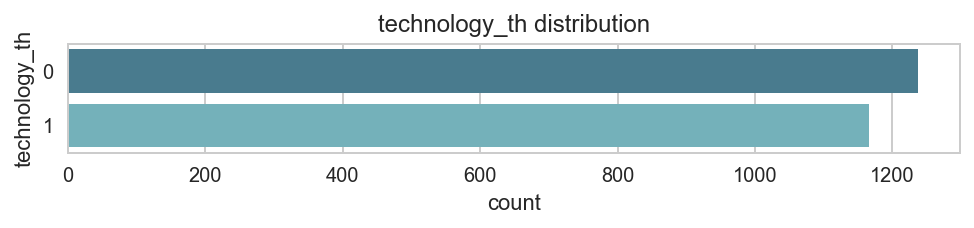

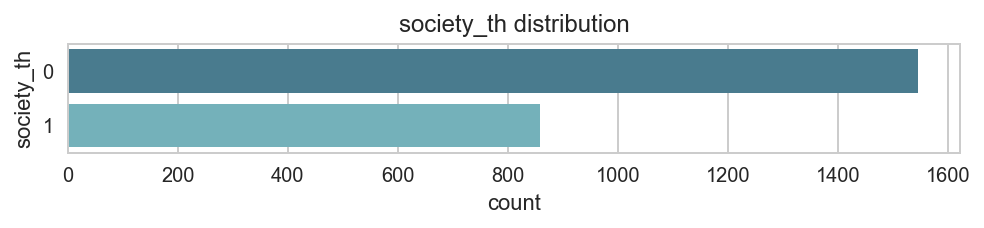

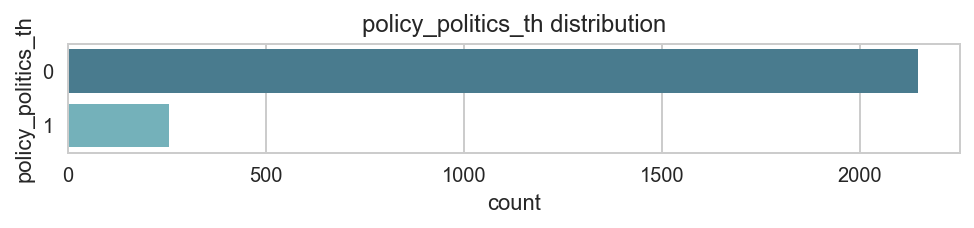

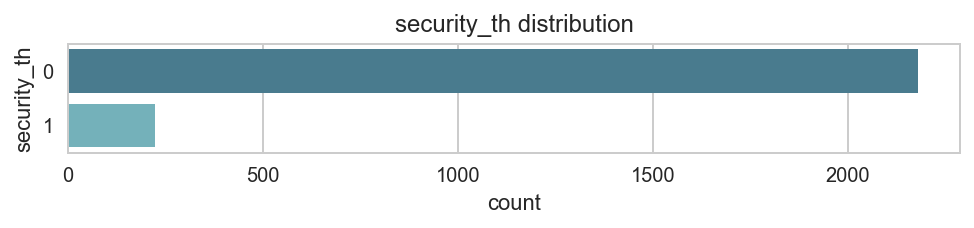

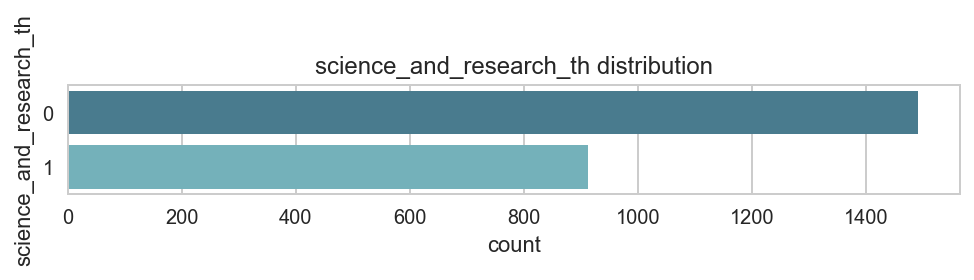

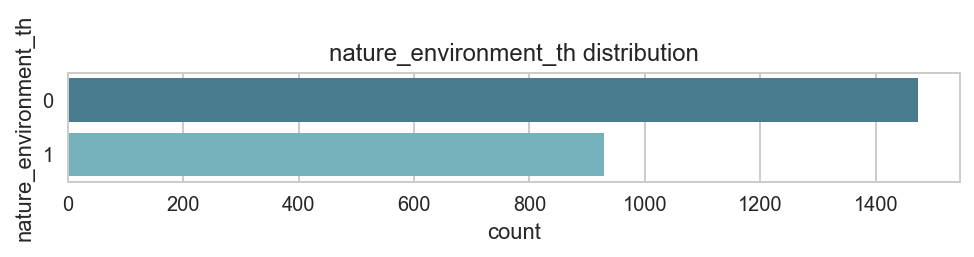

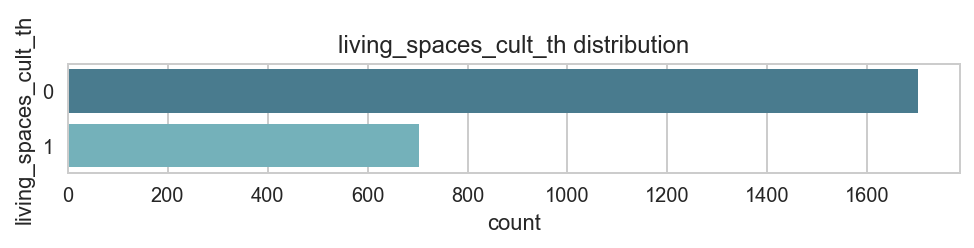

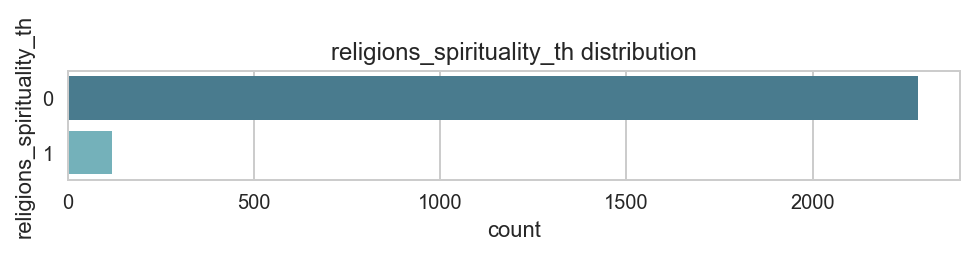

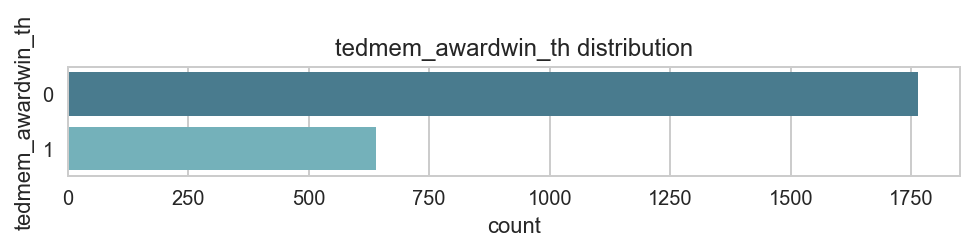

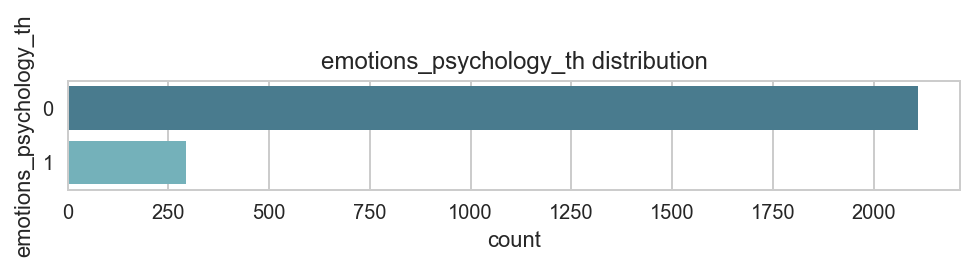

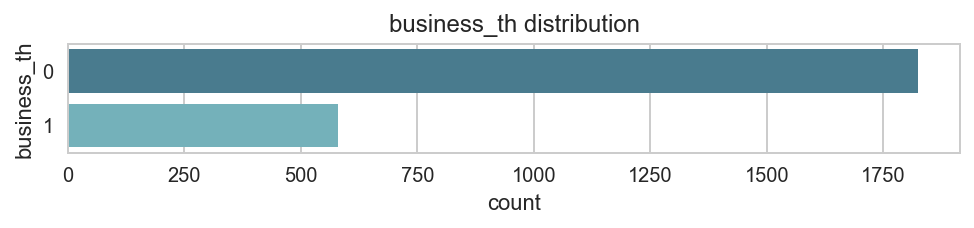

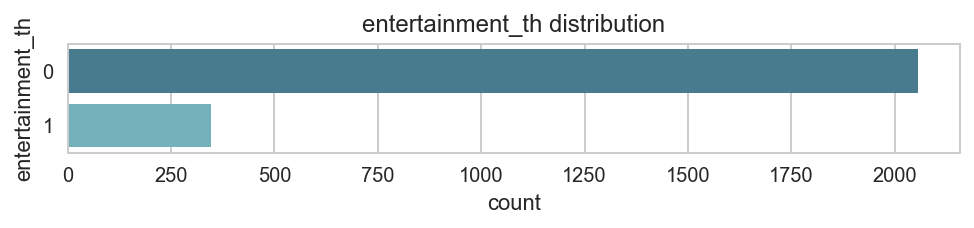

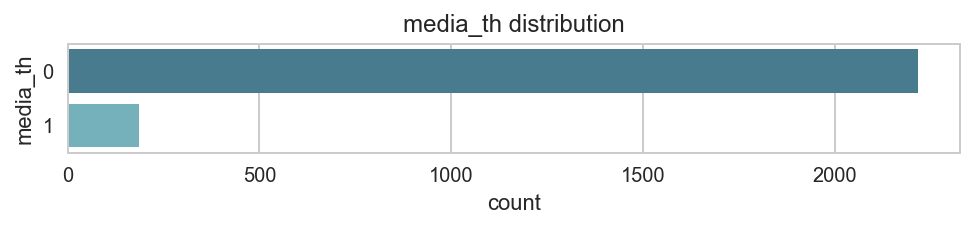

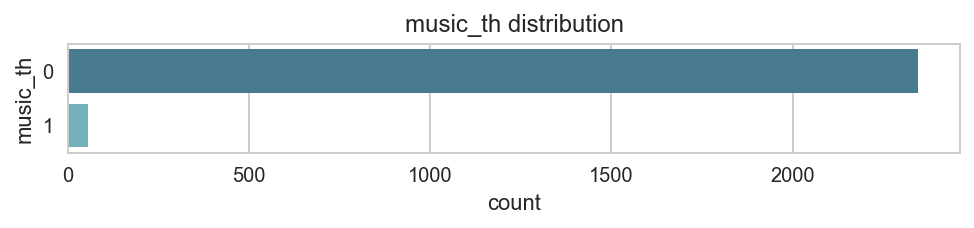

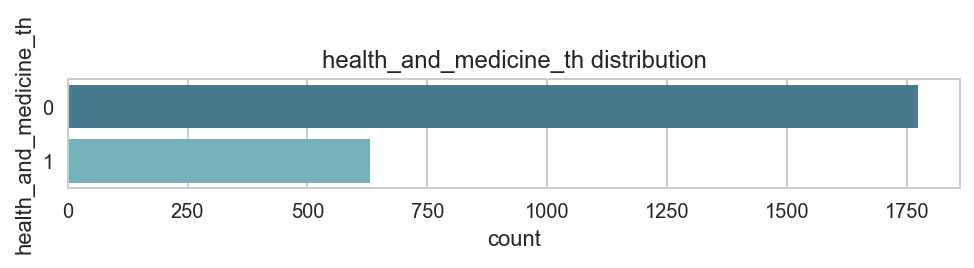

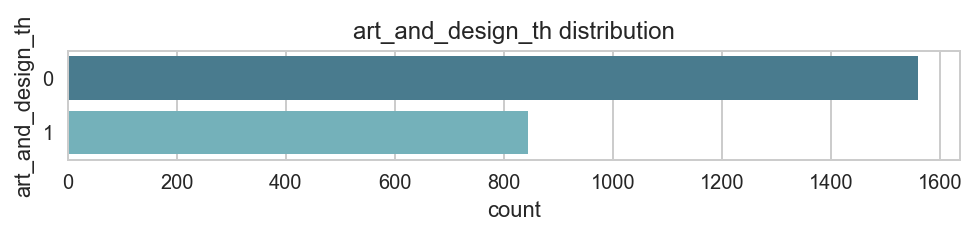

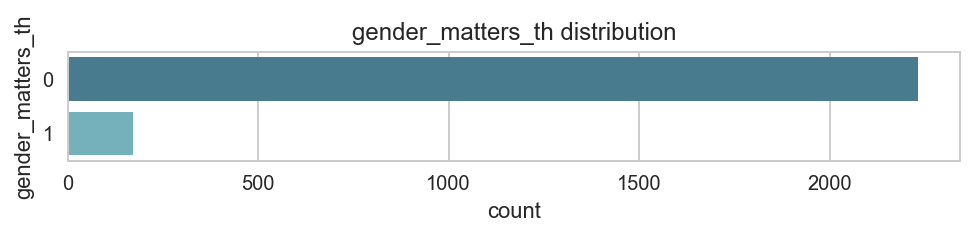

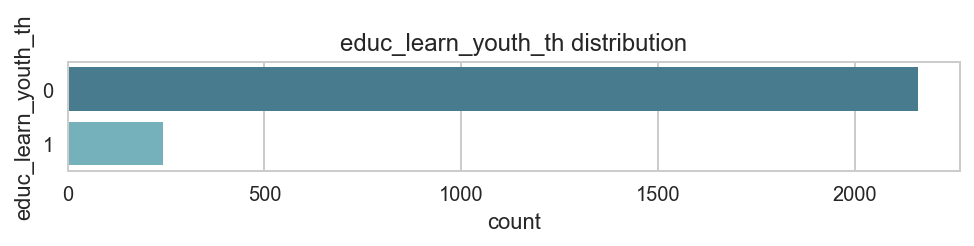

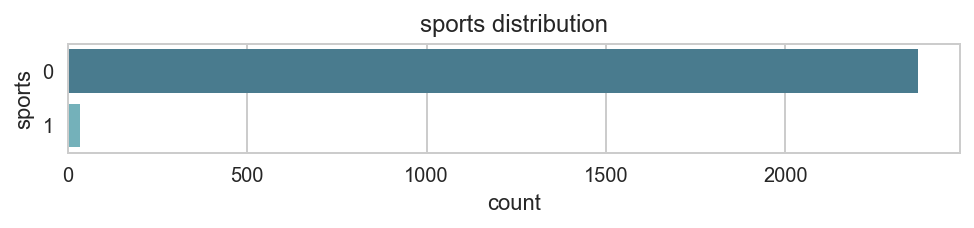

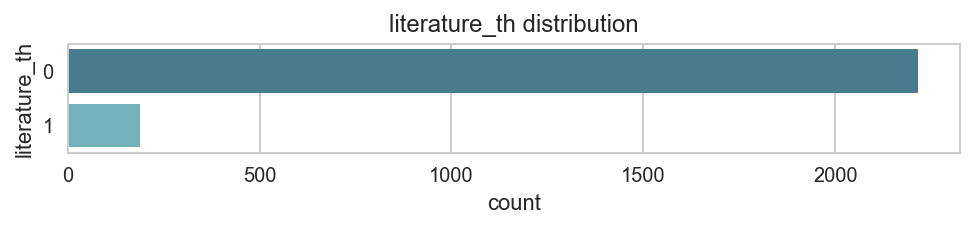

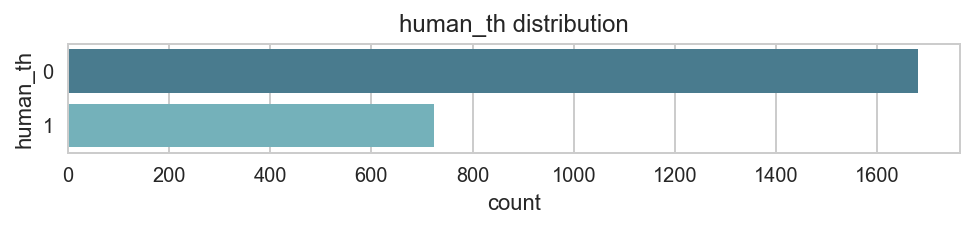

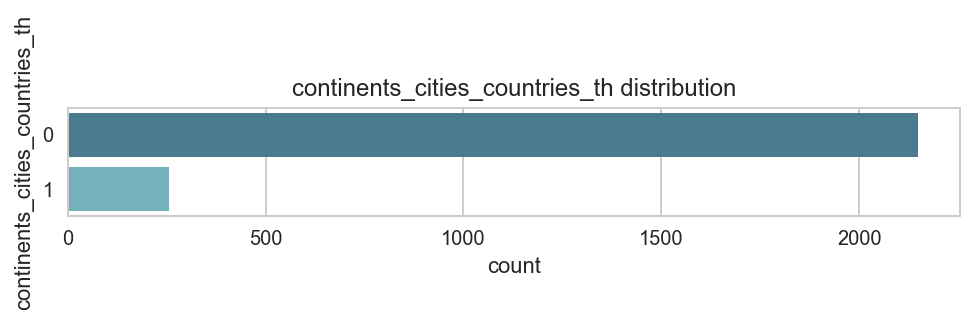

In [246]:
for i in range(-22,0):
    plot_video_topics(df, i)

### Continuous Variables

Currently, I have 117 continuous predictors in the dataset. I had initially plotted their distribution as well as the distributions based on gender and the occupations. The observations suggested that very few of these variables are normally distributed, whereas a large number of them are either positively and negatively skewed. I will not be transforming these variables at the moment, as a transformation will be applied before the prediction models. 

To demonstrate some of these distributions, I have selected subset of these features that I thought were interesting. To normalize for the class size differences, I grouped the continuous variables by the categorical variables of gender and occupations and averaged the value of continuous variables within the group.

As the below histograms suggests, all subsetted continuous variables have some level of skewness. Looking at the gender and occupation distribution of these features, it's interesting to see that videos with male speakers are commented more than the ones with a female speaker. On the other hand, videos from a Philanthropist, Philosopher and Psychologist has more comments in average.

The distributions of duration, languages and views seem to be similar for both genders. However, in average magicians have more views than the rest of the occupation groups which I think another interesting finding.

The distributions of norm_persuasive (persuasive votes normalized by the total number of votes), norm_inspiring and norm_unconvincing suggests somewhat inconsistent results in terms of the gender distributions. While male speakers seem to have the largest proportion of the persuasive votes, they also have a slightly higher unconvincing votes in comparison to the females. On the other hand, slightly higher number of females were voted as inspiring while the occupation category with the highest inspiring votes were athletes.

In terms of word counts, male speakers again have the majority in average while in terms of the positive and negative emotions, female speakers seem to have the higher proportion of the word counts related to these emotions.

In [256]:
# continuous variables that will be used in the analyses
var_list = ['comments', 'duration','languages','views',
 'norm_persuasive','norm_inspiring','norm_unconvincing', 'WC','Analytic','Clout','Authentic','Tone','WPS','Sixltr','Dic',
 'function','pronoun','ppron','i','we','you','shehe','they','ipron','article','prep','auxverb','adverb','conj','negate',
 'verb','adj','compare','interrog','number','quant','affect','posemo','negemo','anx','anger','sad','social','family',
 'friend','female','male','cogproc','insight','cause','discrep','tentat','certain','differ','percept','see','hear',
 'feel','bio','body','health','sexual','ingest','drives','affiliation','achieve','power','reward','risk','focuspast',
 'focuspresent','focusfuture','relativ','motion','space','time','work','leisure','home','money','relig','death','informal',
 'swear','netspeak','assent','nonflu','filler','AllPunc','Period','Comma','Colon','SemiC','QMark','Exclam','Dash','Quote',
 'Apostro','Parenth','OtherP','Moral','HarmVirtue','HarmVice','FairnessVirtue','FairnessVice','IngroupVirtue','IngroupVice',
 'AuthorityVirtue','AuthorityVice','PurityVirtue','PurityVice','MoralityGeneral','Harm','Fairness',
 'Purity','Ingroup','Authority']

In [257]:
len(var_list)

117

In [258]:
# the list of categorical variables in the dataset
cat_var = ['gender', 'updated_occupations']

In [269]:
def plot(df, var_name, cat_vars):
    c_palette = sns.cubehelix_palette(8, start=.5, rot=-.75)
    sns.set(color_codes=True, rc={'grid.color': '0.9'}, palette = 'dark',
        style = 'whitegrid', font_scale = 1)
    fig, ax = plt.subplots(figsize=(20,12))
    grid = plt.GridSpec(2, 4, wspace=0.4, hspace=0.4)
    ax1 = plt.subplot(grid[0, 0:2])
    ax2 = plt.subplot(grid[0, 2:])
    ax3 = plt.subplot(grid[1, 0:])
    sns.distplot(df[var_name], axlabel=var_name, kde=False, bins=50, 
             color = 'g', vertical=False, ax=ax1, );
    df.groupby([cat_vars[0]])[[var_name]].mean().plot(kind='bar', colormap = 'PRGn', ax=ax2);
    df.groupby([cat_vars[1]])[[var_name]].mean().plot(kind='bar', colormap = 'PRGn', 
                                                      ax=ax3).set_xticklabels(ax3.get_xticklabels(),rotation=90, horizontalalignment='center');
    plt.suptitle('Distribution of ' + var_name, );

In [270]:
# loop below creates plots for each continuous variable in var_list list.
# for var in var_list:
#     plot(df, var, cat_var)

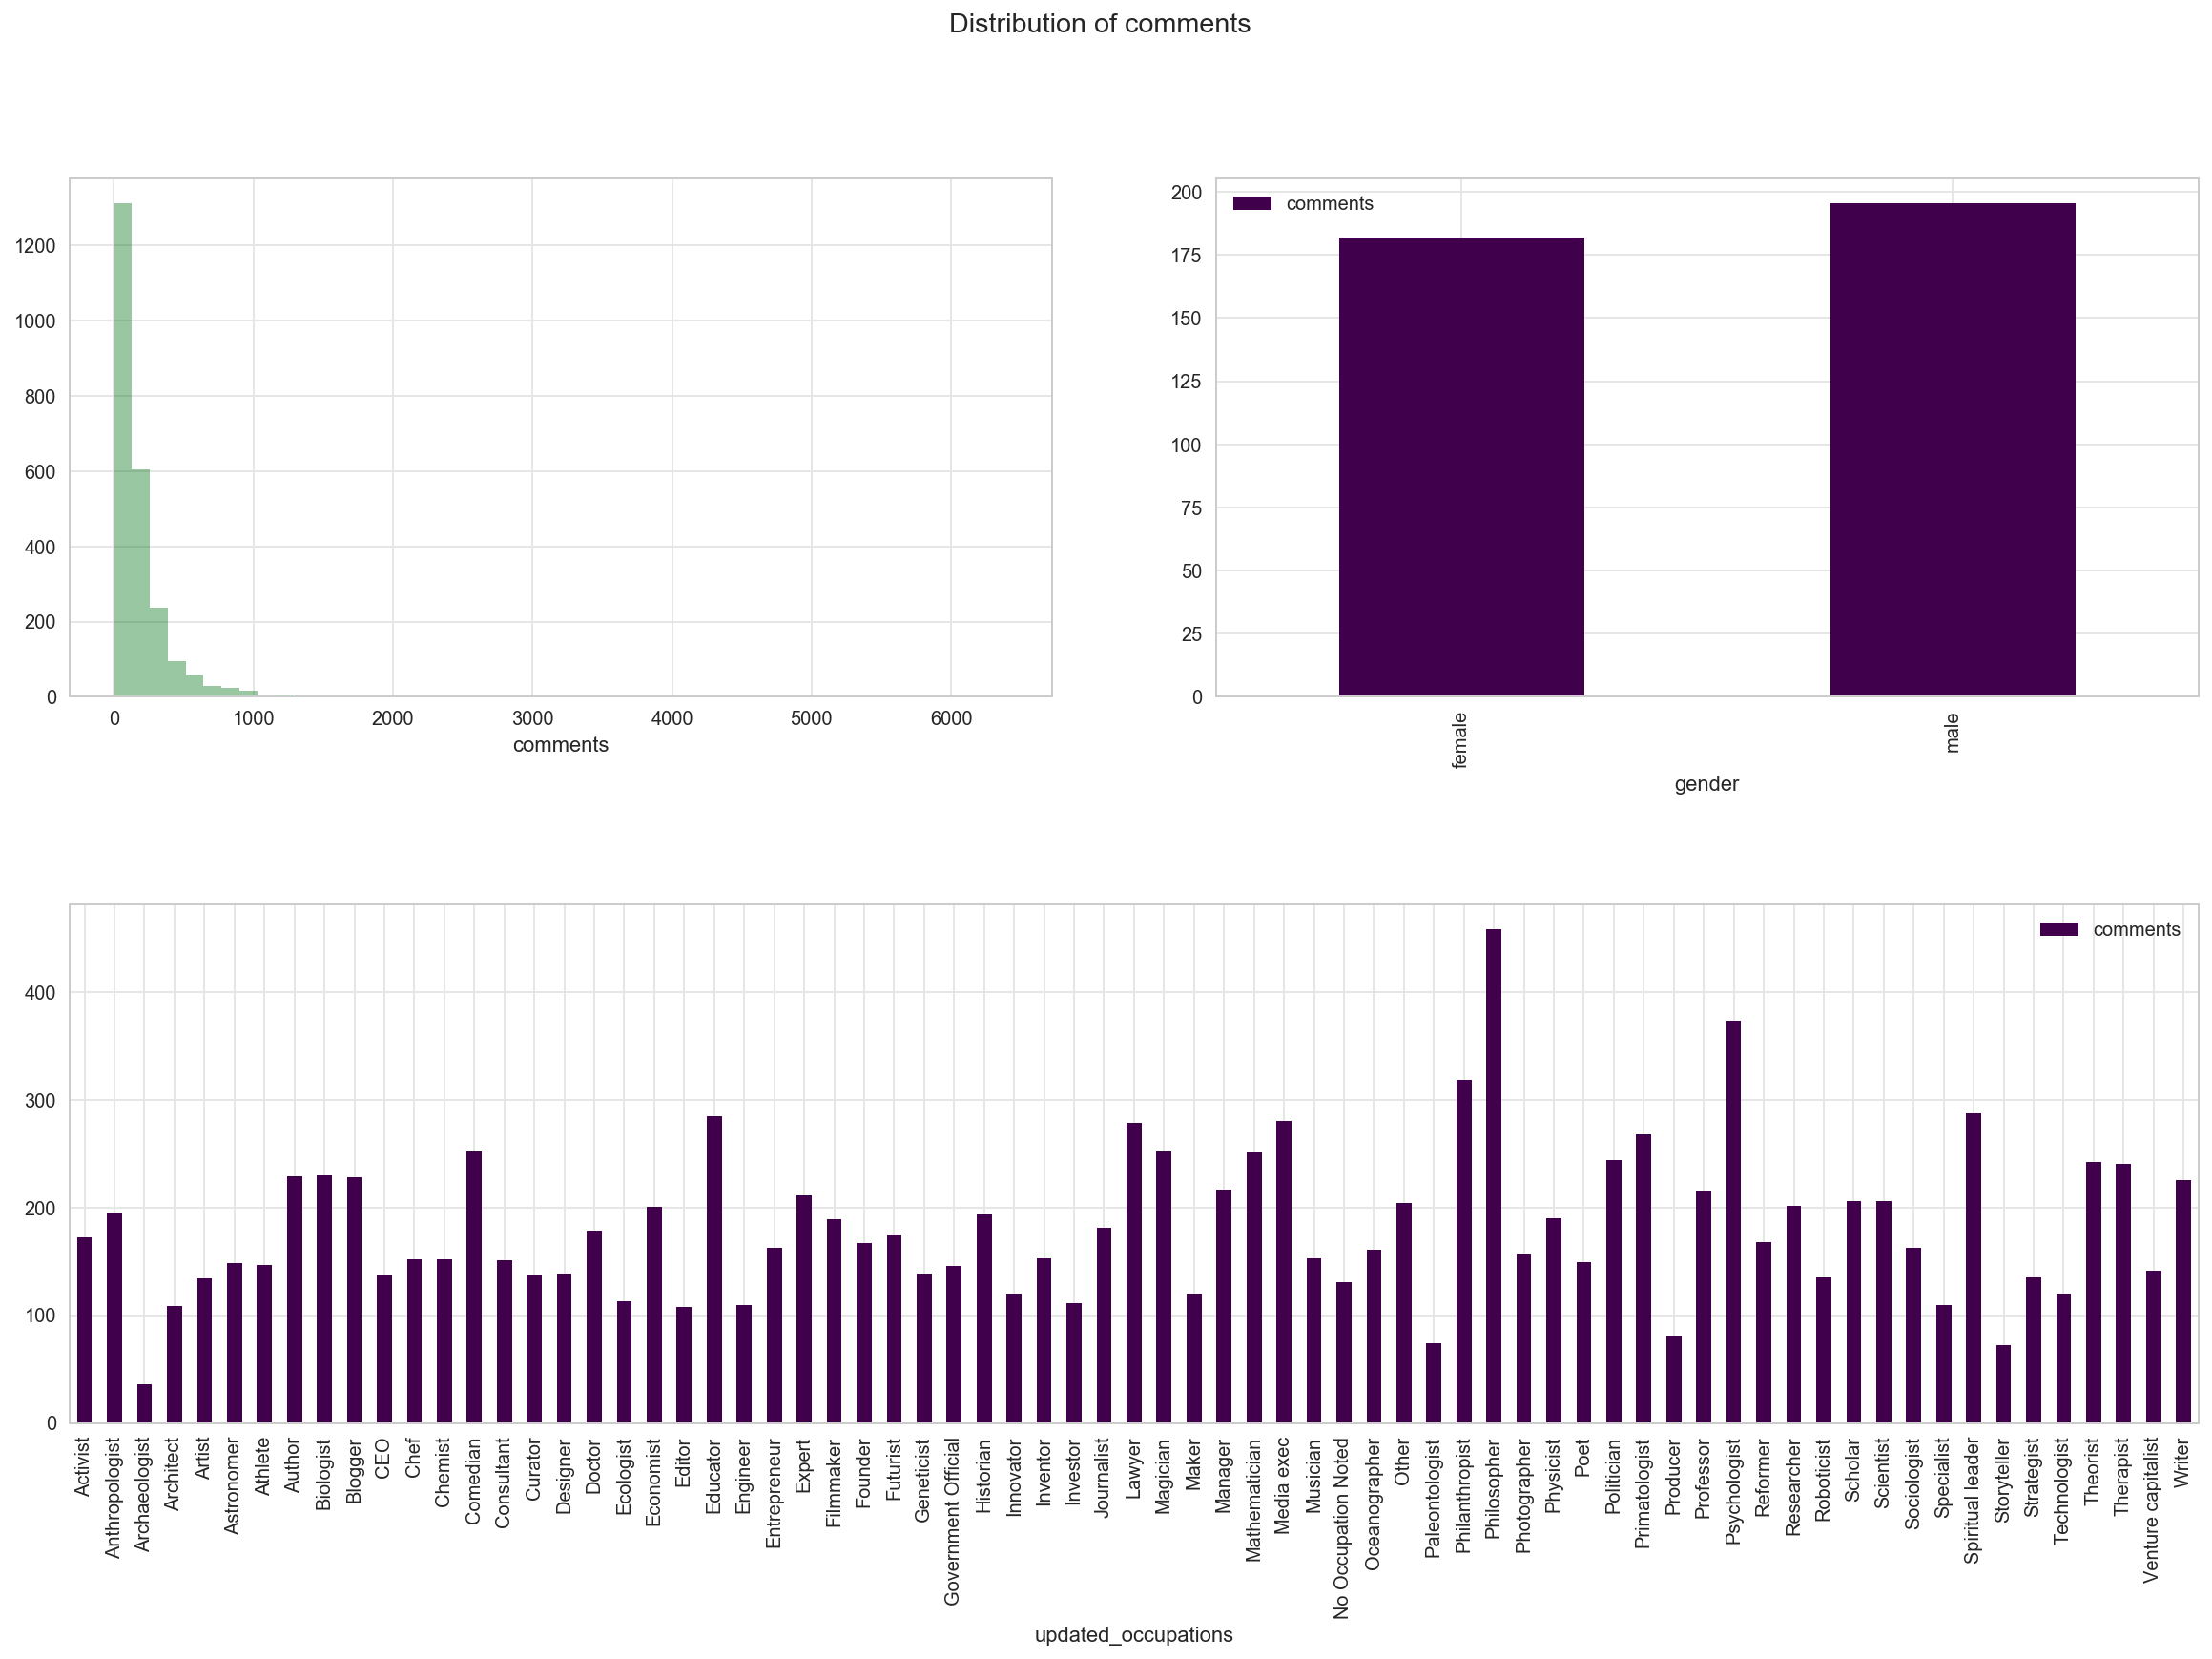

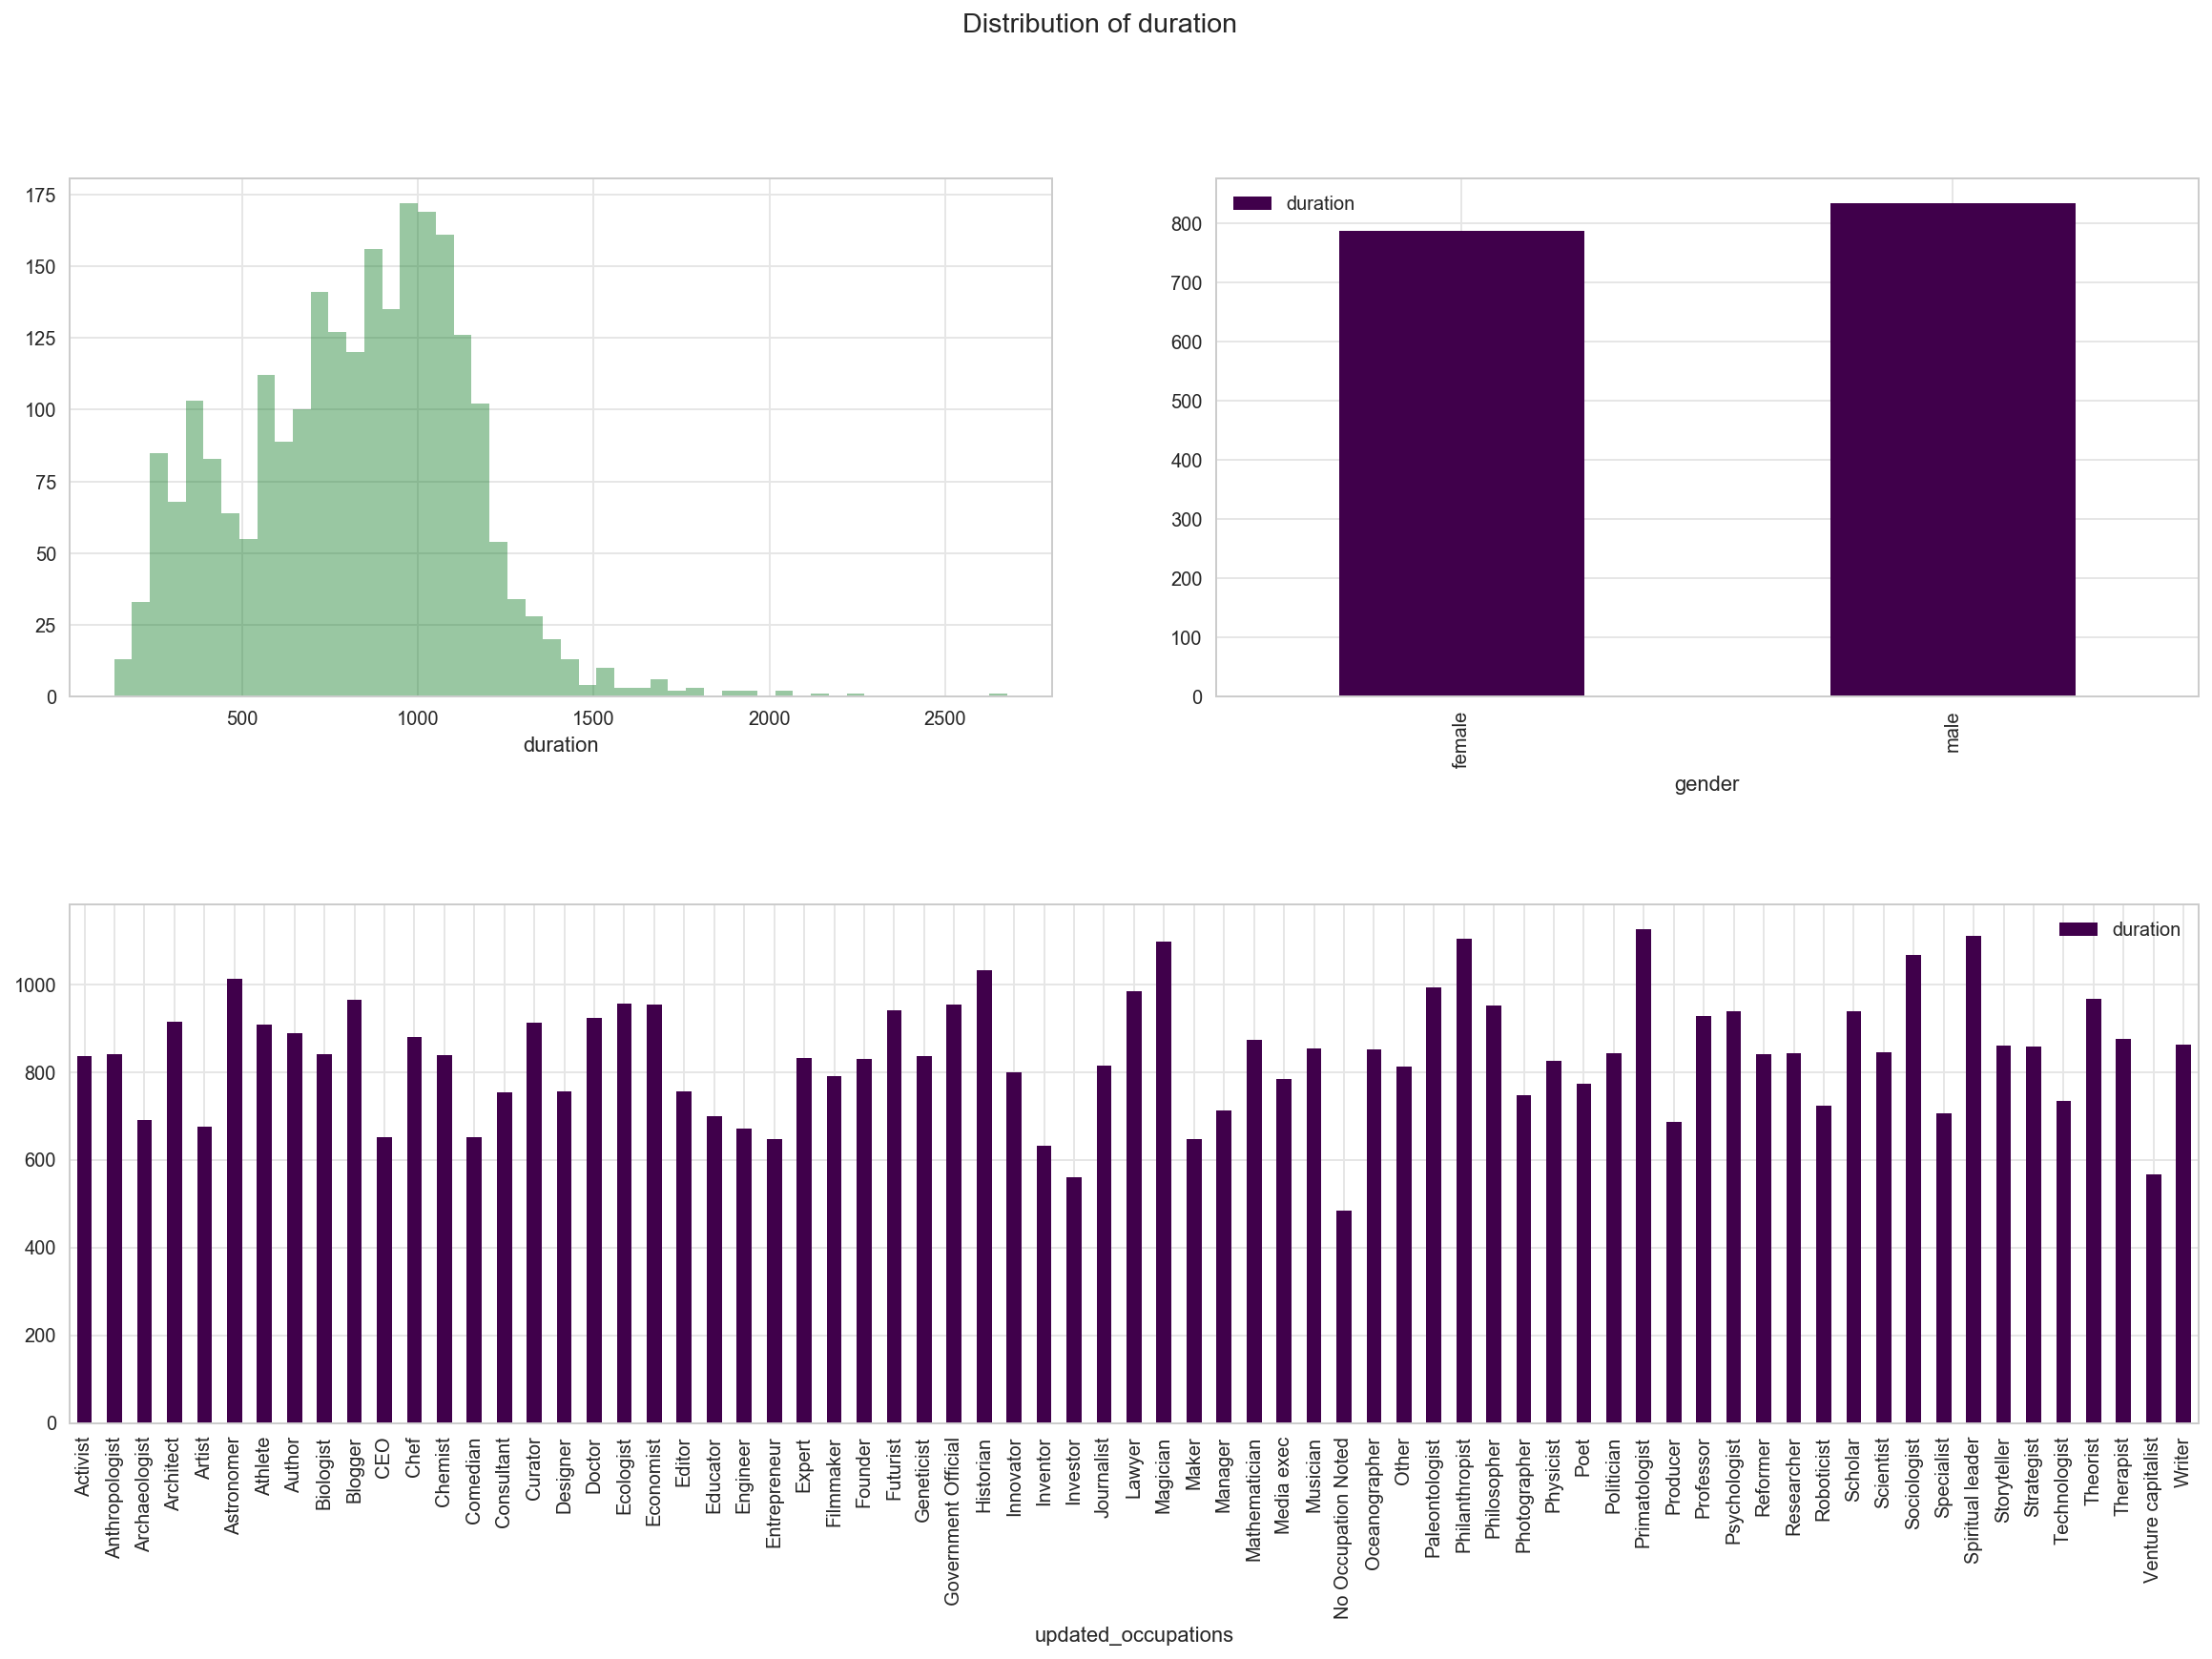

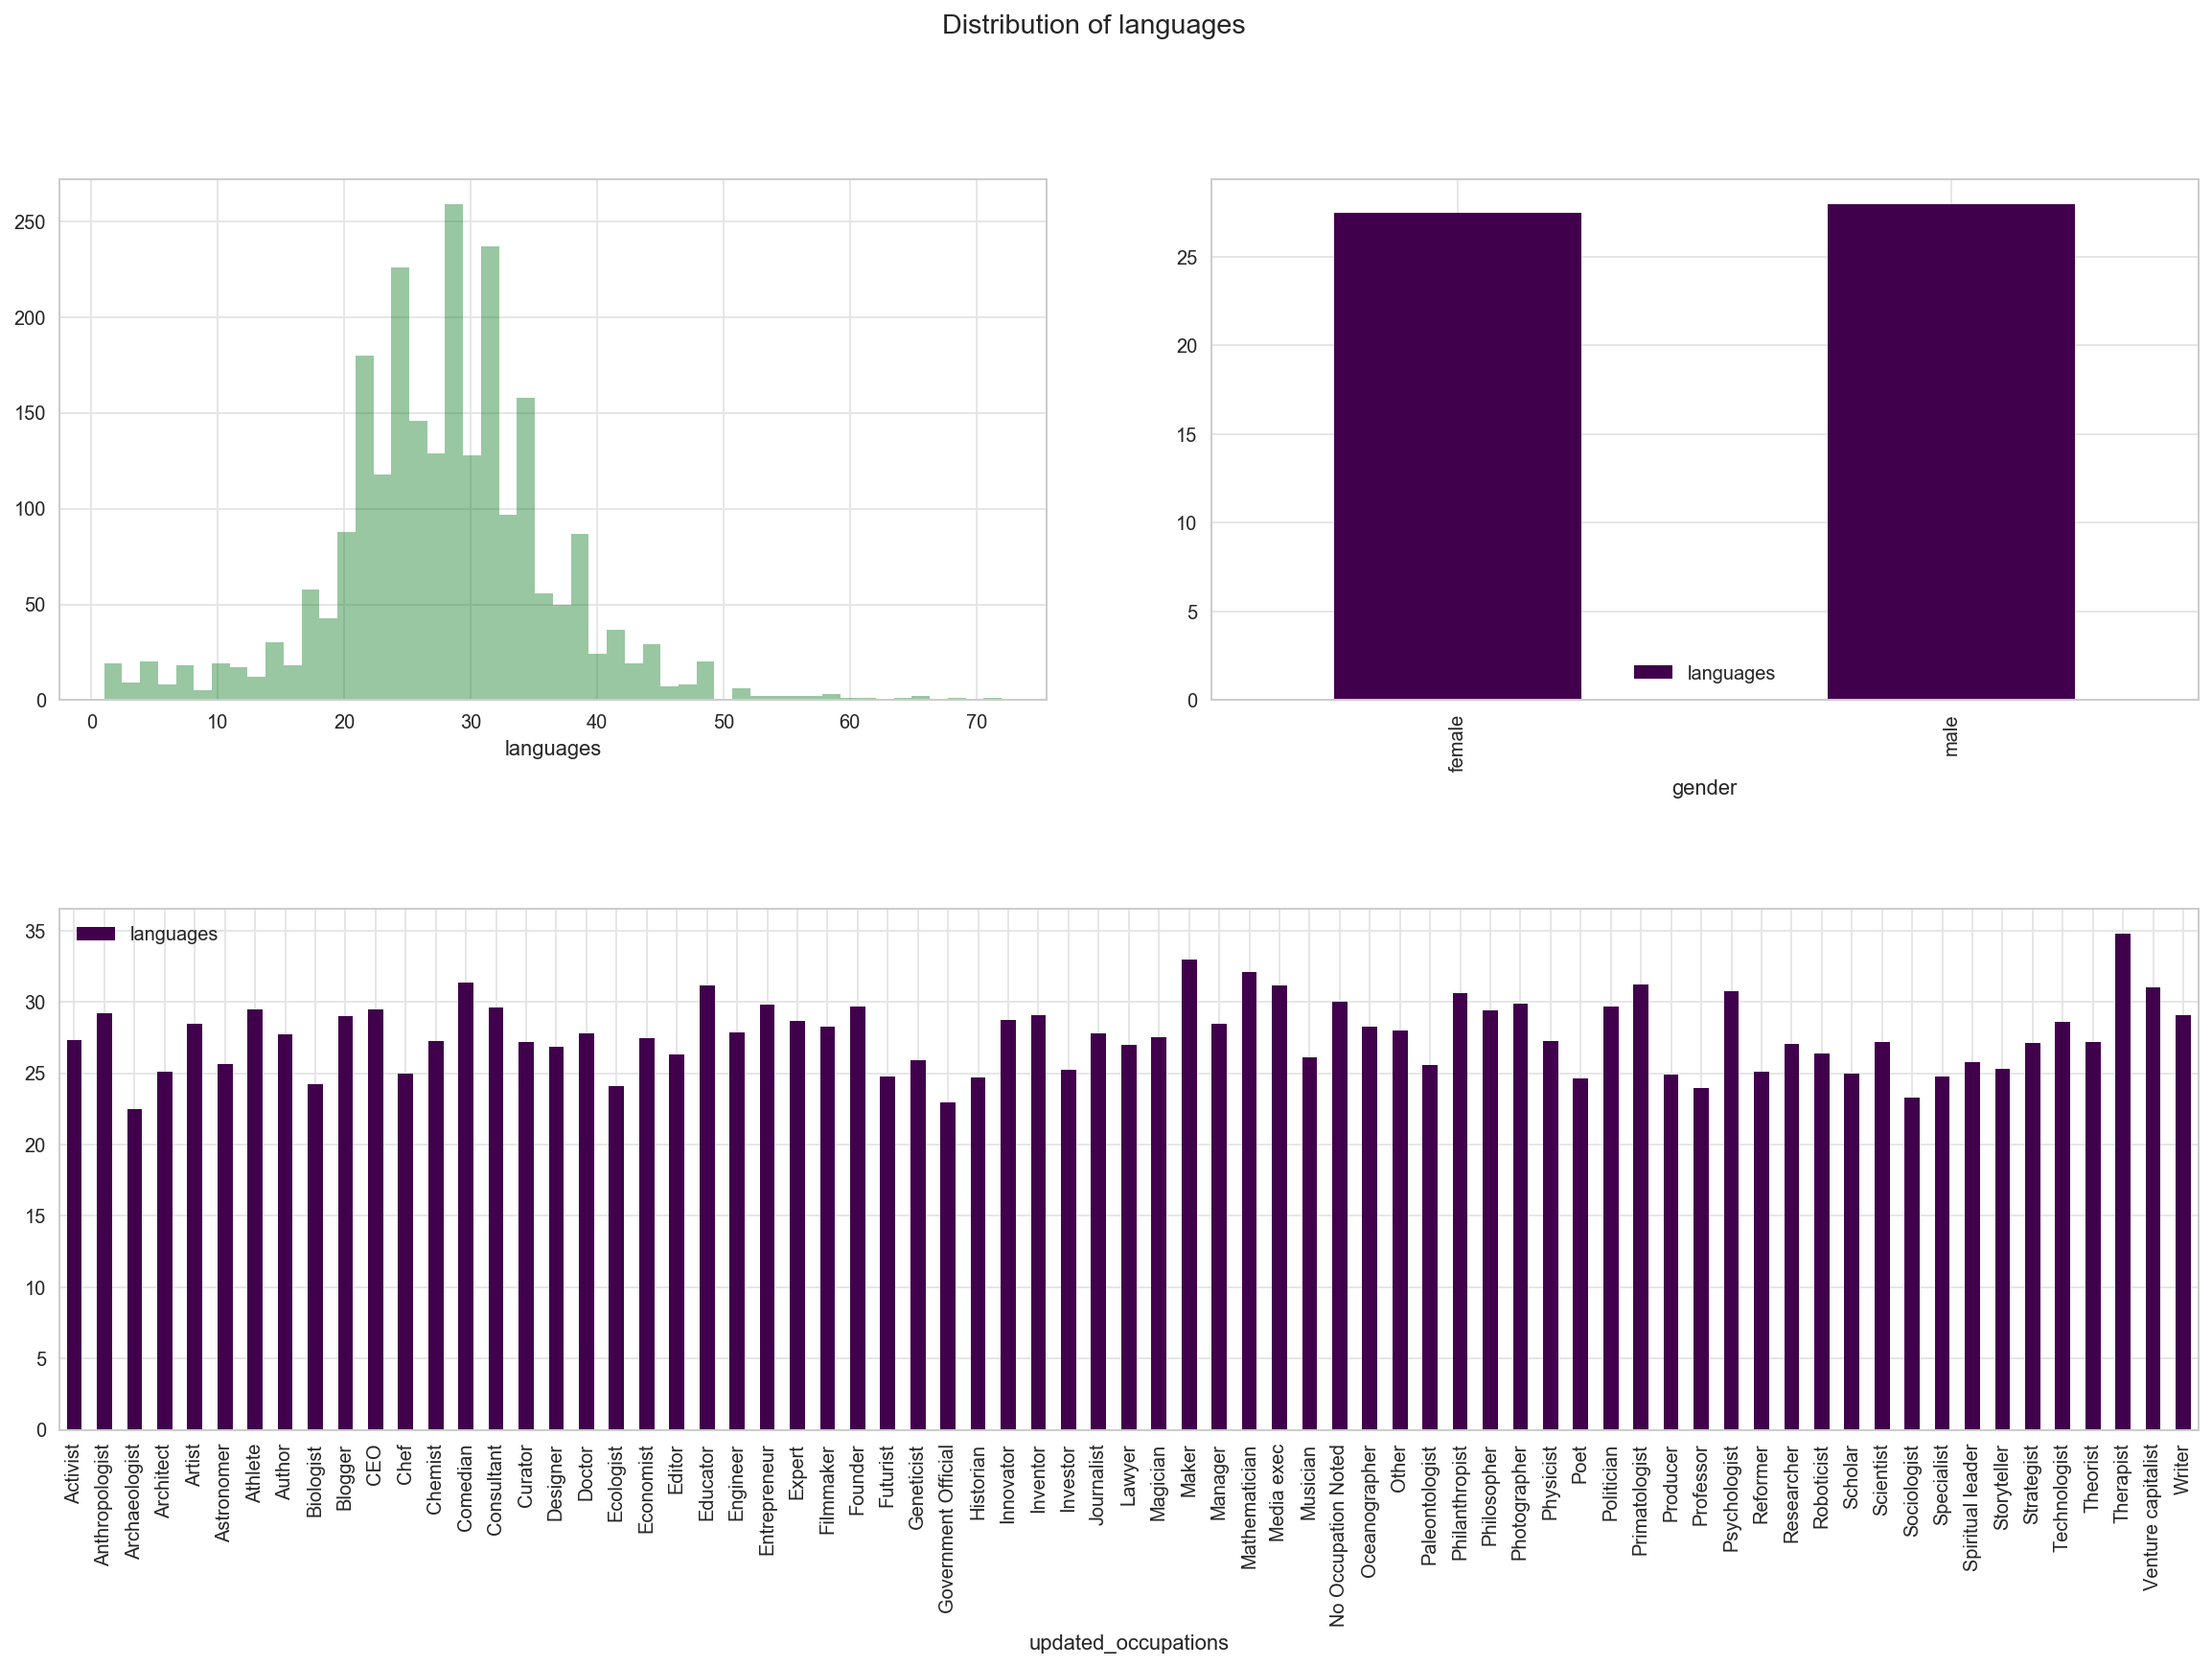

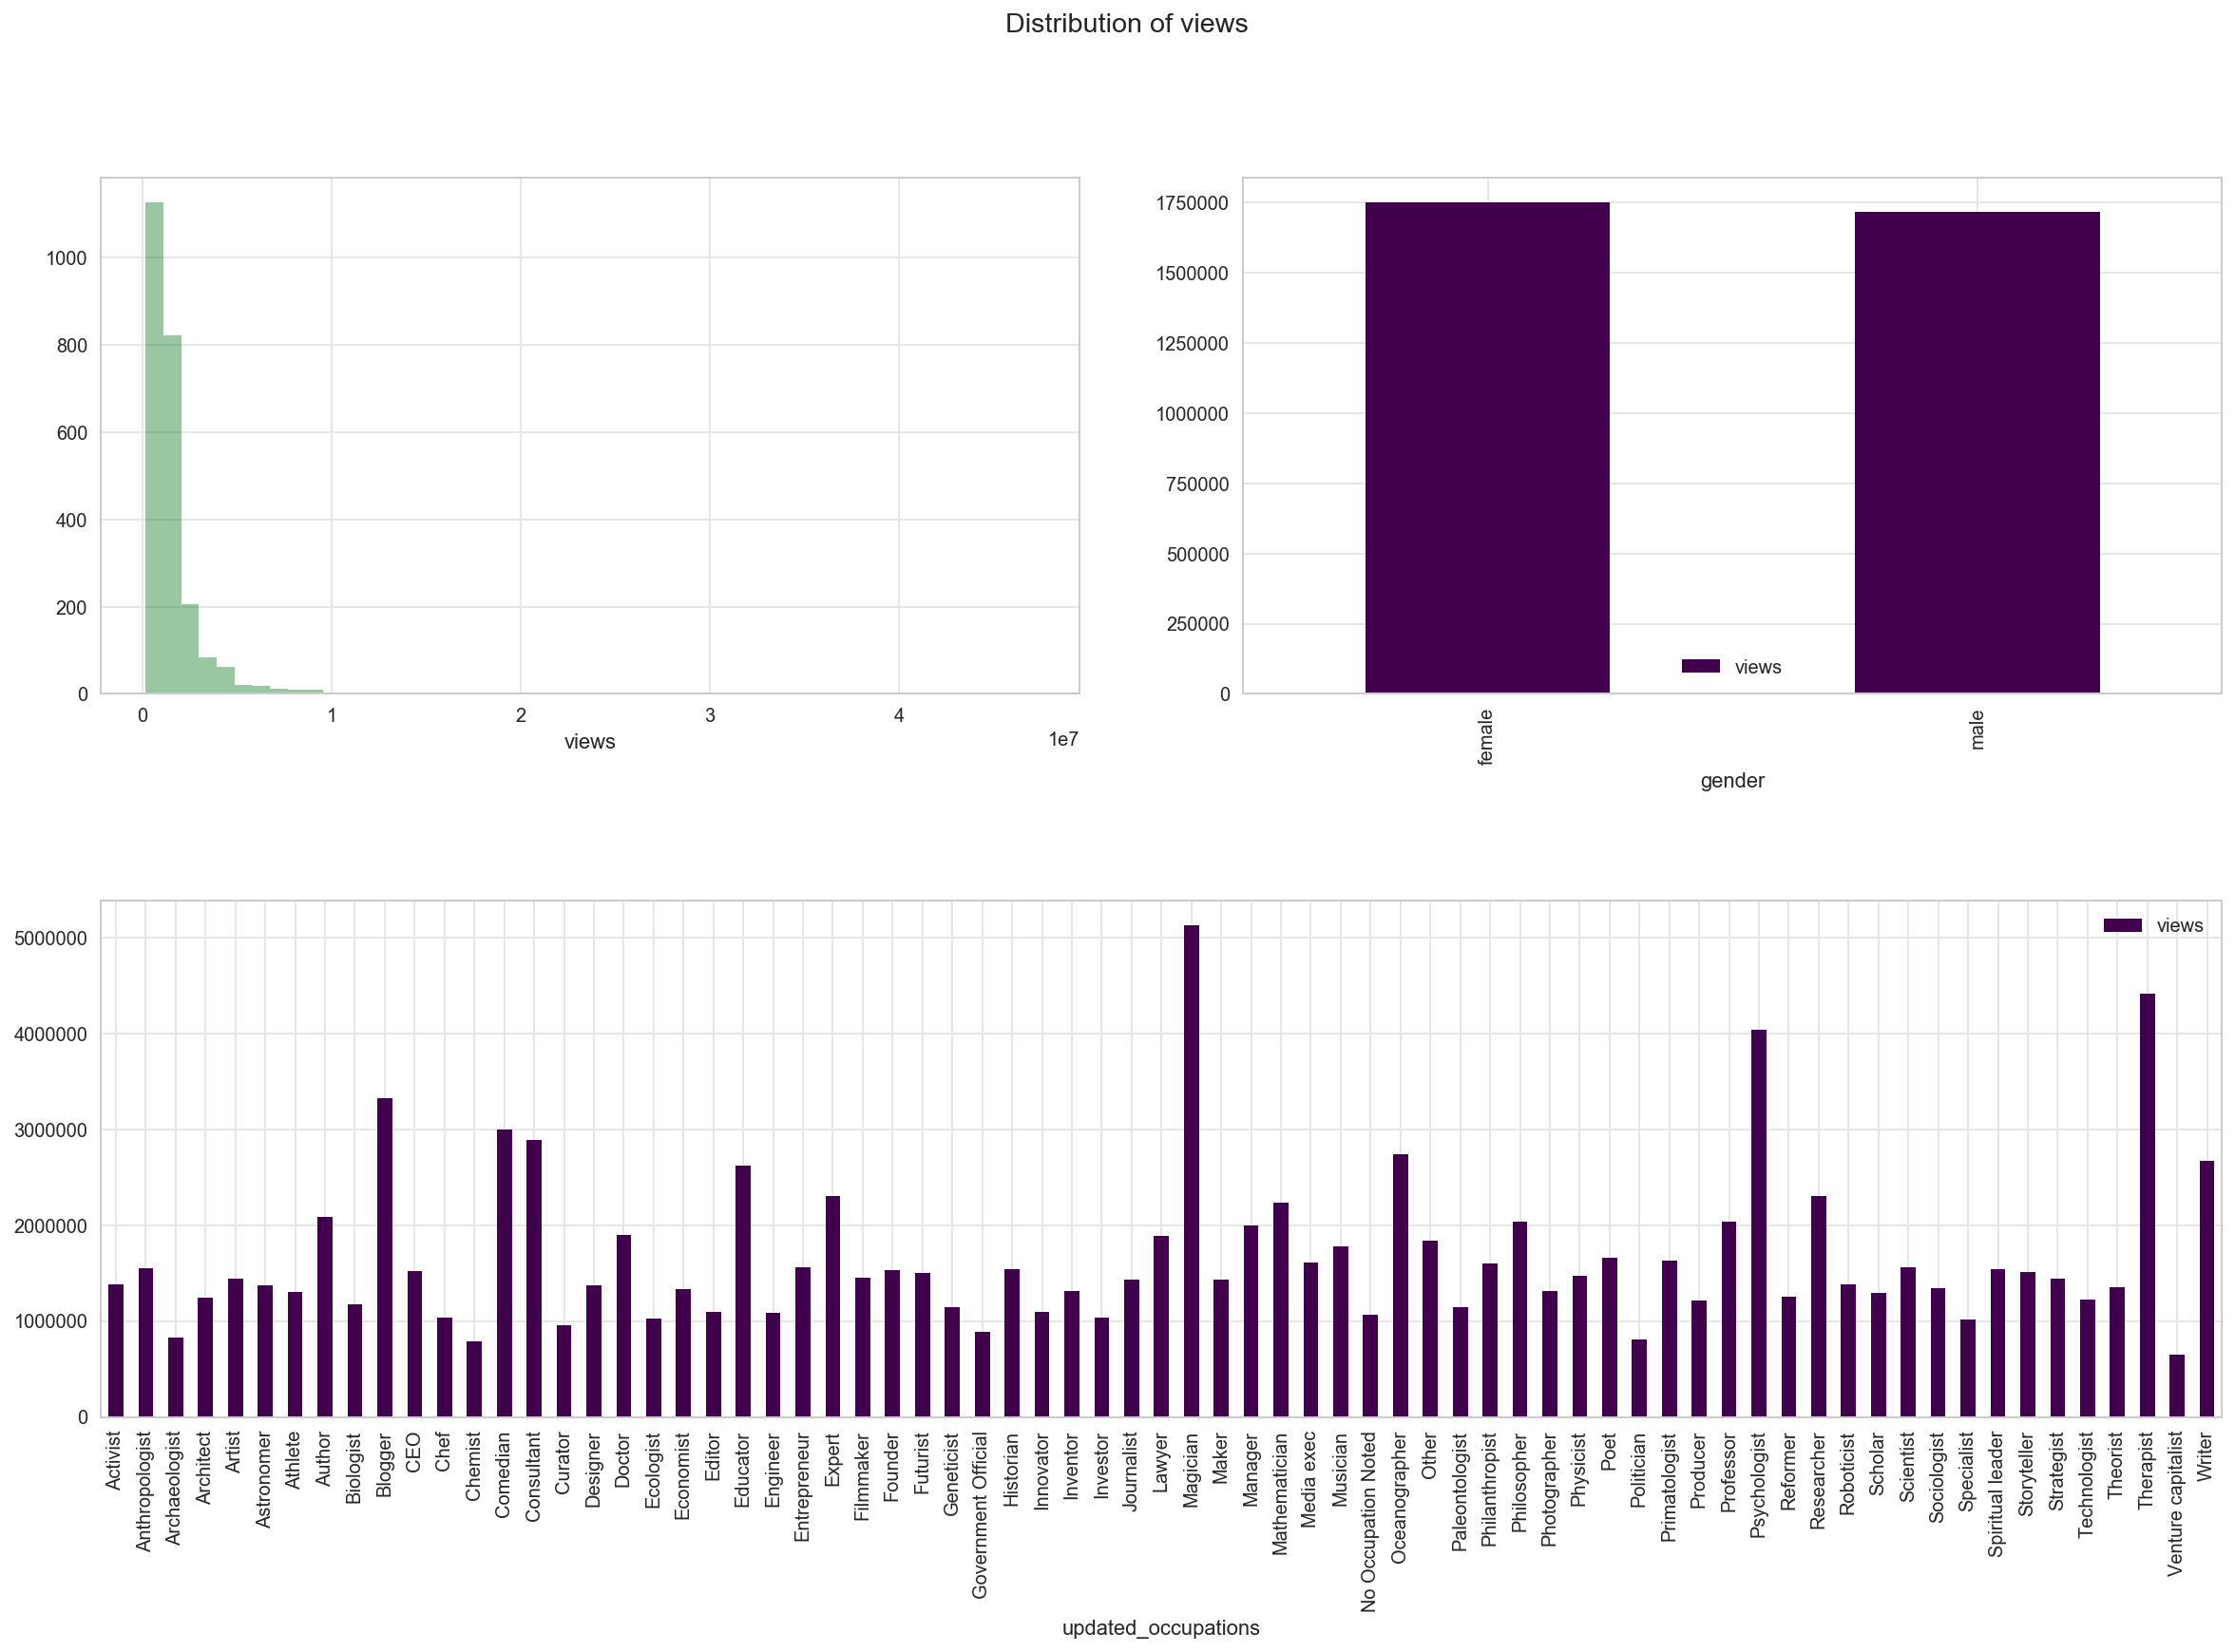

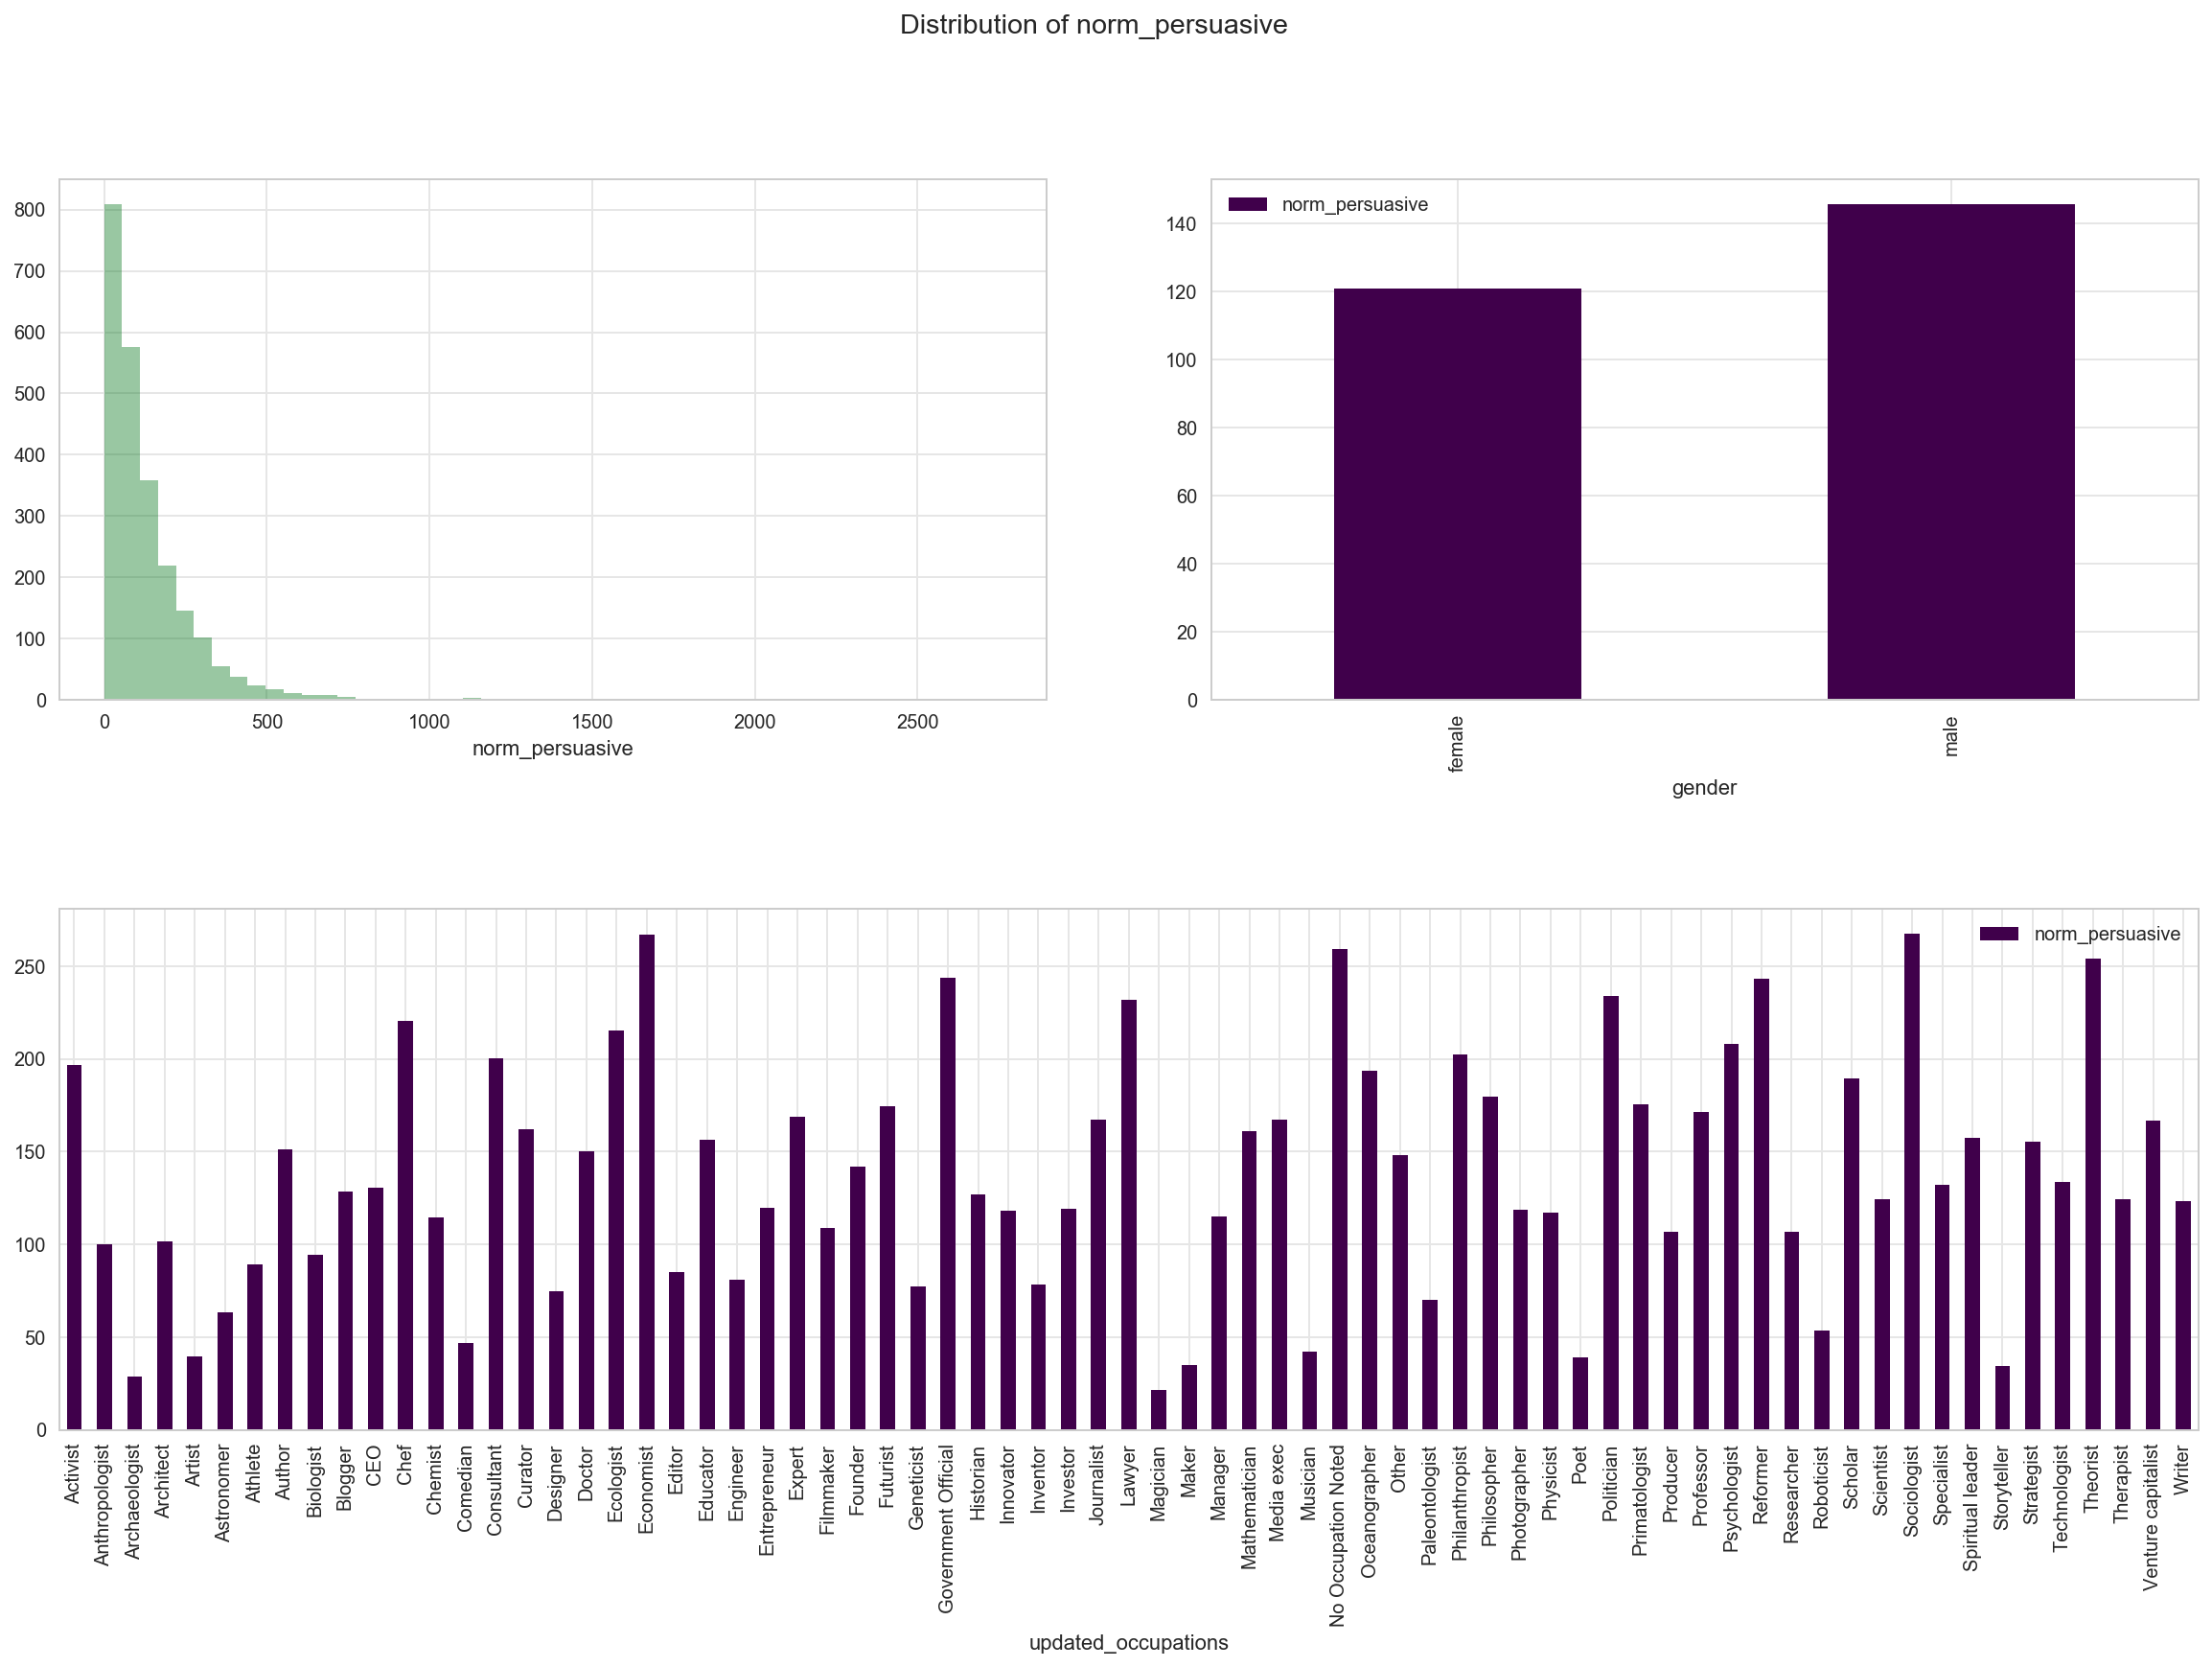

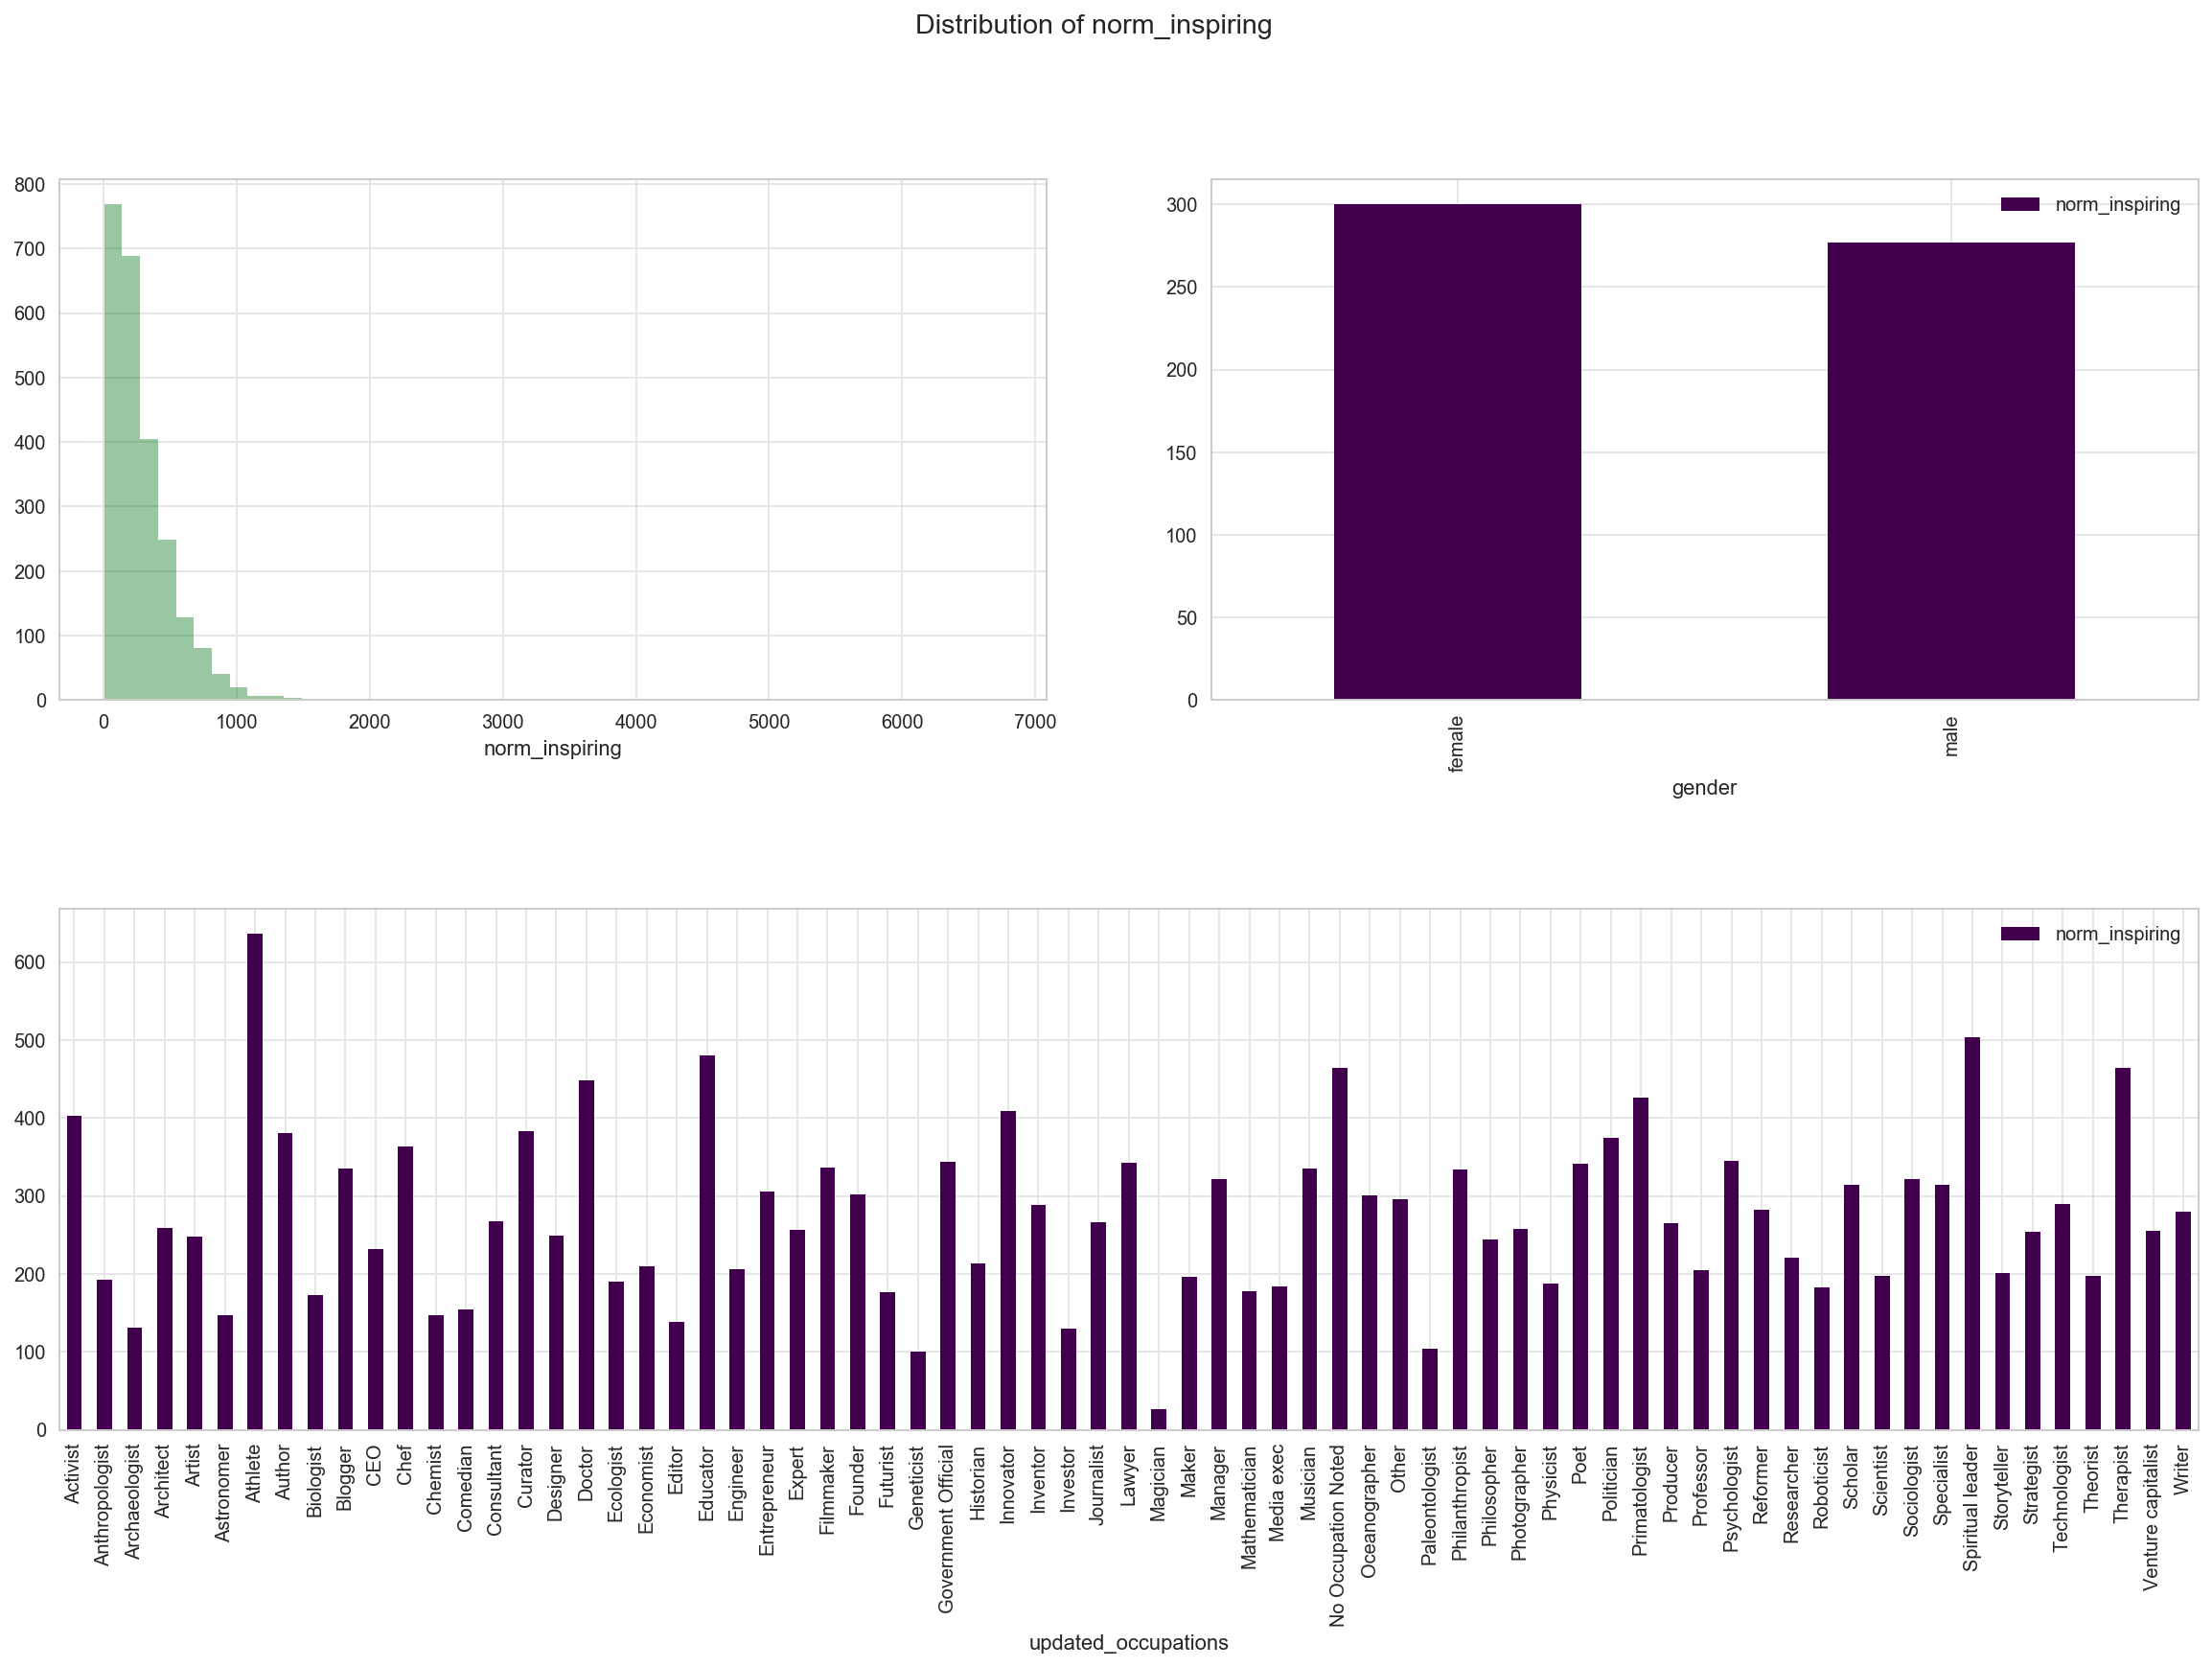

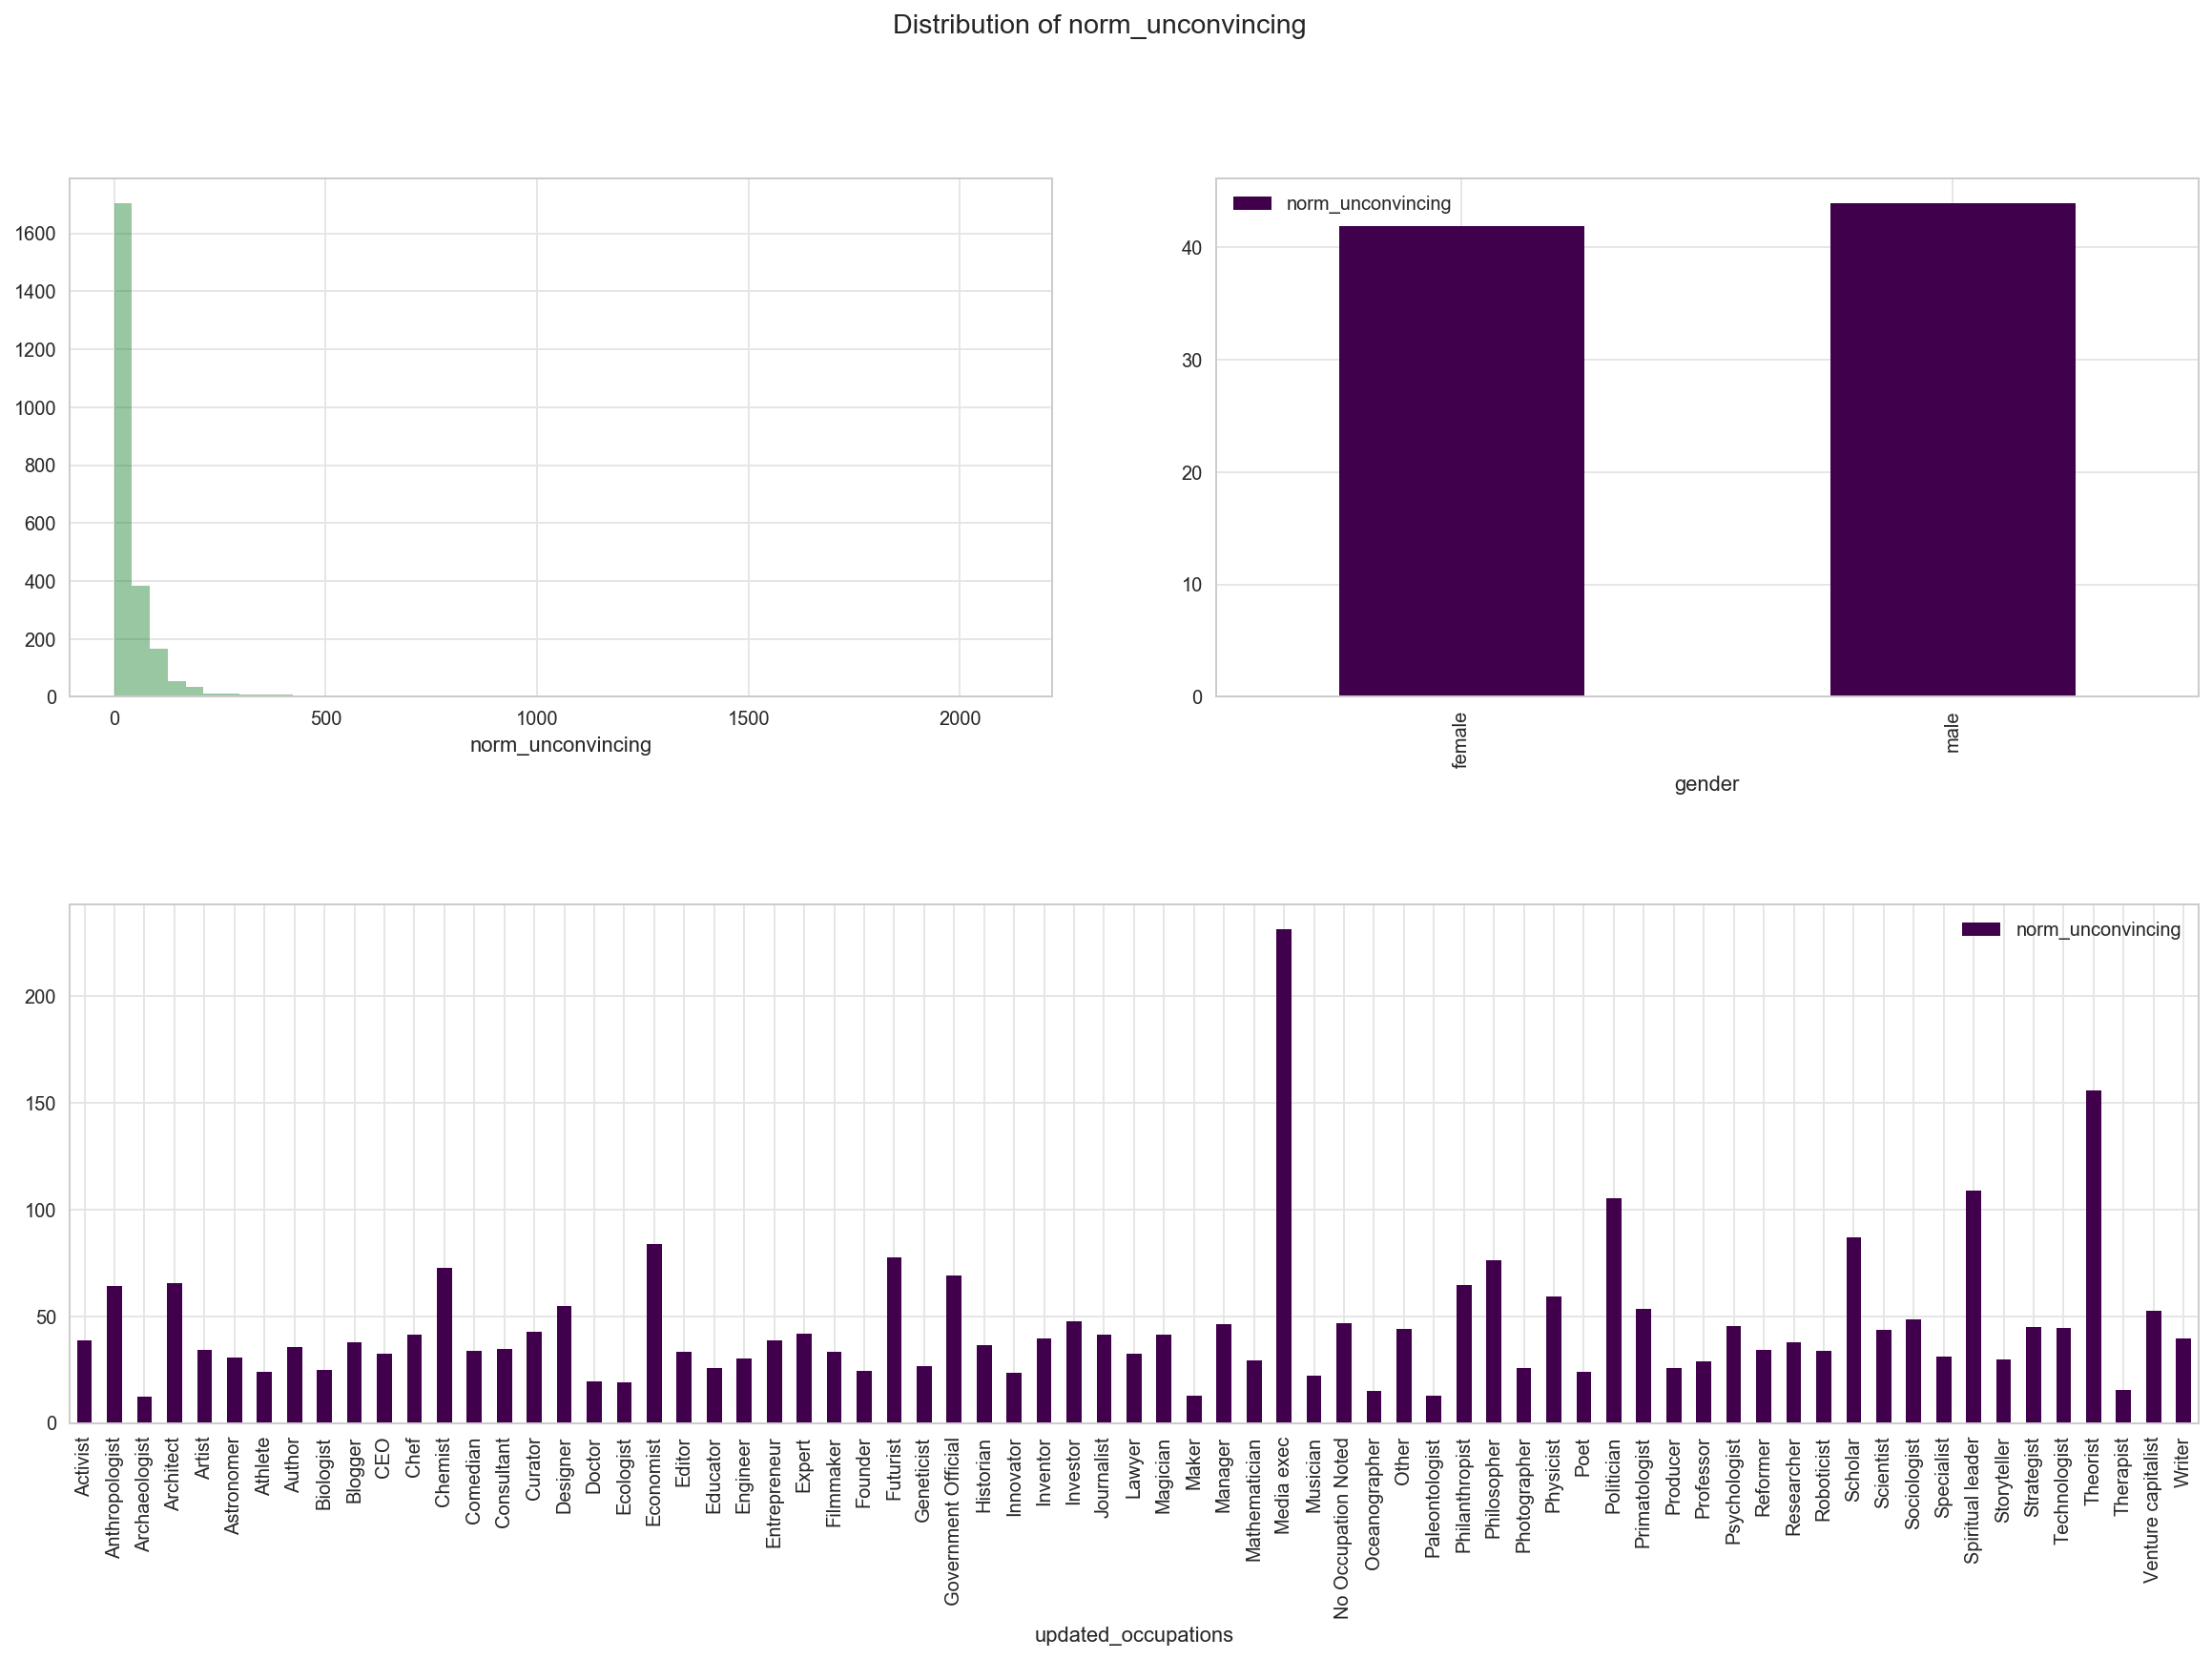

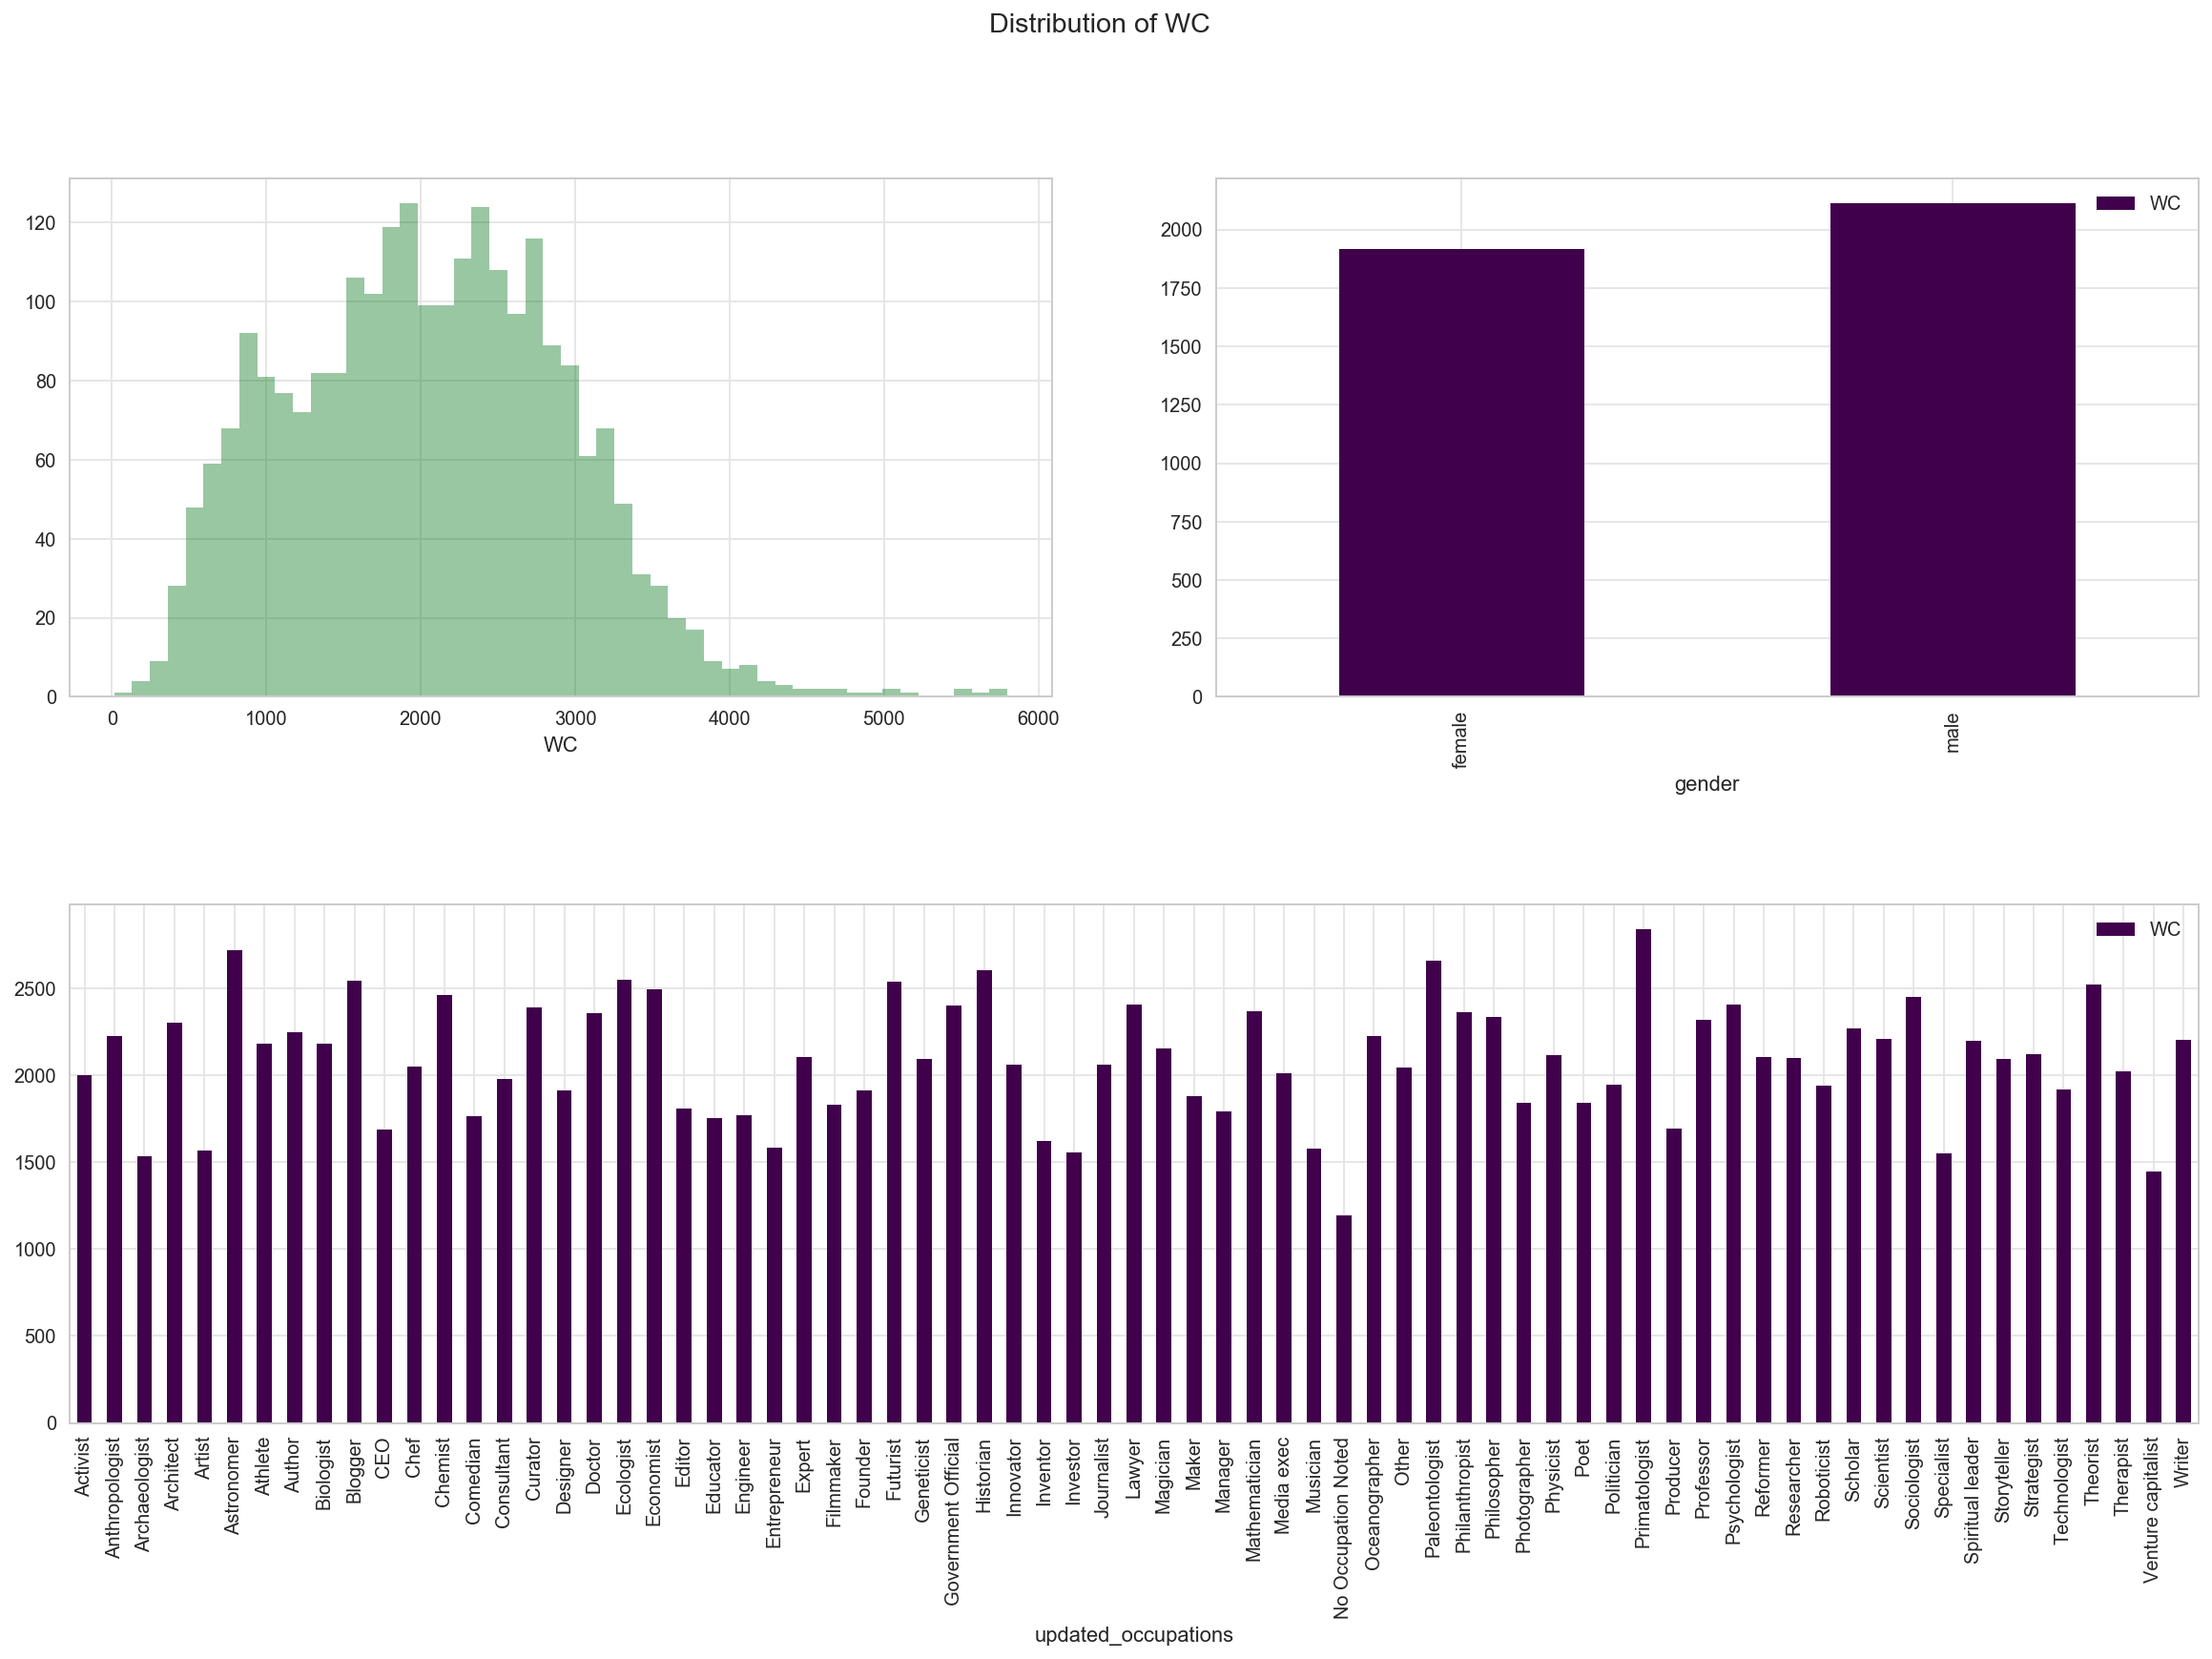

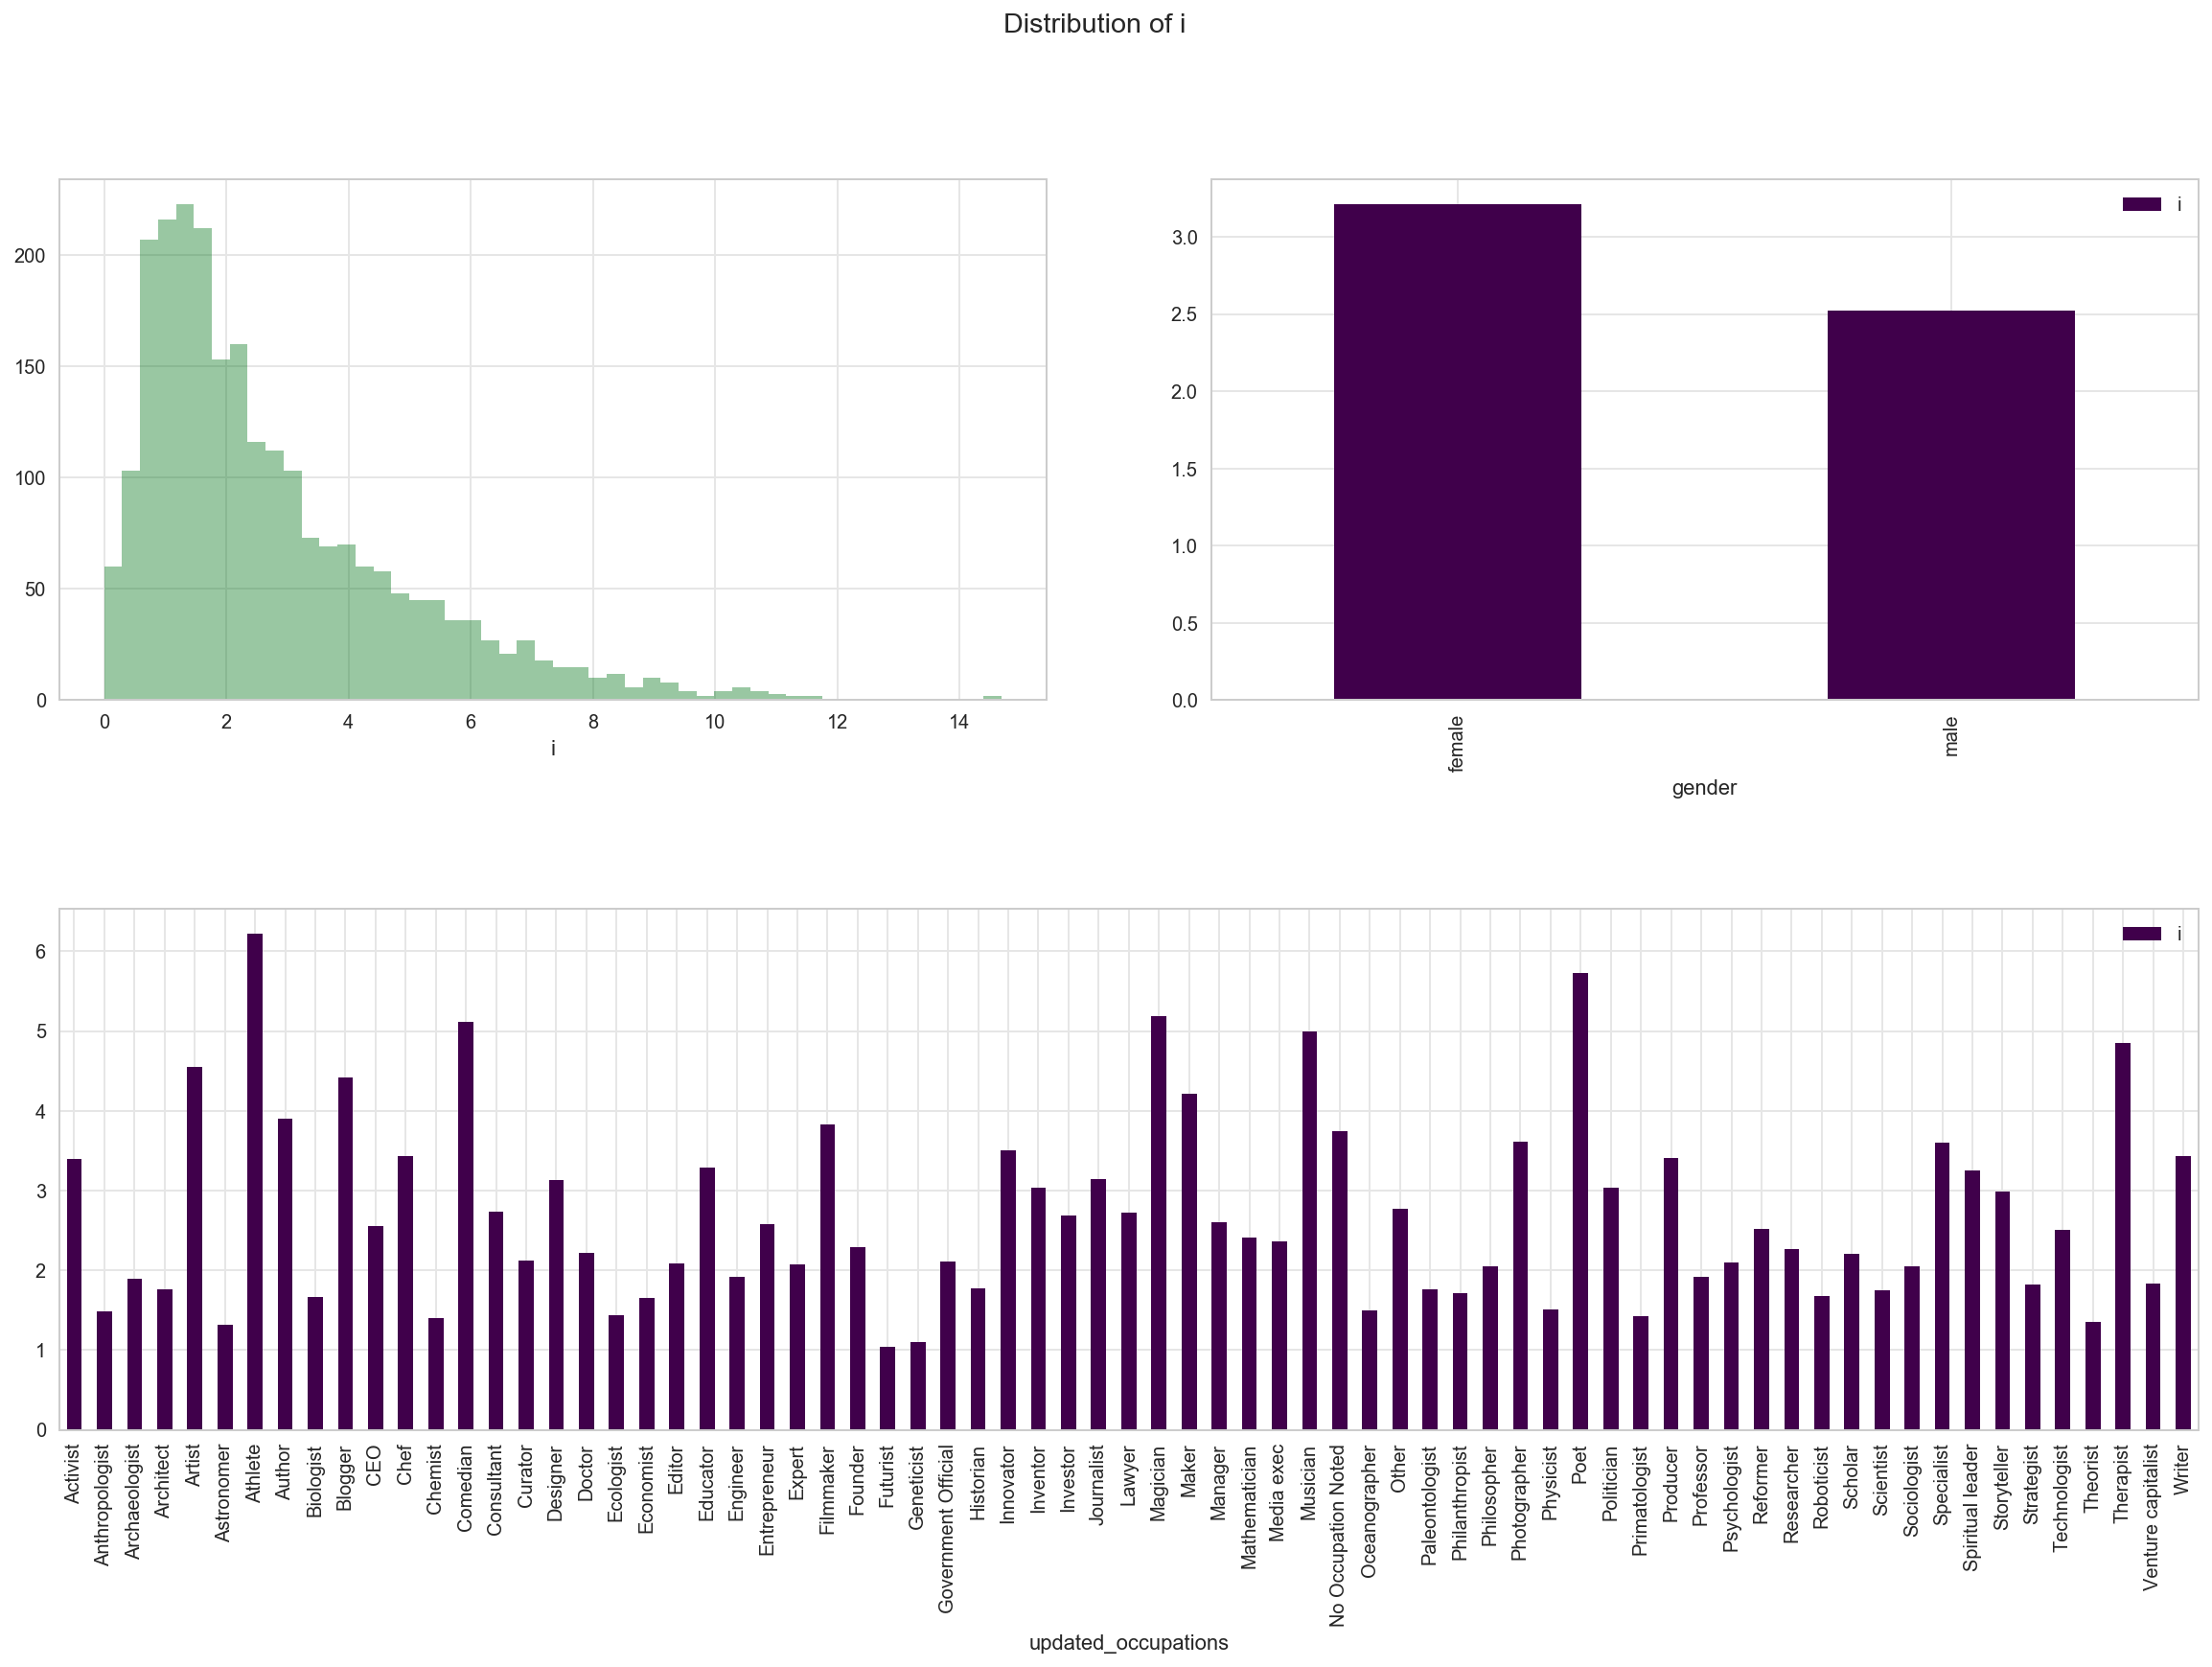

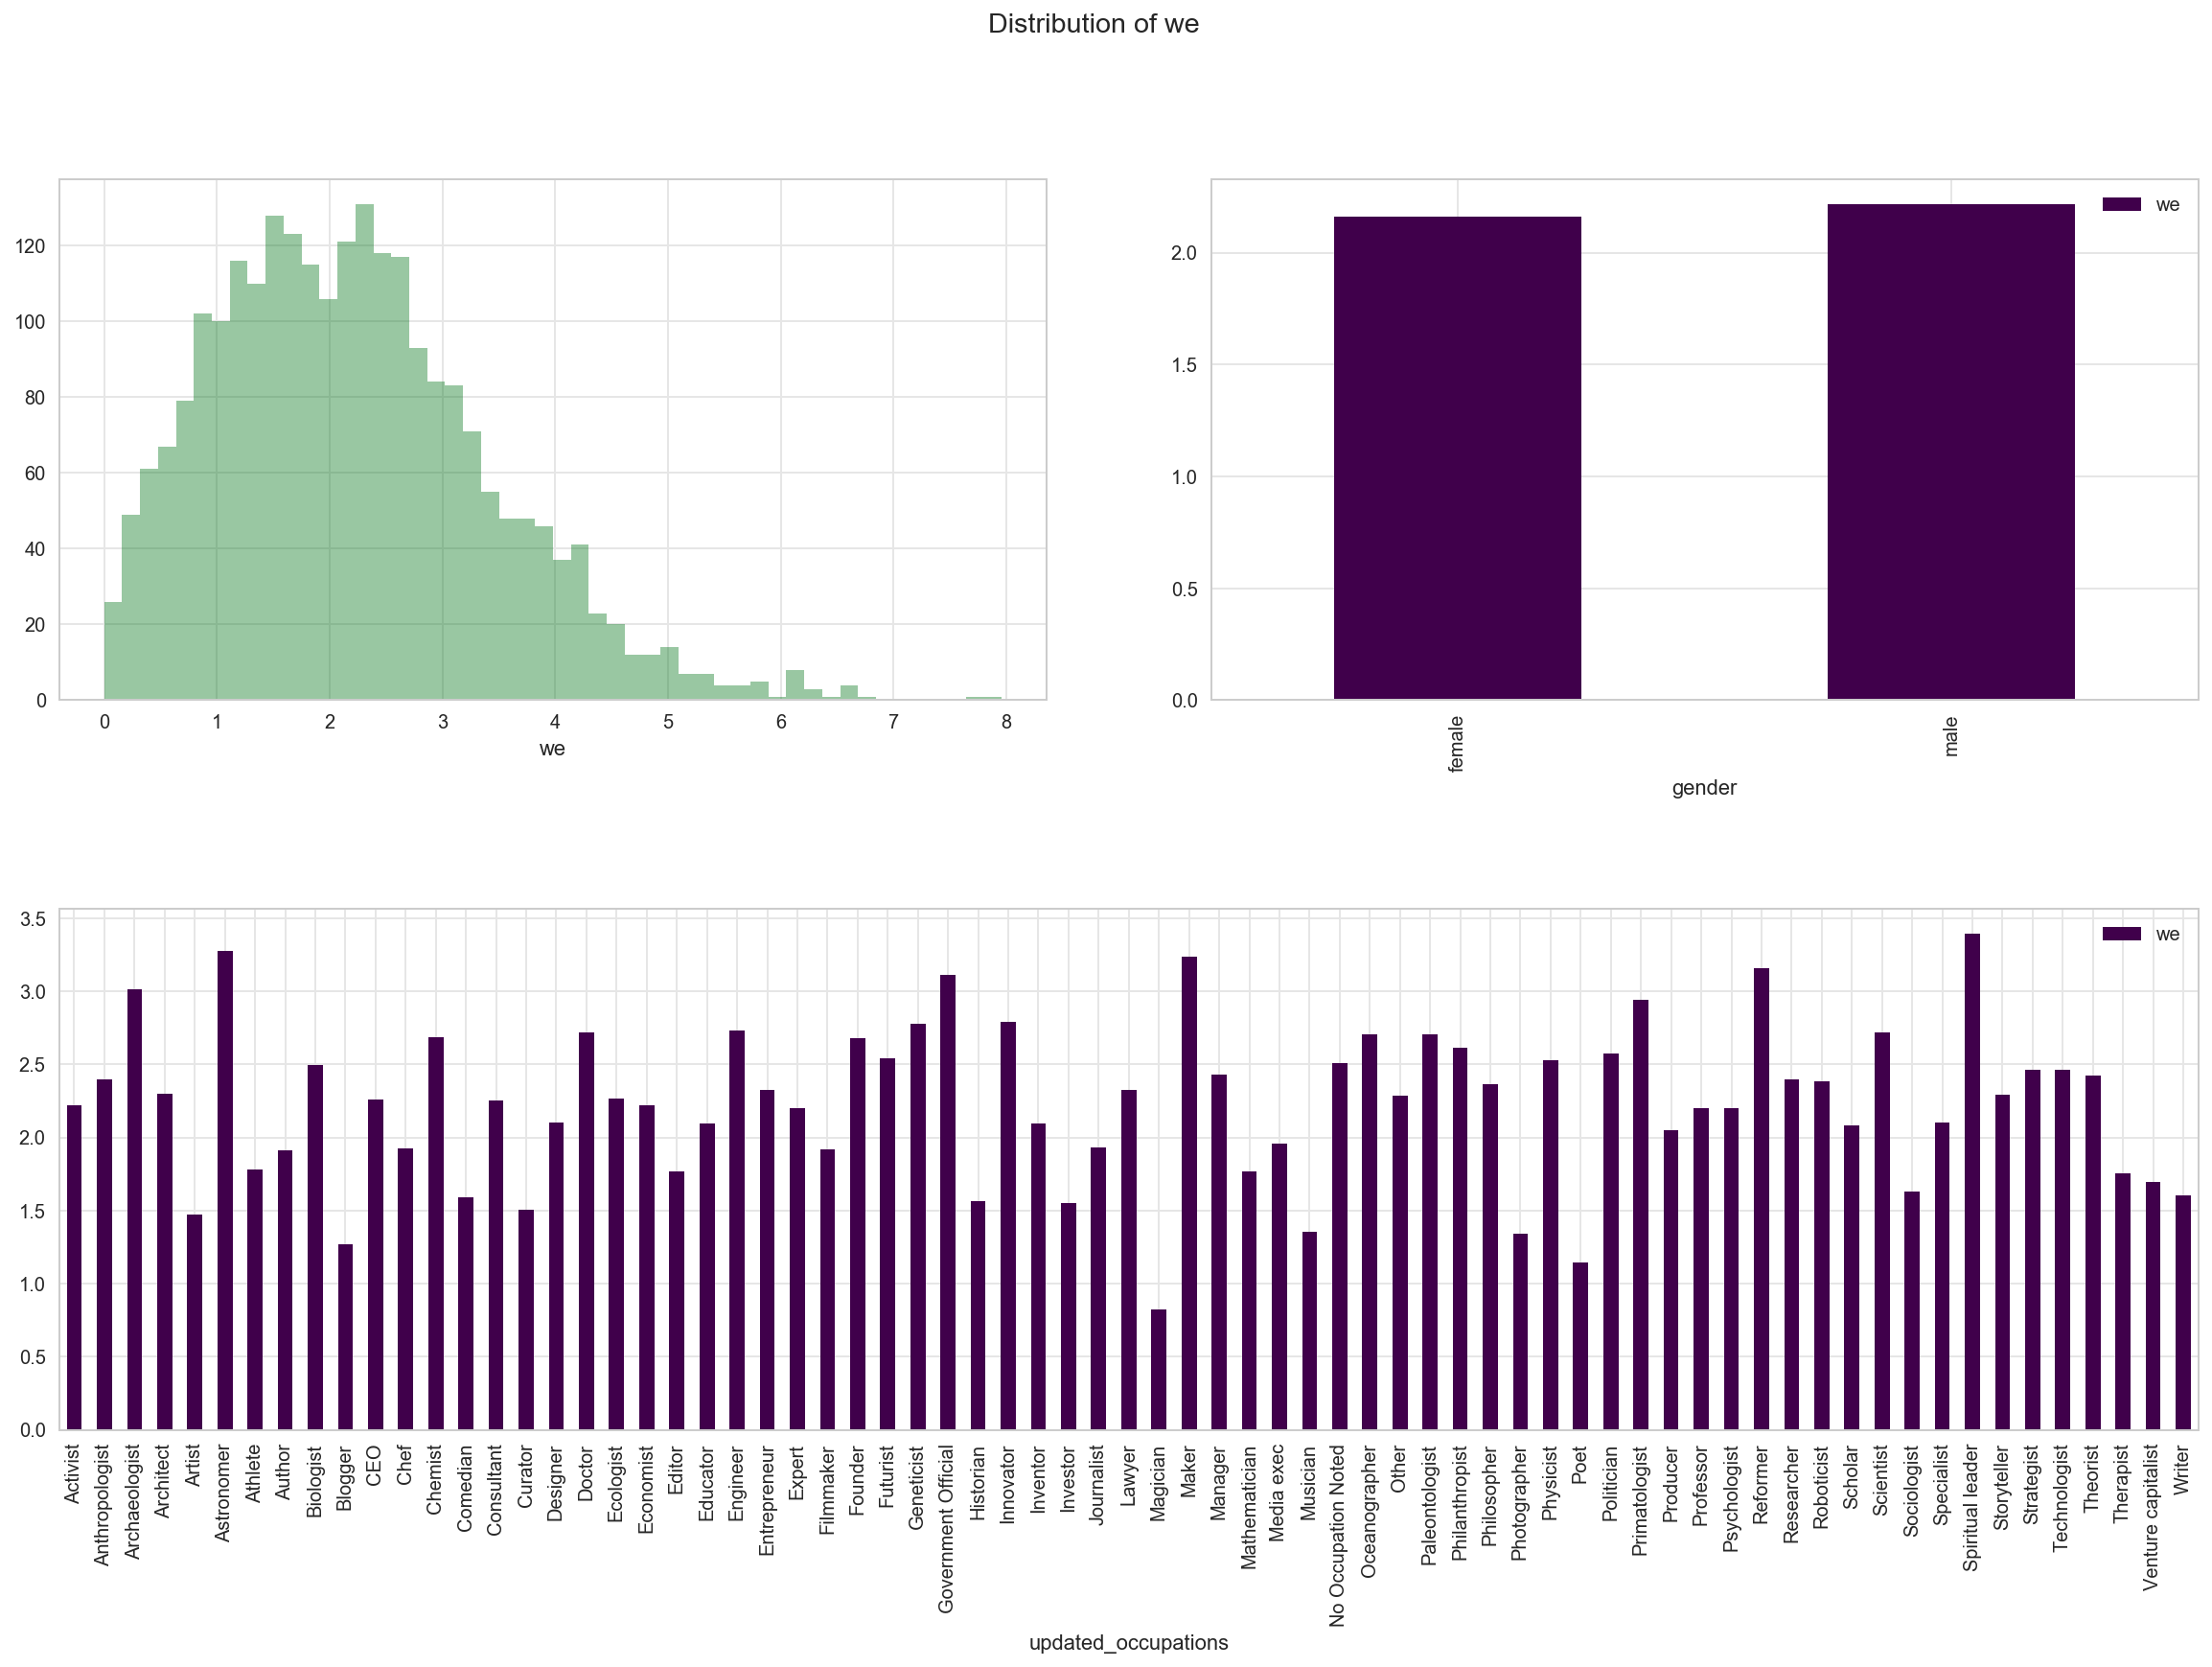

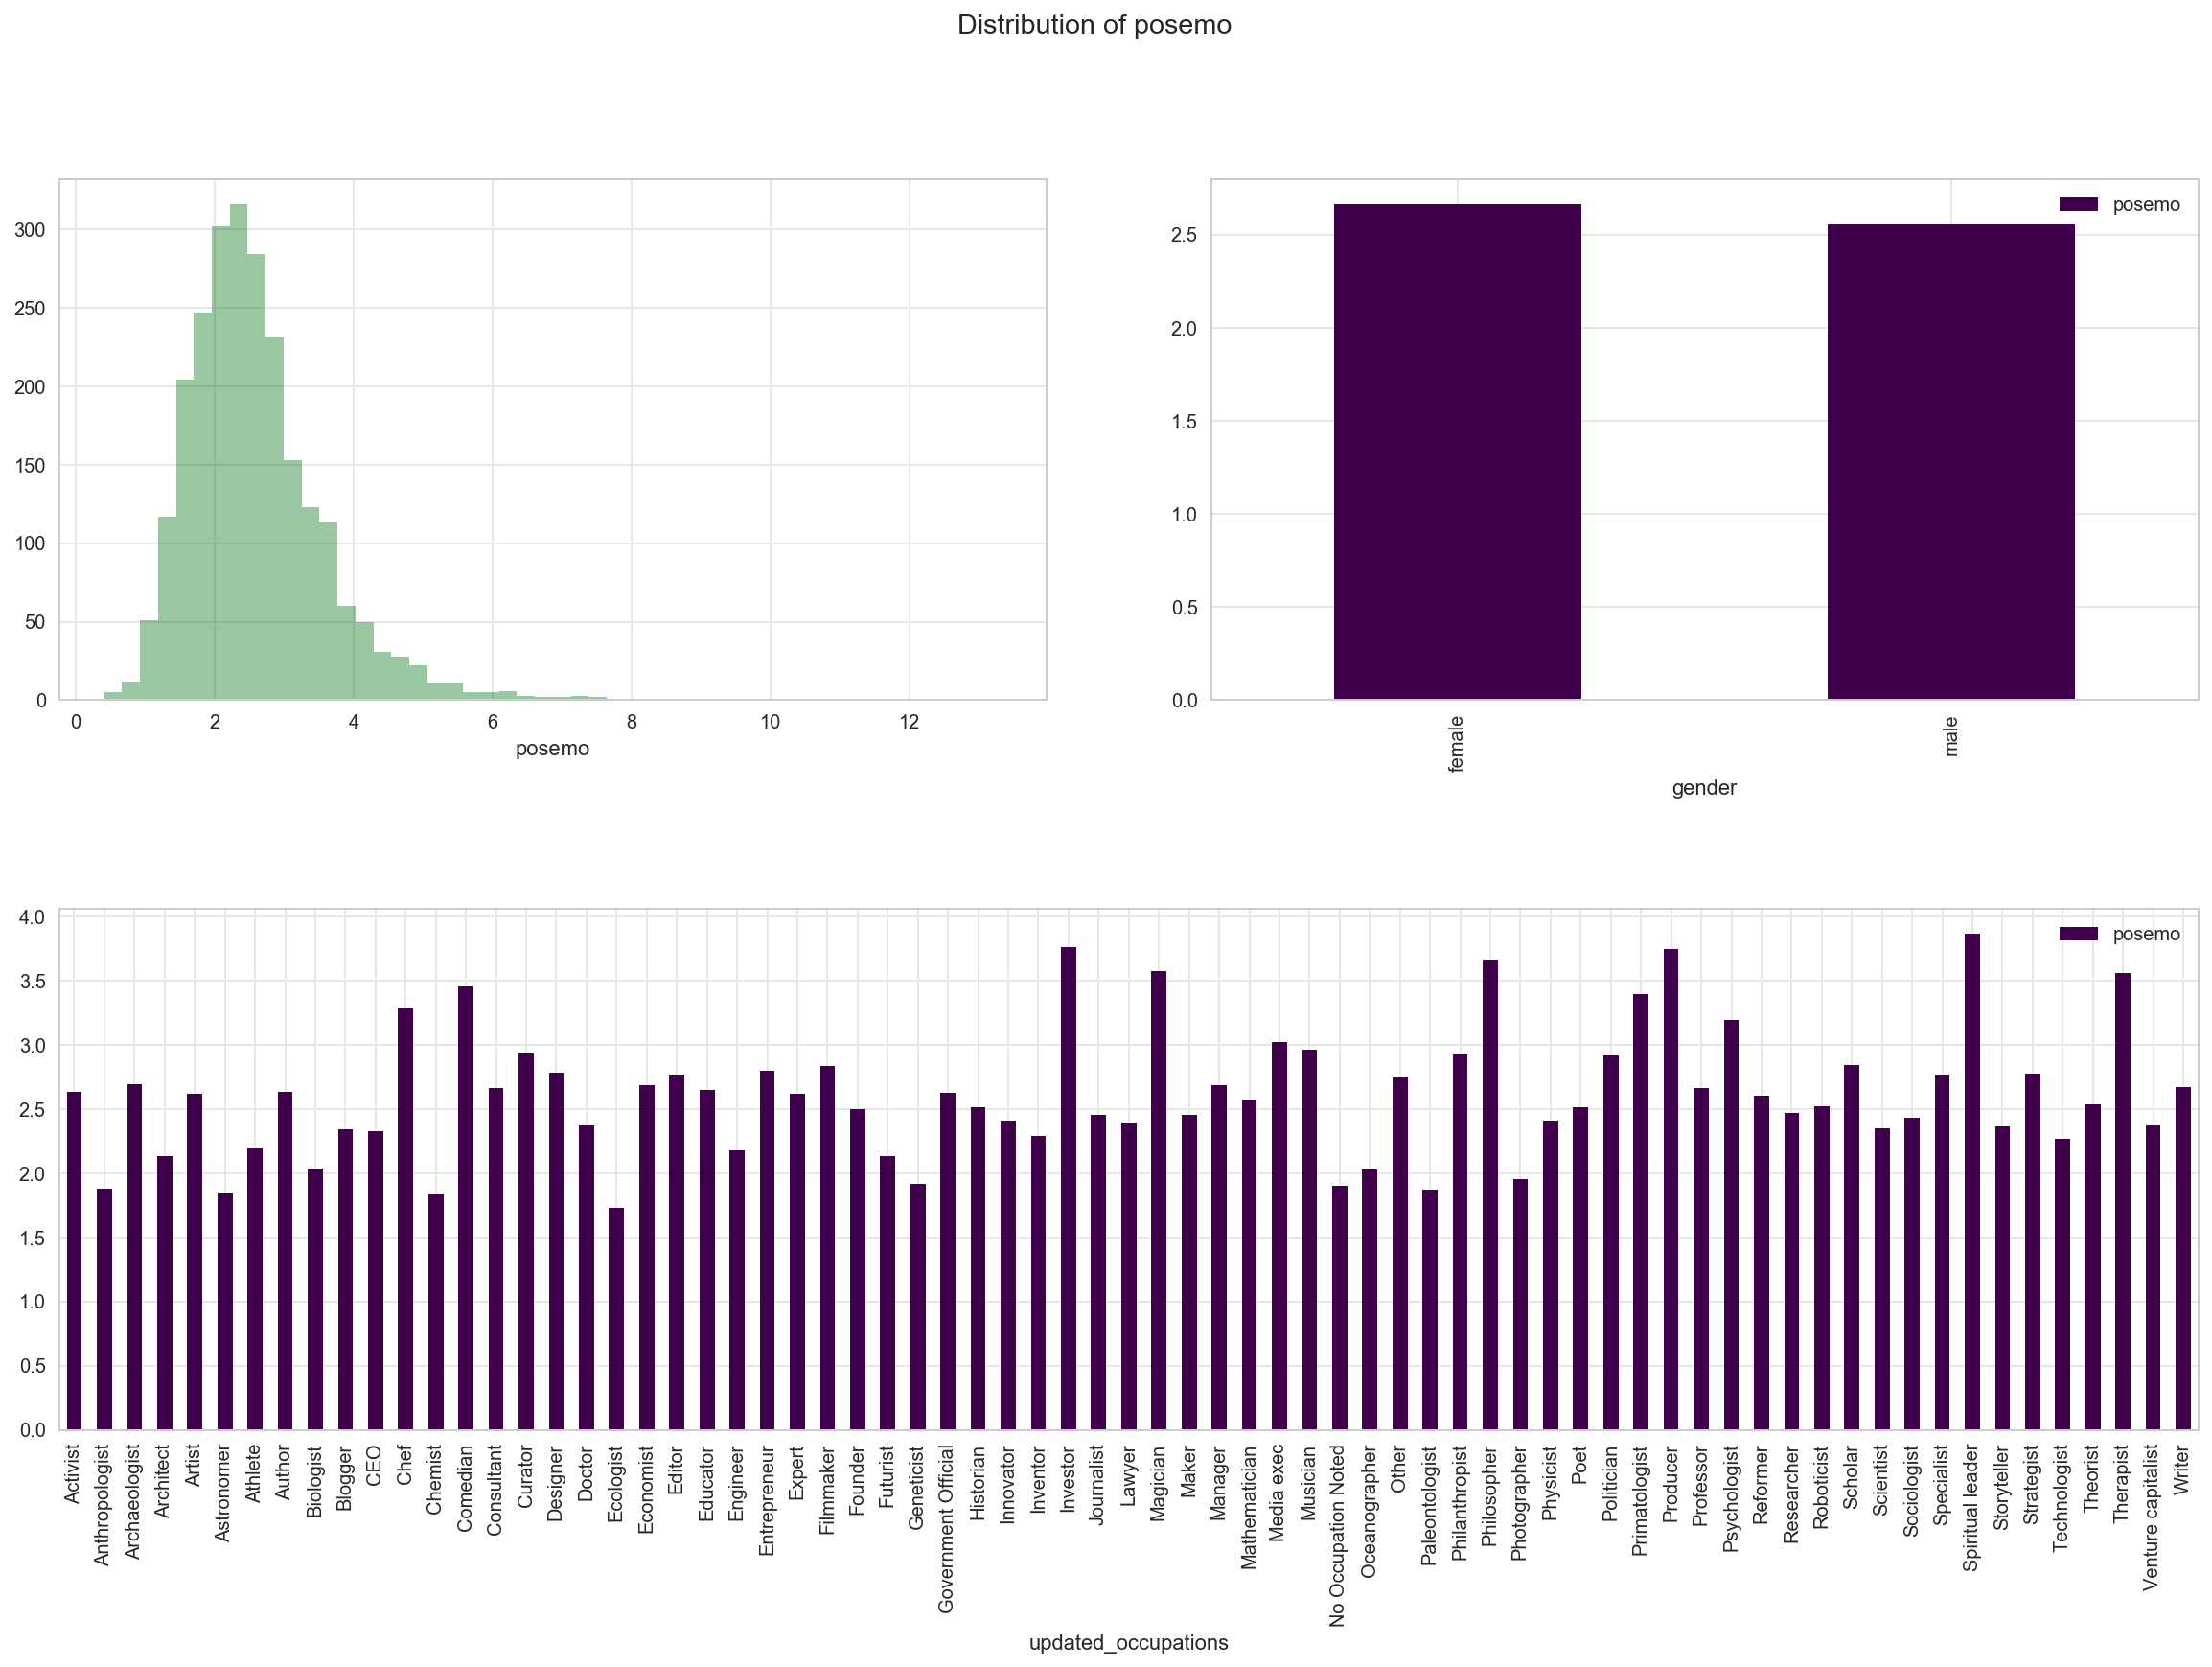

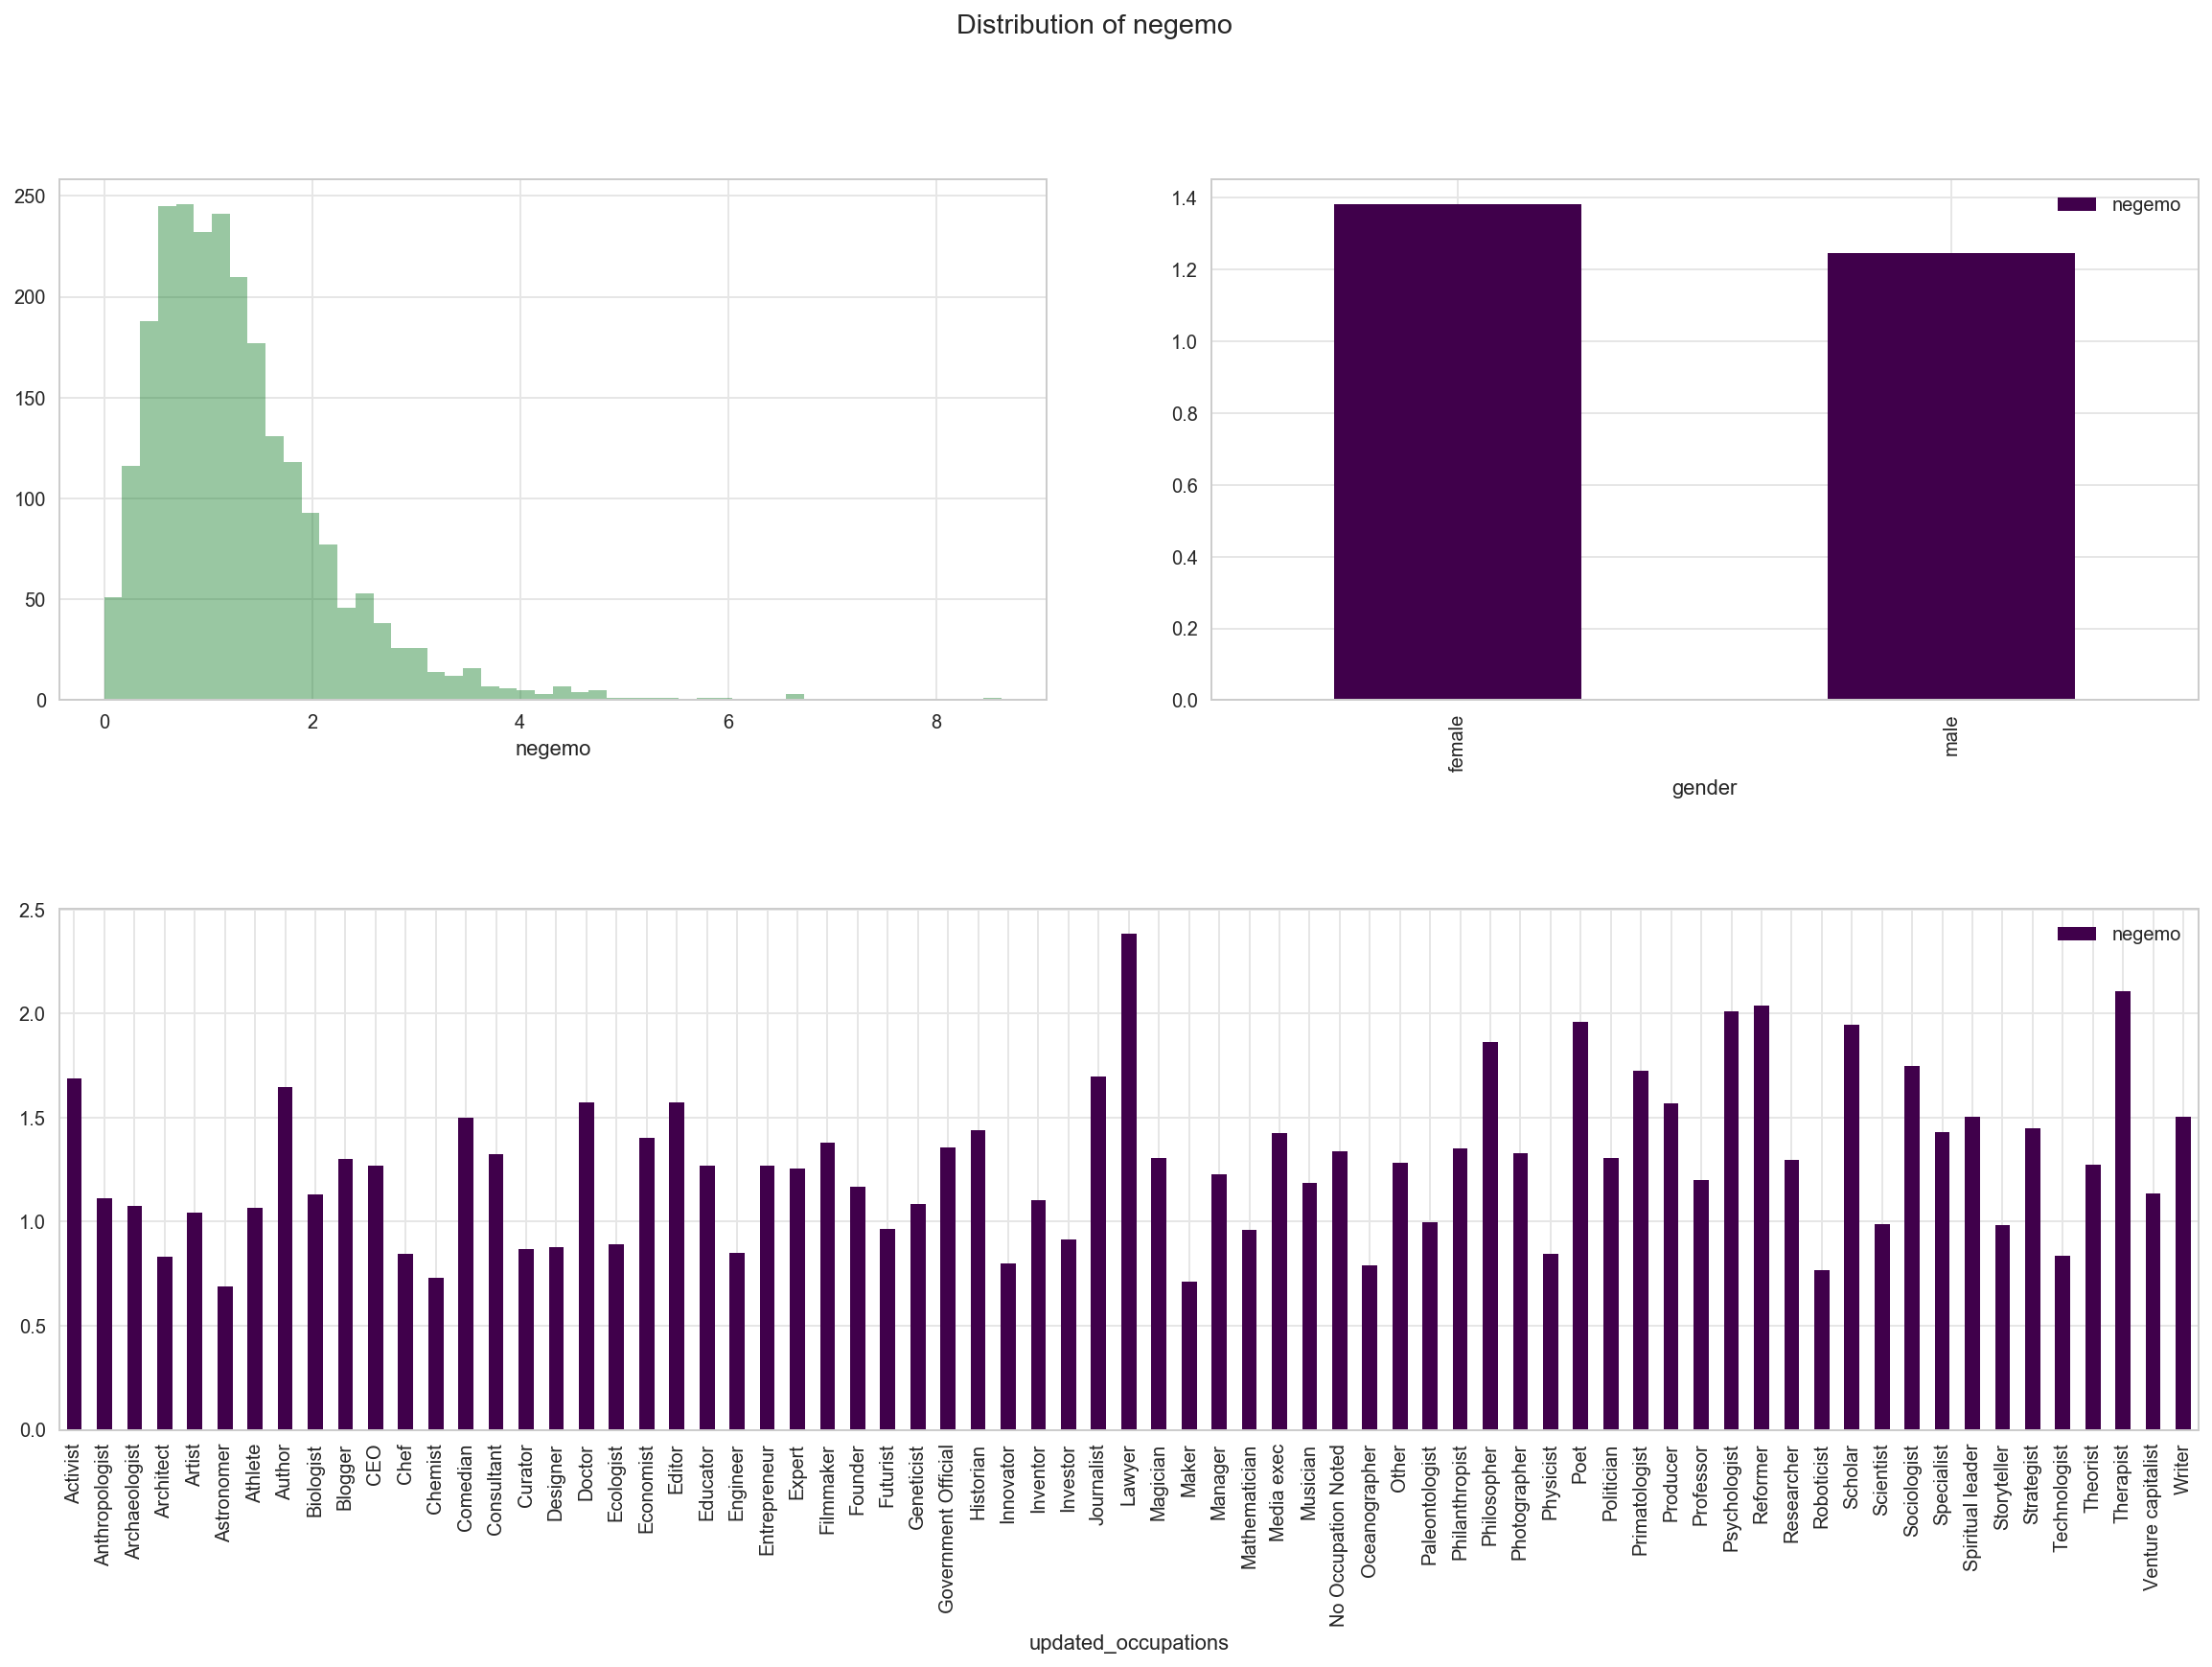

In [271]:
subs_list = ['comments', 'duration','languages','views',
 'norm_persuasive','norm_inspiring','norm_unconvincing', 'WC', 'i','we', 'posemo','negemo']
for var in subs_list:
    plot(df, var, cat_var)

## Box Plots

In [50]:
from scipy import stats

In [81]:
df_stand = df[var_list].apply(stats.zscore)
sns.set(style='whitegrid',rc={"figure.figsize": (40, 250)}, font_scale = 3)
c_palette = sns.cubehelix_palette(8, start=.5, rot=-.75)
sns.boxplot(data=df_stand, orient="h", linewidth=1.5, fliersize=7, notch=False,
                saturation=1, palette=c_palette);

In [273]:
def drop_outliers(df, var_list):
    for var in var_list:
        mask = ((df[var] < ((df[var].mean() - (10)*(df[var].std())))) |
            (df[var] > ((df[var].mean() + (10)*(df[var].std())))))
        df = df[~mask]
    return df
    
df_no = drop_outliers(df, var_list)
df_no.shape

(2316, 162)

As the above box plots suggest, the continuous features have many outliers. Removing only the data points outside the 10 standard deviation range removed almost 100 rows of data indicating that removing the outliers will have a considerable effect on the data size. I'll keep these values as it is and make a decision on how to further proceed with them depending on my initial results.

## Correlations

Instead of creating a full correlation table, I preferred to filter the entire correlation and look at the highly correlated variables. As can be seen in the below table, some variables are highly correlated such as FairnessVirtue	Fairness. I'll be using Fairness in this example as Fairness represents the ratio of words in each transcript that deal with the moral category of 'Fairness' and both its virtues and vices, while there are two separate variables for it's vice and virtues. For the other high correlations, I'll be removing similar features that are highly correlated in order to avoid multicollinearity. 

In [313]:
corr = df.corr()

In [319]:
high_corr = corr[(1> corr) & (corr > 0.7)].stack().reset_index()
high_corr.columns = ['level1', 'level2', 'correlation']

In [320]:
high_corr.sort_values(by=['correlation'], ascending=False).drop_duplicates(subset='correlation', keep='last')

level1          level2  correlation
58     published_year  published_date     0.995832
55    AuthorityVirtue       Authority     0.986240
1           film_date  published_date     0.936109
54      IngroupVirtue         Ingroup     0.934285
57     published_year       film_date     0.930754
0            duration              WC     0.906017
56         PurityVice          Purity     0.891969
42        affiliation              we     0.861767
52     FairnessVirtue        Fairness     0.850141
19              ppron         pronoun     0.823897
48             assent        informal     0.818065
36               male           shehe     0.815799
10          inspiring      persuasive     0.795206
32             posemo          affect     0.794604
6               views       inspiring     0.793769
60               Harm        HarmVice     0.788698
59               Harm      HarmVirtue     0.781370
44            relativ           space     0.780361
40             health             bio     0.773065
12  norm_unconvincing    unconvincing     0.765675
15           function         pronoun     0.757776
21                  i           ppron     0.748545
49             nonflu        informal     0.744234
25               verb         pronoun     0.742493
24            auxverb            verb     0.738981
5               views      persuasive     0.733087
27                adj         compare     0.732241
35              anger          negemo     0.719189
43        affiliation          drives     0.715220
38                see         percept     0.710111
53       FairnessVice        Fairness     0.706989
31             posemo            Tone     0.705040
33             negemo          affect     0.704014

In [322]:
df.to_csv('part_3_with_occ_gend_top.csv')